<a href="https://colab.research.google.com/github/rastehNili/AdvanceRegression_SurpriseHousing/blob/main/SurpriseHousing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Load proper Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from IPython.display import Javascript
from google.colab import drive
import scipy.stats as stats
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler, StandardScaler, scale
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from pandas.core.tools.numeric import to_numeric
from sklearn.metrics import r2_score, mean_squared_error
# from texttable import Texttable
from copy import copy
from statsmodels.graphics.gofplots import qqplot
from pandas.plotting import autocorrelation_plot
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import r2_score, mean_squared_error
from scipy.stats import skew, kurtosis
from sklearn.impute import KNNImputer
from sklearn.model_selection import KFold


warnings.filterwarnings(action='ignore')

In [ ]:
# set notebook
pd.set_option('display.max_columns', 1000)
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_colwidth', 1000)

In [ ]:
# mount to the colab
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Load the data
ROOT = "/content/drive/MyDrive"
df = pd.read_csv(f"{ROOT}/train.csv", )
df.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726   
std       1.112799    30.202904     20.645407   181.066207   456.098091   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000   

        BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  \
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean     46.549315   567.240411  1057.429452  1162.626712   346.992466   
std     161.319273   441.866955   438.705324   386.587738   436.528436   
min       0.000000     0.000000     0.000000   334.000000     0.000000   
25%       0.000000   223.000000   795.750000   882.000000     0.000000   
50%       0.000000   477.500000   991.500000  1087.000000     0.000000   
75%       0.000000   808.000000  1298.250000  1391.250000   728.000000   
max    1474.000000  2336.000000  6110.000000  4692.000000  2065.000000   

       LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath  \
count   1460.000000  1460.000000   1460.000000   1460.000000  1460.000000   
mean       5.844521  1515.463699      0.425342      0.057534     1.565068   
std       48.623081   525.480383      0.518911      0.238753     0.550916   
min        0.000000   334.000000      0.000000      0.000000     0.000000   
25%        0.000000  1129.500000      0.000000      0.000000     1.000000   
50%        0.000000  1464.000000      0.000000      0.000000     2.000000   
75%        0.000000  1776.750000      1.000000      0.000000     2.000000   
max      572.000000  5642.000000      3.000000      2.000000     3.000000   

          HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  \
count  1460.000000   1460.000000   1460.000000   1460.000000  1460.000000   
mean      0.382877      2.866438      1.046575      6.517808     0.613014   
std       0.502885      0.815778      0.220338      1.625393     0.644666   
min       0.000000      0.000000      0.000000      2.000000     0.000000   
25%       0.000000      2.000000      1.000000      5.000000     0.000000   
50%       0.000000      3.000000      1.000000      6.000000     1.000000   
75%       1.000000      3.000000      1.000000      7.000000     1.000000   
max       2.000000      8.000000      3.000000     14.000000     3.000000   

       GarageYrBlt   GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  \
count  1379.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean   1978.506164     1.767123   472.980137    94.244521    46.660274   
std      24.689725     0.747315   213.804841   125.338794    66.256028   
min    1900.000000     0.000000     0.000000     0.000000     0.000000   
25%    1961.000000     1.000000   334.500000     0.000000     0.000000   
50%    1980.000000     2.000000   480.000000     0.000000    25.000000   
75%    2002.000000     2.000000   576.000000   168.000000    68.000000   
max    2

In [ ]:
# Get general information about each column of the dataframe
display(Javascript('''google.colab.output.setIframeHeight(0, true, {maxHeight: 10000})'''))
print(df.info())
print(df.shape)

<IPython.core.display.Javascript object>

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

## **Cleaning Data**

In [ ]:
# Remove Duplicated Columns
df.loc[:,~df.T.duplicated(keep='first')].shape

(1460, 81)

In [ ]:
# Create new column for the age of the house and age from remodeling
# In the case of remodeling there are buildings that have been remodeled
# a year after the purchase. Since they havent been remodeled before sale,
# I have set the age from remodeling at zero for those cases.

df['Age'] = df['YrSold'] - df['YearBuilt']

df["RemodAge"] = df['YrSold'] - df["YearRemodAdd"]
df.loc[df["RemodAge"] < 0, "RemodAge"] = 0

In [ ]:
display(Javascript('''google.colab.output.setIframeHeight(0, true, {maxHeight: 10000})'''))

# Identify high variant columns:
print(df.nunique().sort_values(ascending=False).head(15))

<IPython.core.display.Javascript object>

Id             1460
LotArea        1073
GrLivArea       861
BsmtUnfSF       780
1stFlrSF        753
TotalBsmtSF     721
SalePrice       663
BsmtFinSF1      637
GarageArea      441
2ndFlrSF        417
MasVnrArea      327
WoodDeckSF      274
OpenPorchSF     202
BsmtFinSF2      144
Age             122
dtype: int64


"Id" is a variable that all it's values are unique. Since it has no effect on our analysis I used it as the identifier and did not use it as a variable for modeling.

In [ ]:
# df.set_index('Id', inplace=True)
df.drop("Id", axis=1, inplace=True)

Check percentages of missing values in each column:

In [ ]:
display(Javascript('''google.colab.output.setIframeHeight(0, true, {maxHeight: 10000})'''))

# find percentage of missing values in each column
percNaDf = (df.isnull().sum()/df.shape[0])*100
print(percNaDf[percNaDf>0])

# check presence of blank rows
null_mask = df.isnull().all(axis=1)
null_rows = df[null_mask]

print("\nNumber of Blank Rows:", null_rows.shape[0])

# check rows with missing values
null_mask = df.isnull().any(axis=1)
null_rows = df[null_mask]

print("Number Rows with Missing values:", null_rows.shape[0])

<IPython.core.display.Javascript object>

LotFrontage     17.739726
Alley           93.767123
MasVnrType       0.547945
MasVnrArea       0.547945
BsmtQual         2.534247
BsmtCond         2.534247
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtFinType2     2.602740
Electrical       0.068493
FireplaceQu     47.260274
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
PoolQC          99.520548
Fence           80.753425
MiscFeature     96.301370
dtype: float64

Number of Blank Rows: 0
Number Rows with Missing values: 1460


## Possible relevance of missing values in columns with equal percentage of missing values

In [ ]:
df.loc[df["MasVnrArea"].isnull(), ["MasVnrArea", "MasVnrType"]]

MasVnrArea MasVnrType
234          NaN        NaN
529          NaN        NaN
650          NaN        NaN
936          NaN        NaN
973          NaN        NaN
977          NaN        NaN
1243         NaN        NaN
1278         NaN        NaN

In [ ]:
df.loc[df["Electrical"].isnull(), ["Electrical"]]

Electrical
1379        NaN

In [ ]:
# removing rows with missing values that we can not find a way to treat them
print(df.shape)
df.dropna(subset=["MasVnrArea", "MasVnrType"], inplace=True)
print(df.shape)
df.dropna(subset=["Electrical"], inplace=True)
print(df.shape)

(1460, 82)
(1452, 82)
(1451, 82)


Masonry veneer type and area are missing values that We can not properly replace. Since the rows for missing values for these two columns are match I have decided to remove them.

Same applys to Electrical column that has just one missing value.

In [ ]:
df.loc[df["BsmtFinType1"].isnull(), ["BsmtFinType1", "BsmtCond", "BsmtQual"]]

BsmtFinType1 BsmtCond BsmtQual
17            NaN      NaN      NaN
39            NaN      NaN      NaN
90            NaN      NaN      NaN
102           NaN      NaN      NaN
156           NaN      NaN      NaN
182           NaN      NaN      NaN
259           NaN      NaN      NaN
342           NaN      NaN      NaN
362           NaN      NaN      NaN
371           NaN      NaN      NaN
392           NaN      NaN      NaN
520           NaN      NaN      NaN
532           NaN      NaN      NaN
533           NaN      NaN      NaN
553           NaN      NaN      NaN
646           NaN      NaN      NaN
705           NaN      NaN      NaN
736           NaN      NaN      NaN
749           NaN      NaN      NaN
778           NaN      NaN      NaN
868           NaN      NaN      NaN
894           NaN      NaN      NaN
897           NaN      NaN      NaN
984           NaN      NaN      NaN
1000          NaN      NaN      NaN
1011          NaN      NaN      NaN
1035          NaN      NaN      NaN
1045          NaN      NaN      NaN
1048          NaN      NaN      NaN
1049          NaN      NaN      NaN
1090          NaN      NaN      NaN
1179          NaN      NaN      NaN
1216          NaN      NaN      NaN
1218          NaN      NaN      NaN
1232          NaN      NaN      NaN
1321          NaN      NaN      NaN
1412          NaN      NaN      NaN

All the missing values in "BsmtFinType1", "BsmtCond", "BsmtQual" are match so these columns are related and their relationship can be used to fill the nas.

In [ ]:
df.loc[df["BsmtFinType2"].isnull(), ["BsmtFinType2", "BsmtExposure", "BsmtFinType1", "BsmtCond", "BsmtQual"]]

BsmtFinType2 BsmtExposure BsmtFinType1 BsmtCond BsmtQual
17            NaN          NaN          NaN      NaN      NaN
39            NaN          NaN          NaN      NaN      NaN
90            NaN          NaN          NaN      NaN      NaN
102           NaN          NaN          NaN      NaN      NaN
156           NaN          NaN          NaN      NaN      NaN
182           NaN          NaN          NaN      NaN      NaN
259           NaN          NaN          NaN      NaN      NaN
332           NaN           No          GLQ       TA       Gd
342           NaN          NaN          NaN      NaN      NaN
362           NaN          NaN          NaN      NaN      NaN
371           NaN          NaN          NaN      NaN      NaN
392           NaN          NaN          NaN      NaN      NaN
520           NaN          NaN          NaN      NaN      NaN
532           NaN          NaN          NaN      NaN      NaN
533           NaN          NaN          NaN      NaN      NaN
553           NaN          NaN          NaN      NaN      NaN
646           NaN          NaN          NaN      NaN      NaN
705           NaN          NaN          NaN      NaN      NaN
736           NaN          NaN          NaN      NaN      NaN
749           NaN          NaN          NaN      NaN      NaN
778           NaN          NaN          NaN      NaN      NaN
868           NaN          NaN          NaN      NaN      NaN
894           NaN          NaN          NaN      NaN      NaN
897           NaN          NaN          NaN      NaN      NaN
984           NaN          NaN          NaN      NaN      NaN
1000          NaN          NaN          NaN      NaN      NaN
1011          NaN          NaN          NaN      NaN      NaN
1035          NaN          NaN          NaN      NaN      NaN
1045          NaN          NaN          NaN      NaN      NaN
1048          NaN          NaN          NaN      NaN      NaN
1049          NaN          NaN          NaN      NaN      NaN
1090          NaN          NaN          NaN      NaN      NaN
1179          NaN          NaN          NaN      NaN      NaN
1216          NaN          NaN          NaN      NaN      NaN
1218          NaN          NaN          NaN      NaN      NaN
1232          NaN          NaN          NaN      NaN      NaN
1321          NaN          NaN          NaN      NaN      NaN
1412          NaN          NaN          NaN      NaN      NaN

In [ ]:
df.loc[df["BsmtExposure"].isnull(), ["BsmtFinType2", "BsmtExposure", "BsmtFinType1", "BsmtCond", "BsmtQual"]]

BsmtFinType2 BsmtExposure BsmtFinType1 BsmtCond BsmtQual
17            NaN          NaN          NaN      NaN      NaN
39            NaN          NaN          NaN      NaN      NaN
90            NaN          NaN          NaN      NaN      NaN
102           NaN          NaN          NaN      NaN      NaN
156           NaN          NaN          NaN      NaN      NaN
182           NaN          NaN          NaN      NaN      NaN
259           NaN          NaN          NaN      NaN      NaN
342           NaN          NaN          NaN      NaN      NaN
362           NaN          NaN          NaN      NaN      NaN
371           NaN          NaN          NaN      NaN      NaN
392           NaN          NaN          NaN      NaN      NaN
520           NaN          NaN          NaN      NaN      NaN
532           NaN          NaN          NaN      NaN      NaN
533           NaN          NaN          NaN      NaN      NaN
553           NaN          NaN          NaN      NaN      NaN
646           NaN          NaN          NaN      NaN      NaN
705           NaN          NaN          NaN      NaN      NaN
736           NaN          NaN          NaN      NaN      NaN
749           NaN          NaN          NaN      NaN      NaN
778           NaN          NaN          NaN      NaN      NaN
868           NaN          NaN          NaN      NaN      NaN
894           NaN          NaN          NaN      NaN      NaN
897           NaN          NaN          NaN      NaN      NaN
948           Unf          NaN          Unf       TA       Gd
984           NaN          NaN          NaN      NaN      NaN
1000          NaN          NaN          NaN      NaN      NaN
1011          NaN          NaN          NaN      NaN      NaN
1035          NaN          NaN          NaN      NaN      NaN
1045          NaN          NaN          NaN      NaN      NaN
1048          NaN          NaN          NaN      NaN      NaN
1049          NaN          NaN          NaN      NaN      NaN
1090          NaN          NaN          NaN      NaN      NaN
1179          NaN          NaN          NaN      NaN      NaN
1216          NaN          NaN          NaN      NaN      NaN
1218          NaN          NaN          NaN      NaN      NaN
1232          NaN          NaN          NaN      NaN      NaN
1321          NaN          NaN          NaN      NaN      NaN
1412          NaN          NaN          NaN      NaN      NaN

not all the missing values in "BsmtFinType2", "BsmtExposure", "BsmtFinType1", "BsmtCond", "BsmtQual" are match.

In [ ]:
df[["GarageYrBlt", "YearBuilt"]]

GarageYrBlt  YearBuilt
0          2003.0       2003
1          1976.0       1976
2          2001.0       2001
3          1998.0       1915
4          2000.0       2000
...           ...        ...
1455       1999.0       1999
1456       1978.0       1978
1457       1941.0       1941
1458       1950.0       1950
1459       1965.0       1965

[1451 rows x 2 columns]

Garage year of built is not match with year of built to replace the missing values in Garage year of the year of built

In [ ]:
df.loc[df["GarageYrBlt"].isnull(), ["GarageType", "GarageYrBlt", "GarageFinish", "GarageQual", "GarageCond"]]

GarageType  GarageYrBlt GarageFinish GarageQual GarageCond
39          NaN          NaN          NaN        NaN        NaN
48          NaN          NaN          NaN        NaN        NaN
78          NaN          NaN          NaN        NaN        NaN
88          NaN          NaN          NaN        NaN        NaN
89          NaN          NaN          NaN        NaN        NaN
99          NaN          NaN          NaN        NaN        NaN
108         NaN          NaN          NaN        NaN        NaN
125         NaN          NaN          NaN        NaN        NaN
127         NaN          NaN          NaN        NaN        NaN
140         NaN          NaN          NaN        NaN        NaN
148         NaN          NaN          NaN        NaN        NaN
155         NaN          NaN          NaN        NaN        NaN
163         NaN          NaN          NaN        NaN        NaN
165         NaN          NaN          NaN        NaN        NaN
198         NaN          NaN          NaN        NaN        NaN
210         NaN          NaN          NaN        NaN        NaN
241         NaN          NaN          NaN        NaN        NaN
250         NaN          NaN          NaN        NaN        NaN
287         NaN          NaN          NaN        NaN        NaN
291         NaN          NaN          NaN        NaN        NaN
307         NaN          NaN          NaN        NaN        NaN
375         NaN          NaN          NaN        NaN        NaN
386         NaN          NaN          NaN        NaN        NaN
393         NaN          NaN          NaN        NaN        NaN
431         NaN          NaN          NaN        NaN        NaN
434         NaN          NaN          NaN        NaN        NaN
441         NaN          NaN          NaN        NaN        NaN
464         NaN          NaN          NaN        NaN        NaN
495         NaN          NaN          NaN        NaN        NaN
520         NaN          NaN          NaN        NaN        NaN
528         NaN          NaN          NaN        NaN        NaN
533         NaN          NaN          NaN        NaN        NaN
535         NaN          NaN          NaN        NaN        NaN
562         NaN          NaN          NaN        NaN        NaN
582         NaN          NaN          NaN        NaN        NaN
613         NaN          NaN          NaN        NaN        NaN
614         NaN          NaN          NaN        NaN        NaN
620         NaN          NaN          NaN        NaN        NaN
635         NaN          NaN          NaN        NaN        NaN
636         NaN          NaN          NaN        NaN        NaN
638         NaN          NaN          NaN        NaN        NaN
649         NaN          NaN          NaN        NaN        NaN
705         NaN          NaN          NaN        NaN        NaN
710         NaN          NaN          NaN        NaN        NaN
738         NaN          NaN          NaN        NaN        NaN
750         NaN          NaN          NaN        NaN        NaN
784         NaN          NaN          NaN        NaN        NaN
826         NaN          NaN          NaN        NaN        NaN
843         NaN          NaN          NaN        NaN        NaN
921         NaN          NaN          NaN        NaN        NaN
942         NaN          NaN          NaN        NaN        NaN
954         NaN          NaN          NaN        NaN        NaN
960         NaN          NaN          NaN        NaN        NaN
968         NaN          NaN          NaN        NaN        NaN
970         NaN          NaN          NaN        NaN        NaN
976         NaN          NaN          NaN        NaN        NaN
1009        NaN          NaN          NaN        NaN        NaN
1011        NaN          NaN          NaN        NaN        NaN
1030        NaN          NaN          NaN        NaN        NaN
1038        NaN          NaN          NaN        NaN        NaN
1096        NaN          NaN          NaN        NaN        NaN
1123        NaN          NaN         

Missing values in "GarageType", "GarageYrBlt", "GarageFinish", "GarageQual", "GarageCond" are match so we can use their relation ship to fill na's.

In [ ]:
df.drop("GarageYrBlt", axis='columns', inplace=True)
df.shape

(1451, 81)

we can not do any thing about NA's in MasVnrType, MasVnrArea columns so it is better to remove them.

"GarageYrBlt" have more than 5% missing values but there isn't a proper way to fill those missing values. so I have removed the column, since they are matched with no garage building and seem to be well explained by other columns like "GarageType" and "YearBuilt".

Alley has more than 93% NA's but these NA's mean there is no access to the Alley so we can replace the by a new category called No. Since they are nominal categorical variables they will make columns of 0 and 1 for each category.

Sameway Miscfeature has more than 96% NA's which in reality means no extra feature. So We can replace it by No. and a column for each category.

for "BsmtFinType1", "BsmtCond" and "BsmtQual" NA being used when there is no basement so we will replace NA's by NoBsmt and when we make dummy var only NoBsmt related to one of them will be kept.

"BsmtCond" and "BsmtQual" seem to have the same categories as "FireplaceQu" and "PoolQC". So I used No instead of NoBsmt for filling Na's for them. Since they are ordered categorical variables we don't need to generate multiple columns as dummy vars for them. we just assign a. number that represent the order to each category.

for "BsmtFinType2" and "BsmtExposure" NA is being used when there is no basement or the basement is unfinished or there is no exposure. So I replaced Na's by NoBsmt.

since BsmtFinType1, BsmtFinType2, BsmtExposure are also ordered categorical variables we just assign the proper order and map them.

for "GarageType", "GarageYrBlt", "GarageFinish", "GarageQual", "GarageCond" NA's mean there is no garage so I replace them with NoGrd.

since "GarageQual", "GarageCond" are having same ordinal categories as "BsmtCond" and "BsmtQual" I used No instead of NoGrd and used label transformation based on same categorical criteria as those columns.

I also fill the NA's in PoolQC, FireplaceQu, GarageType, GarageYrBlt, GarageFinish and Fence with No.

for MasVnrType that are Na the MasVnrArea is also NA and we don't know how fill them so we remove those rows from data.

In [ ]:
df["Alley"] = df["Alley"].fillna("NoAcs")
print(df["Alley"].unique())

df["MiscFeature"] = df["MiscFeature"].fillna("NoMisc")
print(df["MiscFeature"].unique())

df["PoolQC"] = df["PoolQC"].fillna("No")
print(df["PoolQC"].unique())

df["FireplaceQu"] = df["FireplaceQu"].fillna("No")
print(df["FireplaceQu"].unique())

df["BsmtQual"] = df["BsmtQual"].fillna("No")
print(df["BsmtQual"].unique())

df["BsmtCond"] = df["BsmtCond"].fillna("No")
print(df["BsmtCond"].unique())

df["BsmtExposure"] = df["BsmtExposure"].fillna("NoBsmt")
print(df["BsmtExposure"].unique())

df["BsmtFinType1"] = df["BsmtFinType1"].fillna("NoBsmt")
print(df["BsmtFinType1"].unique())

df["BsmtFinType2"] = df["BsmtFinType2"].fillna("NoBsmt")
print(df["BsmtFinType2"].unique())

df["GarageType"] = df["GarageType"].fillna("NoGrg")
print(df["GarageType"].unique())

df["GarageFinish"] = df["GarageFinish"].fillna("No")
print(df["GarageFinish"].unique())

df["GarageQual"] = df["GarageQual"].fillna("No")
print(df["GarageQual"].unique())

df["GarageCond"] = df["GarageCond"].fillna("No")
print(df["GarageCond"].unique())

df["Fence"] = df["Fence"].fillna("No")
print(df["Fence"].unique())

['NoAcs' 'Grvl' 'Pave']
['NoMisc' 'Shed' 'Gar2' 'Othr' 'TenC']
['No' 'Ex' 'Fa' 'Gd']
['No' 'TA' 'Gd' 'Fa' 'Ex' 'Po']
['Gd' 'TA' 'Ex' 'No' 'Fa']
['TA' 'Gd' 'No' 'Fa' 'Po']
['No' 'Gd' 'Mn' 'Av' 'NoBsmt']
['GLQ' 'ALQ' 'Unf' 'Rec' 'BLQ' 'NoBsmt' 'LwQ']
['Unf' 'BLQ' 'NoBsmt' 'ALQ' 'Rec' 'LwQ' 'GLQ']
['Attchd' 'Detchd' 'BuiltIn' 'CarPort' 'NoGrg' 'Basment' '2Types']
['RFn' 'Unf' 'Fin' 'No']
['TA' 'Fa' 'Gd' 'No' 'Ex' 'Po']
['TA' 'Fa' 'No' 'Gd' 'Po' 'Ex']
['No' 'MnPrv' 'GdWo' 'GdPrv' 'MnWw']


## **Data Prepration:**



In [ ]:
# distigwish between numerical and categorical variables
df.describe(include="all")

MSSubClass MSZoning  LotFrontage        LotArea Street  Alley  \
count   1451.000000     1451  1194.000000    1451.000000   1451   1451   
unique          NaN        5          NaN            NaN      2      3   
top             NaN       RL          NaN            NaN   Pave  NoAcs   
freq            NaN     1145          NaN            NaN   1445   1361   
mean      56.933150      NaN    70.027638   10507.808408    NaN    NaN   
std       42.350366      NaN    24.299302    9992.987081    NaN    NaN   
min       20.000000      NaN    21.000000    1300.000000    NaN    NaN   
25%       20.000000      NaN    59.000000    7537.500000    NaN    NaN   
50%       50.000000      NaN    69.000000    9477.000000    NaN    NaN   
75%       70.000000      NaN    80.000000   11600.000000    NaN    NaN   
max      190.000000      NaN   313.000000  215245.000000    NaN    NaN   

       LotShape LandContour Utilities LotConfig LandSlope Neighborhood  \
count      1451        1451      1451      1451      1451         1451   
unique        4           4         2         5         3           25   
top         Reg         Lvl    AllPub    Inside       Gtl        NAmes   
freq        918        1302      1450      1045      1373          225   
mean        NaN         NaN       NaN       NaN       NaN          NaN   
std         NaN         NaN       NaN       NaN       NaN          NaN   
min         NaN         NaN       NaN       NaN       NaN          NaN   
25%         NaN         NaN       NaN       NaN       NaN          NaN   
50%         NaN         NaN       NaN       NaN       NaN          NaN   
75%         NaN         NaN       NaN       NaN       NaN          NaN   
max         NaN         NaN       NaN       NaN       NaN          NaN   

       Condition1 Condition2 BldgType HouseStyle  OverallQual  OverallCond  \
count        1451       1451     1451       1451  1451.000000  1451.000000   
unique          9          8        5          8          NaN          NaN   
top          Norm       Norm     1Fam     1Story          NaN          NaN   
freq         1251       1436     1212        721          NaN          NaN   
mean          NaN        NaN      NaN        NaN     6.093728     5.579600   
std           NaN        NaN      NaN        NaN     1.381467     1.113415   
min           NaN        NaN      NaN        NaN     1.000000     1.000000   
25%           NaN        NaN      NaN        NaN     5.000000     5.000000   
50%           NaN        NaN      NaN        NaN     6.000000     5.000000   
75%           NaN        NaN      NaN        NaN     7.000000     6.000000   
max           NaN        NaN      NaN        NaN    10.000000     9.000000   

          YearBuilt  YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd  \
count   1451.000000   1451.000000      1451     1451        1451        1451   
unique          NaN           NaN         6        8          15          16   
top             NaN           NaN     Gable  CompShg     VinylSd     VinylSd   
freq            NaN           NaN      1133     1425         509         498   
mean    1971.092350   1984.760165       NaN      NaN         NaN         NaN   
std       30.190266     20.651334       NaN      NaN         NaN         NaN   
min     1872.000000   1950.000000       NaN      NaN         NaN         NaN   
25%     1954.000000   1966.000000       NaN      NaN         NaN         NaN   
50%     1972.000000   1993.000000       NaN      NaN         NaN         NaN   
75%     2000.000000   2004.000000       NaN      NaN         NaN         NaN   
max     2010.000000   2010.000000       NaN      NaN         NaN         NaN   

       MasVnrType  MasVnrArea ExterQual ExterCond Foundation BsmtQual  \
count        1451  1451.00000      1451      1451       1451     1451   
unique          4         NaN         4         5          6        5   
top          None         NaN        TA        TA      PConc       TA   
freq          863         NaN       905  

In [ ]:
# Identify low variant columns:
variantDf = df.nunique().sort_values()
print(variantDf)

CentralAir          2
Street              2
Utilities           2
HalfBath            3
Alley               3
BsmtHalfBath        3
LandSlope           3
PavedDrive          3
KitchenAbvGr        4
FullBath            4
BsmtFullBath        4
Fireplaces          4
GarageFinish        4
KitchenQual         4
MasVnrType          4
PoolQC              4
ExterQual           4
LotShape            4
LandContour         4
BsmtExposure        5
BsmtCond            5
BsmtQual            5
ExterCond           5
HeatingQC           5
GarageCars          5
YrSold              5
Electrical          5
Fence               5
LotConfig           5
MiscFeature         5
MSZoning            5
BldgType            5
Heating             6
FireplaceQu         6
GarageQual          6
GarageCond          6
Foundation          6
RoofStyle           6
SaleCondition       6
BsmtFinType2        7
GarageType          7
Functional          7
BsmtFinType1        7
BedroomAbvGr        8
Condition2          8
PoolArea  

Since all of the low variant columns are categorical varibles we don't need to remove them. Just need to encode them by generating dummy variables.

I have identified the variant types for independent variables and try to transform them to the proper format and generate dummy variables if necessary.

In [ ]:
# define all the categorical columns in the dataframe

nominal_cols = ["MSSubClass", "MSZoning", "Street", "Alley", "LotShape",
                "LandContour", "LotConfig", "LandSlope",
                "Neighborhood", "Condition1", 'Condition2', "BldgType",
                "HouseStyle", "RoofStyle", "RoofMatl", "Exterior1st",
                "Exterior2nd", "MasVnrType", "Foundation", "Heating",
                "CentralAir", "Electrical", "GarageType", "Utilities",
                "Fence", "MiscFeature", "MoSold", "SaleType", "SaleCondition",]

ordinal_cols = ["OverallQual", "ExterQual", "ExterCond", "BsmtQual",
                "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2",
                "HeatingQC", "KitchenQual", "Functional", "OverallCond",
                "FireplaceQu", "GarageFinish", "GarageQual", "GarageCond",
                "PavedDrive", "PoolQC"]

interval_cols = ["YearBuilt", "YearRemodAdd", "YrSold", "BsmtHalfBath",
                 "HalfBath", "KitchenAbvGr", "BsmtFullBath", "Fireplaces",
                 "FullBath", "GarageCars", "BedroomAbvGr", "TotRmsAbvGrd"]

cat_cols = nominal_cols + ordinal_cols + interval_cols
num_cols = list(set(df.columns)-set(cat_cols))
num_cols

['1stFlrSF',
 '3SsnPorch',
 'MiscVal',
 'ScreenPorch',
 '2ndFlrSF',
 'RemodAge',
 'BsmtFinSF1',
 'GrLivArea',
 'Age',
 'BsmtUnfSF',
 'BsmtFinSF2',
 'OpenPorchSF',
 'LowQualFinSF',
 'EnclosedPorch',
 'LotArea',
 'MasVnrArea',
 'LotFrontage',
 'SalePrice',
 'PoolArea',
 'TotalBsmtSF',
 'GarageArea',
 'WoodDeckSF']

In [ ]:
# there is large number of missing values in lotFrontage column which is numerical column
# so I have used knn imputation to fill those gaps

imputer = KNNImputer(n_neighbors=2)
df[num_cols] = imputer.fit_transform(df[num_cols])
df["LotFrontage"].unique()

array([ 65. ,  80. ,  68. ,  60. ,  84. ,  85. ,  75. ,  77. ,  51. ,
        50. ,  70. ,  91. ,  81. ,  81.5,  72. ,  66. , 101. ,  57. ,
        44. ,  72.5, 110. ,  98. ,  47. ,  69. , 108. , 112. ,  74. ,
       115. ,  77.5,  63.5,  61. ,  48. ,  33. ,  58.5,  52. , 100. ,
        24. ,  89. ,  63. ,  76. ,  53. ,  95. ,  21. ,  67.5,  32. ,
        78. ,  69.5, 121. , 122. ,  40. , 105. ,  73. ,  79. ,  64. ,
        94. ,  61.5,  34. ,  90. ,  55. ,  51.5,  88. ,  88.5,  66.5,
        82. ,  71. ,  71.5, 120. , 107. , 106. ,  92. , 134. ,  62. ,
        86. ,  84.5, 141. ,  97. , 127. ,  35. ,  54. ,  41. ,  67. ,
       174. ,  43.5,  99. ,  85.5,  83. ,  43. ,  96.5, 103. ,  93. ,
        74.5,  30. , 129. , 140. ,  99.5,  37. , 118. ,  87. , 116. ,
        65.5, 150. ,  55.5, 111. ,  49. ,  96. ,  59. ,  68.5,  36. ,
        56. ,  41.5,  64.5,  60.5,  62.5,  98.5, 102. ,  58. ,  38. ,
       109. , 130. , 137. ,  33.5,  86.5,  83.5,  70.5,  87.5,  45. ,
        39. ,  76.5,

"LotFrontage" has more than 17% missing values which is a very large portion but we don't have proper idea about how to fill them. so I have used KNN imputation to fill the na's.
same applies to Electrical that has only one missing value.

There isn't any numerical variable left with very low variation that we can remove or considered as categorical varibles

In [ ]:
df[num_cols].describe(include="all")

1stFlrSF    3SsnPorch       MiscVal  ScreenPorch     2ndFlrSF  \
count  1451.000000  1451.000000   1451.000000  1451.000000  1451.000000   
mean   1161.551344     3.430737     43.758787    15.154376   346.742247   
std     385.002532    29.406940    497.648467    55.917522   436.453277   
min     334.000000     0.000000      0.000000     0.000000     0.000000   
25%     882.000000     0.000000      0.000000     0.000000     0.000000   
50%    1086.000000     0.000000      0.000000     0.000000     0.000000   
75%    1391.000000     0.000000      0.000000     0.000000   728.000000   
max    4692.000000   508.000000  15500.000000   480.000000  2065.000000   

          RemodAge   BsmtFinSF1    GrLivArea          Age    BsmtUnfSF  \
count  1451.000000  1451.000000  1451.000000  1451.000000  1451.000000   
mean     23.055824   442.274983  1514.174363    36.722950   567.197105   
std      20.646457   455.369276   525.799521    30.238849   442.209192   
min       0.000000     0.000000   334.000000     0.000000     0.000000   
25%       4.000000     0.000000  1128.000000     8.000000   222.000000   
50%      14.000000   381.000000  1464.000000    35.000000   479.000000   
75%      41.000000   707.000000  1776.000000    54.500000   808.000000   
max      60.000000  5644.000000  5642.000000   136.000000  2336.000000   

        BsmtFinSF2  OpenPorchSF  LowQualFinSF  EnclosedPorch        LotArea  \
count  1451.000000  1451.000000   1451.000000    1451.000000    1451.000000   
mean     46.838043    46.422467      5.880772      21.952447   10507.808408   
std     161.777324    66.060150     48.771560      61.108223    9992.987081   
min       0.000000     0.000000      0.000000       0.000000    1300.000000   
25%       0.000000     0.000000      0.000000       0.000000    7537.500000   
50%       0.000000    24.000000      0.000000       0.000000    9477.000000   
75%       0.000000    68.000000      0.000000       0.000000   11600.000000   
max    1474.000000   547.000000    572.000000     552.000000  215245.000000   

       MasVnrArea  LotFrontage      SalePrice     PoolArea  TotalBsmtSF  \
count  1451.00000  1451.000000    1451.000000  1451.000000  1451.000000   
mean    103.75672    70.694349  180624.101999     2.776017  1056.310131   
std     181.10815    24.187311   79312.128273    40.301212   437.914609   
min       0.00000    21.000000   34900.000000     0.000000     0.000000   
25%       0.00000    60.000000  129900.000000     0.000000   795.000000   
50%       0.00000    70.000000  162500.000000     0.000000   991.000000   
75%     166.00000    80.250000  214000.000000     0.000000  1297.500000   
max    1600.00000   313.000000  755000.000000   738.000000  6110.000000   

        GarageArea   WoodDeckSF  
count  1451.000000  1451.000000  
mean    472.525155    94.412819  
std     214.171752   125.436852  
min       0.000000     0.000000  
25%     327.500000     0.000000  
50%     478.000000     0.000000  
75%     576.000000   168.000000  
max    1418.000000   857.000000

In [ ]:
# Identify low variant columns:
variantDf = df[num_cols].nunique().sort_values()
print(variantDf)

PoolArea            8
3SsnPorch          20
MiscVal            21
LowQualFinSF       24
RemodAge           61
ScreenPorch        76
EnclosedPorch     119
Age               122
BsmtFinSF2        144
LotFrontage       164
OpenPorchSF       201
WoodDeckSF        274
MasVnrArea        327
2ndFlrSF          414
GarageArea        438
BsmtFinSF1        633
SalePrice         657
TotalBsmtSF       717
1stFlrSF          748
BsmtUnfSF         777
GrLivArea         858
LotArea          1066
dtype: int64


In [ ]:
# Identify low variant categorical columns:
variantDf = df[cat_cols].nunique().sort_values()
print(variantDf)

CentralAir         2
Utilities          2
Street             2
LandSlope          3
BsmtHalfBath       3
Alley              3
HalfBath           3
PavedDrive         3
LandContour        4
KitchenAbvGr       4
PoolQC             4
MasVnrType         4
GarageFinish       4
KitchenQual        4
BsmtFullBath       4
ExterQual          4
FullBath           4
Fireplaces         4
LotShape           4
HeatingQC          5
BsmtQual           5
BsmtCond           5
BsmtExposure       5
ExterCond          5
YrSold             5
MiscFeature        5
BldgType           5
MSZoning           5
LotConfig          5
Electrical         5
GarageCars         5
Fence              5
SaleCondition      6
Heating            6
Foundation         6
RoofStyle          6
GarageCond         6
GarageQual         6
FireplaceQu        6
GarageType         7
BsmtFinType2       7
BsmtFinType1       7
Functional         7
HouseStyle         8
Condition2         8
RoofMatl           8
BedroomAbvGr       8
OverallCond  

Removal of some rows did not reduce the variablity in either numerical or categorical columns to a levelthat we can remove some columns.

In [ ]:
# find if two categorical columns are completely match
same = np.all(pd.factorize(df['Exterior1st'])[0] == pd.factorize(df['Exterior2nd'])[0])
print (same)

False


"MSSubClass" is a nominal col that is presented by numbers and need to be translated to different classes.

"MoSold" is a nominal col that is presented by numbers and need to be translated to months.

In [ ]:
for o in ordinal_cols:
  print(o)
  print(df[o].unique())
  print()

OverallQual
[ 7  6  8  5  9  4 10  3  1  2]

ExterQual
['Gd' 'TA' 'Ex' 'Fa']

ExterCond
['TA' 'Gd' 'Fa' 'Po' 'Ex']

BsmtQual
['Gd' 'TA' 'Ex' 'No' 'Fa']

BsmtCond
['TA' 'Gd' 'No' 'Fa' 'Po']

BsmtExposure
['No' 'Gd' 'Mn' 'Av' 'NoBsmt']

BsmtFinType1
['GLQ' 'ALQ' 'Unf' 'Rec' 'BLQ' 'NoBsmt' 'LwQ']

BsmtFinType2
['Unf' 'BLQ' 'NoBsmt' 'ALQ' 'Rec' 'LwQ' 'GLQ']

HeatingQC
['Ex' 'Gd' 'TA' 'Fa' 'Po']

KitchenQual
['Gd' 'TA' 'Ex' 'Fa']

Functional
['Typ' 'Min1' 'Maj1' 'Min2' 'Mod' 'Maj2' 'Sev']

OverallCond
[5 8 6 7 4 2 3 9 1]

FireplaceQu
['No' 'TA' 'Gd' 'Fa' 'Ex' 'Po']

GarageFinish
['RFn' 'Unf' 'Fin' 'No']

GarageQual
['TA' 'Fa' 'Gd' 'No' 'Ex' 'Po']

GarageCond
['TA' 'Fa' 'No' 'Gd' 'Po' 'Ex']

PavedDrive
['Y' 'N' 'P']

PoolQC
['No' 'Ex' 'Fa' 'Gd']



OverallQual and OverallCond are ordinal categorical conditions that are shown by numbers. They don't need any transformation.

"YearBuilt", "YearRemodAdd" and "YrSold" are categorical interval variables that do not need dummy variable generation.



In [ ]:
df1 = copy(df)

qualityCols = ['ExterQual', 'ExterCond', 'BsmtQual', 'HeatingQC',
               'KitchenQual', 'FireplaceQu', 'GarageQual', 'GarageCond',
               'PoolQC', "BsmtCond"]

quality_map = {'No':0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}
for c in qualityCols:
  df1[c] = df1[c].str.strip()
  df1[c] = df1[c].map(quality_map)

typeCols = ["BsmtFinType1", "BsmtFinType2"]
type_map = {'NoBsmt':0, 'Unf':1, 'LwQ':2, 'Rec':3, 'BLQ':4, 'ALQ':5, 'GLQ':6}
for c in typeCols:
  df1[c] = df1[c].map(type_map)

expo_map = {'NoBsmt':0, "No":1, "Mn":2, "Av":3, "Gd":4}
df1["BsmtExposure"] = df1["BsmtExposure"].map(expo_map)

pave_map = {"N":0, "P":1, "Y":2}
df1["PavedDrive"] = df1["PavedDrive"].map(pave_map)

fin_map = {'No':0, 'Unf':1, 'RFn':2, 'Fin':3}
df1["GarageFinish"] = df1["GarageFinish"].map(fin_map)

func_map = {'Typ':0, 'Min1':1, 'Min2':2, 'Mod':3,
            'Maj1':4, 'Maj2':5, "Sev":6, "Sal":7}
df1["Functional"] = df1["Functional"].map(func_map)

msub_map = {20: "1sNew", 30:"1sOld", 40:"fin", 45:"1.5unf",
            50:"1.5fin", 60:"2sNew", 70:"2sOld", 75:"2.5sAll",
            80:"splitM", 85:"splitF", 90:"dupAllS",
            120:"1sPUD", 150:"1.5sPUD", 180:"PUDM", 190:"2fam"}

df1["MSSubClass"] = df1["MSSubClass"].map(msub_map)
df["MSSubClass"] = df1["MSSubClass"]

mnth_map = {1: "Jan", 2:"Feb", 3:"Mar", 4:"Apr",
            5:"May", 6:"Jun", 7:"July", 8:"Aug",
            9:"Sep", 10:"Oct", 11:"Nov", 12:"Dec"}

df1["MoSold"] = df1["MoSold"].map(mnth_map)
df["MoSold"] = df1["MoSold"]

overall_map = {1:"Very Poor", 2:"Poor", 3:"Fair", 4:"Below Average",
            5:"Average", 6:"Above Average", 7:"Good", 8:"Very Good",
            9:"Excellent", 10:"Very Excellent"}
df["OverallCond"] = df["OverallCond"].map(overall_map)
df["OverallQual"] = df["OverallQual"].map(overall_map)

dfList = [df1]
int_nom = set(df1.columns).intersection(nominal_cols)
for c in int_nom:
  dum=pd.get_dummies(df1[c], prefix=c, drop_first=True, dtype=int) #dummies=n-1
  dfList.append(dum)

df2 = pd.concat(dfList, axis=1)
df2 = df2.drop(int_nom , axis=1)
df2

LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
0            65.0   8450.0            7            5       2003          2003   
1            80.0   9600.0            6            8       1976          1976   
2            68.0  11250.0            7            5       2001          2002   
3            60.0   9550.0            7            5       1915          1970   
4            84.0  14260.0            8            5       2000          2000   
...           ...      ...          ...          ...        ...           ...   
1455         62.0   7917.0            6            5       1999          2000   
1456         85.0  13175.0            6            6       1978          1988   
1457         66.0   9042.0            7            9       1941          2006   
1458         68.0   9717.0            5            6       1950          1996   
1459         75.0   9937.0            5            6       1965          1965   

      MasVnrArea  ExterQual  ExterCond  BsmtQual  BsmtCond  BsmtExposure  \
0          196.0          4          3         4         3             1   
1            0.0          3          3         4         3             4   
2          162.0          4          3         4         3             2   
3            0.0          3          3         3         4             1   
4          350.0          4          3         4         3             3   
...          ...        ...        ...       ...       ...           ...   
1455         0.0          3          3         4         3             1   
1456       119.0          3          3         4         3             1   
1457         0.0          5          4         3         4             1   
1458         0.0          3          3         3         3             2   
1459         0.0          4          3         3         3             1   

      BsmtFinType1  BsmtFinSF1  BsmtFinType2  BsmtFinSF2  BsmtUnfSF  \
0                6       706.0             1         0.0      150.0   
1                5       978.0             1         0.0      284.0   
2                6       486.0             1         0.0      434.0   
3                5       216.0             1         0.0      540.0   
4                6       655.0             1         0.0      490.0   
...            ...         ...           ...         ...        ...   
1455             1         0.0             1         0.0      953.0   
1456             5       790.0             3       163.0      589.0   
1457             6       275.0             1         0.0      877.0   
1458             6        49.0             3      1029.0        0.0   
1459             4       830.0             2       290.0      136.0   

      TotalBsmtSF  HeatingQC  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  \
0           856.0          5     856.0     854.0           0.0     1710.0   
1          1262.0          5    1262.0       0.0           0.0     1262.0   
2           920.0          5     920.0     866.0           0.0     1786.0   
3           756.0          4     961.0     756.0           0.0     1717.0   
4          1145.0          5    1145.0    1053.0           0.0     2198.0   
...           ...        ...       ...       ...           ...        ...   
1455        953.0          5     953.0     694.0           0.0     1647.0   
1456       1542.0          3    2073.0       0.0           0.0     2073.0   
1457       1152.0          5    1188.0    1152.0           0.0     2340.0   
1458       1078.0          4    1078.0       0.0           0.0     1078.0   
1459       1256.0          4    1256.0       0.0           0.0     1256.0   

      BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0                1             0         2         1             3   
1                0             1         2         0             3   
2                1             0         2         1             3   
3                1             0         1         0          

In [ ]:
df2.describe(include="all")

LotFrontage        LotArea  OverallQual  OverallCond    YearBuilt  \
count  1451.000000    1451.000000  1451.000000  1451.000000  1451.000000   
mean     70.694349   10507.808408     6.093728     5.579600  1971.092350   
std      24.187311    9992.987081     1.381467     1.113415    30.190266   
min      21.000000    1300.000000     1.000000     1.000000  1872.000000   
25%      60.000000    7537.500000     5.000000     5.000000  1954.000000   
50%      70.000000    9477.000000     6.000000     5.000000  1972.000000   
75%      80.250000   11600.000000     7.000000     6.000000  2000.000000   
max     313.000000  215245.000000    10.000000     9.000000  2010.000000   

       YearRemodAdd  MasVnrArea    ExterQual   ExterCond     BsmtQual  \
count   1451.000000  1451.00000  1451.000000  1451.00000  1451.000000   
mean    1984.760165   103.75672     3.392143     3.08408     3.485872   
std       20.651334   181.10815     0.572876     0.35208     0.877481   
min     1950.000000     0.00000     2.000000     1.00000     0.000000   
25%     1966.000000     0.00000     3.000000     3.00000     3.000000   
50%     1993.000000     0.00000     3.000000     3.00000     4.000000   
75%     2004.000000   166.00000     4.000000     3.00000     4.000000   
max     2010.000000  1600.00000     5.000000     5.00000     5.000000   

          BsmtCond  BsmtExposure  BsmtFinType1   BsmtFinSF1  BsmtFinType2  \
count  1451.000000   1451.000000   1451.000000  1451.000000   1451.000000   
mean      2.933839      1.631978      3.543074   442.274983      1.248794   
std       0.553141      1.067862      2.106158   455.369276      0.894884   
min       0.000000      0.000000      0.000000     0.000000      0.000000   
25%       3.000000      1.000000      1.000000     0.000000      1.000000   
50%       3.000000      1.000000      4.000000   381.000000      1.000000   
75%       3.000000      2.000000      6.000000   707.000000      1.000000   
max       4.000000      4.000000      6.000000  5644.000000      6.000000   

        BsmtFinSF2    BsmtUnfSF  TotalBsmtSF    HeatingQC     1stFlrSF  \
count  1451.000000  1451.000000  1451.000000  1451.000000  1451.000000   
mean     46.838043   567.197105  1056.310131     4.141971  1161.551344   
std     161.777324   442.209192   437.914609     0.960156   385.002532   
min       0.000000     0.000000     0.000000     1.000000   334.000000   
25%       0.000000   222.000000   795.000000     3.000000   882.000000   
50%       0.000000   479.000000   991.000000     5.000000  1086.000000   
75%       0.000000   808.000000  1297.500000     5.000000  1391.000000   
max    1474.000000  2336.000000  6110.000000     5.000000  4692.000000   

          2ndFlrSF  LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath  \
count  1451.000000   1451.000000  1451.000000   1451.000000   1451.000000   
mean    346.742247      5.880772  1514.174363      0.423846      0.057891   
std     436.453277     48.771560   525.799521      0.518842      0.239449   
min       0.000000      0.000000   334.000000      0.000000      0.000000   
25%       0.000000      0.000000  1128.000000      0.000000      0.000000   
50%       0.000000      0.000000  1464.000000      0.000000      0.000000   
75%     728.000000      0.000000  1776.000000      1.000000      0.000000   
max    2065.000000    572.000000  5642.000000      3.000000      2.000000   

          FullBath     HalfBath  BedroomAbvGr  KitchenAbvGr  KitchenQual  \
count  1451.000000  1451.000000   1451.000000   1451.000000  1451.000000   
mean      1.562371     0.381116      2.866988      1.046175     3.508615   
std       0.550301     0.502574      0.815086      0.219571     0.663659   
min       0.000000     0.000000      0.000000      0.000000     2.000000   
25%       1.000000     0.000000      2.000000      1.000000     3.000000   
50%       2.000000     0.000000      3.000000      1.000000     3.000000   
75%       2.000000     1.000000      3.000000      1.000000     4.000000   
m

In [ ]:
#  define dependent and independent variables
yCol = ['SalePrice']
xCols = list(df2.columns)
xCols.remove('SalePrice')

print(len(xCols))

231


## **Univariate analysis and Outlier detection**

In [ ]:
#  anything higher than 1 or lower than -1 is skewed or has outlier
df2[num_cols].skew()

1stFlrSF          1.373142
3SsnPorch        10.271742
MiscVal          24.401513
ScreenPorch       4.107411
2ndFlrSF          0.815766
RemodAge          0.495391
BsmtFinSF1        1.702582
GrLivArea         1.373512
Age               0.603676
BsmtUnfSF         0.919977
BsmtFinSF2        4.240230
OpenPorchSF       2.384908
LowQualFinSF      8.982567
EnclosedPorch     3.094001
LotArea          12.235742
MasVnrArea        2.668016
LotFrontage       2.104879
SalePrice         1.883111
PoolArea         14.782069
TotalBsmtSF       1.535566
GarageArea        0.182585
WoodDeckSF        1.541872
dtype: float64

In [ ]:
# Positive kurtosis indicates hevier tails and a more peaked distribution, while
# negative kurtosis suggests lighter tails and a flatter distribution.
# Kurtusis tailedness refers to the presence of outliers.
# Datasets with high kurtosis tend to have a distinct peak near the mean, decline rapidly, and have heavy tails.
# Datasets with low kurtosis tend to have a flat top near the mean rather than a sharp peak.

df2[num_cols].kurt()

1stFlrSF           5.832535
3SsnPorch        122.875692
MiscVal          696.692094
ScreenPorch       18.299030
2ndFlrSF          -0.545280
RemodAge          -1.273515
BsmtFinSF1        11.293696
GrLivArea          4.927436
Age               -0.439847
BsmtUnfSF          0.475119
BsmtFinSF2        19.964623
OpenPorchSF        8.664993
LowQualFinSF      82.693569
EnclosedPorch     10.474485
LotArea          203.584079
MasVnrArea        10.075050
LotFrontage       15.938569
SalePrice          6.573025
PoolArea         221.866388
TotalBsmtSF       13.444120
GarageArea         0.909265
WoodDeckSF         2.997259
dtype: float64

skewed variables and presence of outliers will reduce models robustness
and generalizability. So I have looked at distribution of independent variables try to remove their outlier or reduce skewedness by normalization using log2 transform.

In [ ]:
def dist_investigate(data, label):
  plt.figure(figsize=(16,4))

  plt.subplot(1,2,1)
  sns.distplot(data)
  plt.xlabel(label)

  plt.subplot(1,2,2)
  sns.boxplot(data)
  plt.xlabel(label)

  plt.gca().set_xticklabels([])
  plt.suptitle(label, fontsize=20, fontweight="bold")
  plt.show()

<IPython.core.display.Javascript object>

1stFlrSF unique Sample Number 748


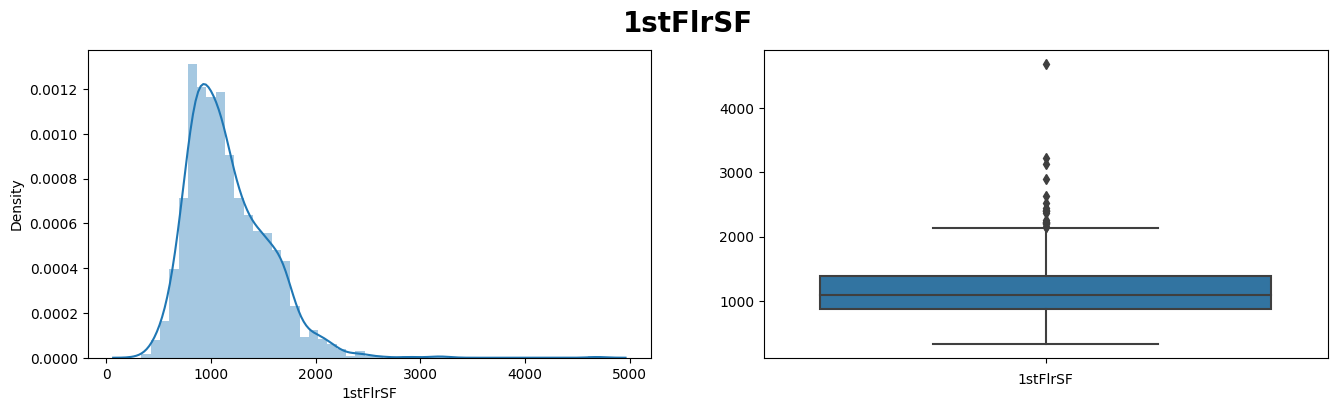

3SsnPorch unique Sample Number 20


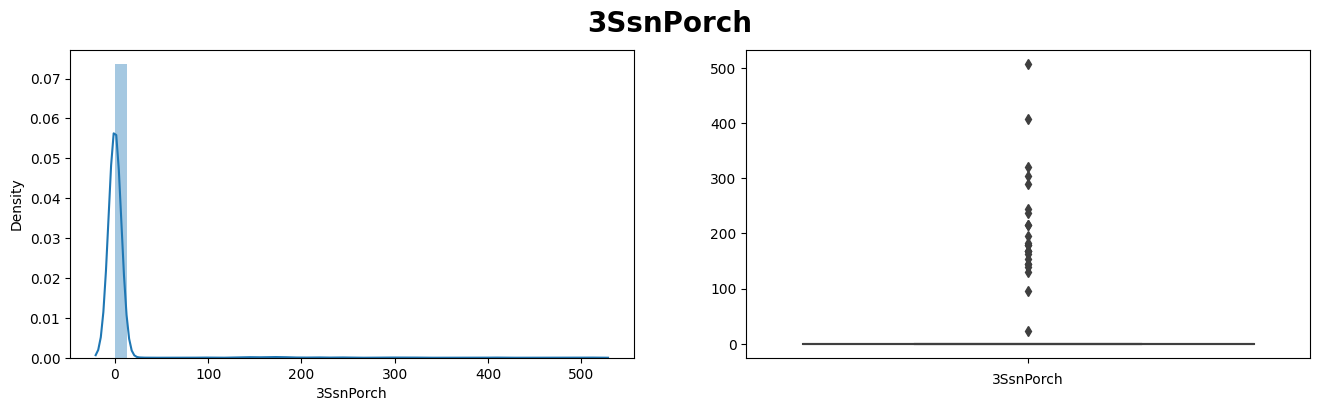

MiscVal unique Sample Number 21


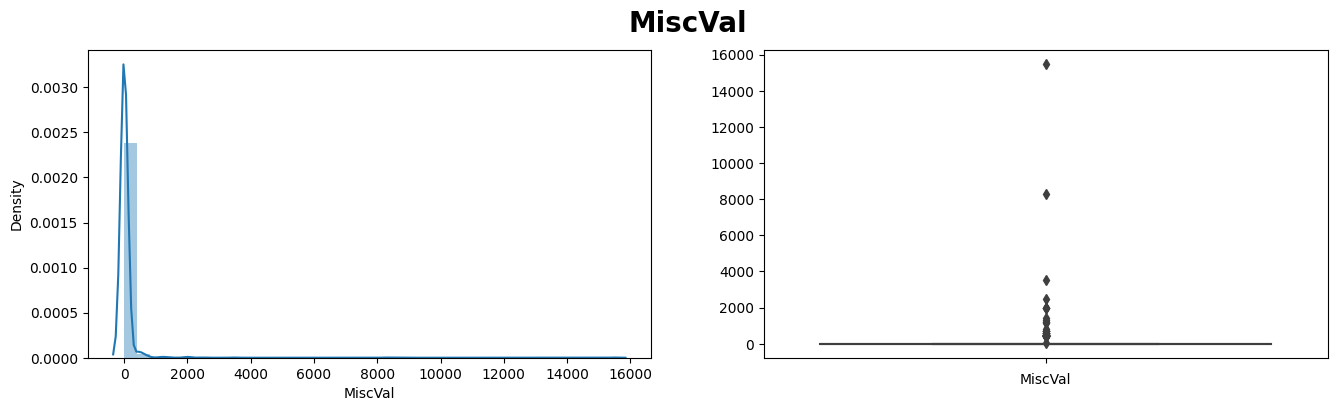

ScreenPorch unique Sample Number 76


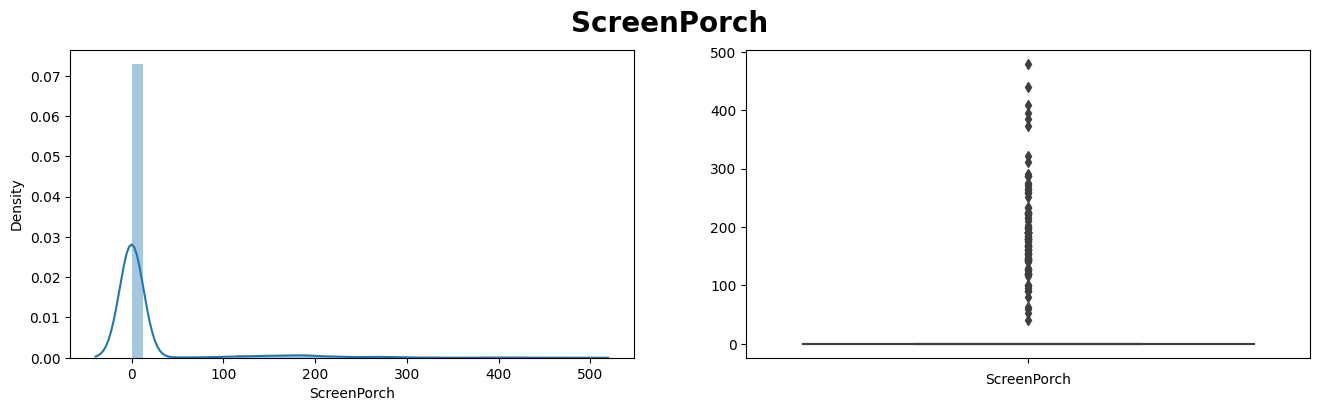

2ndFlrSF unique Sample Number 414


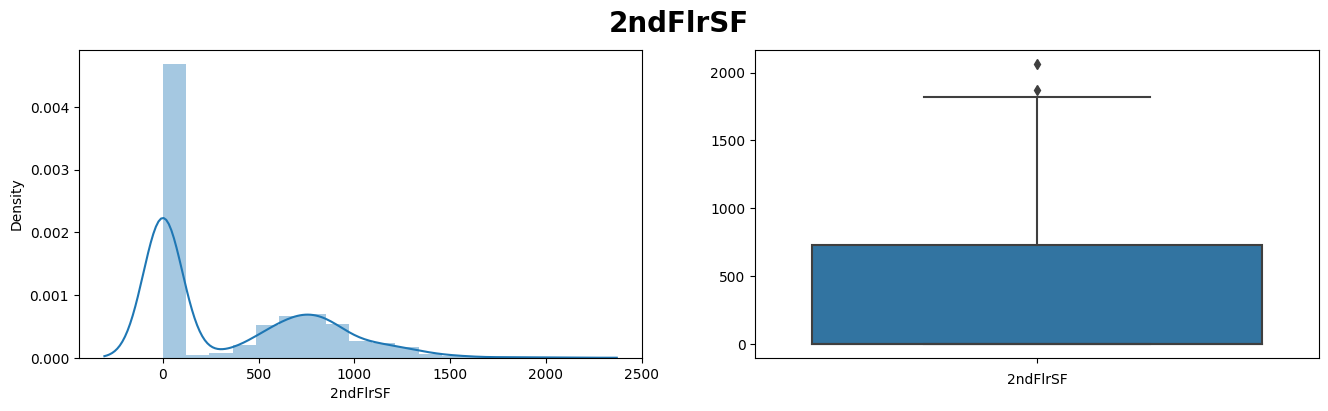

RemodAge unique Sample Number 61


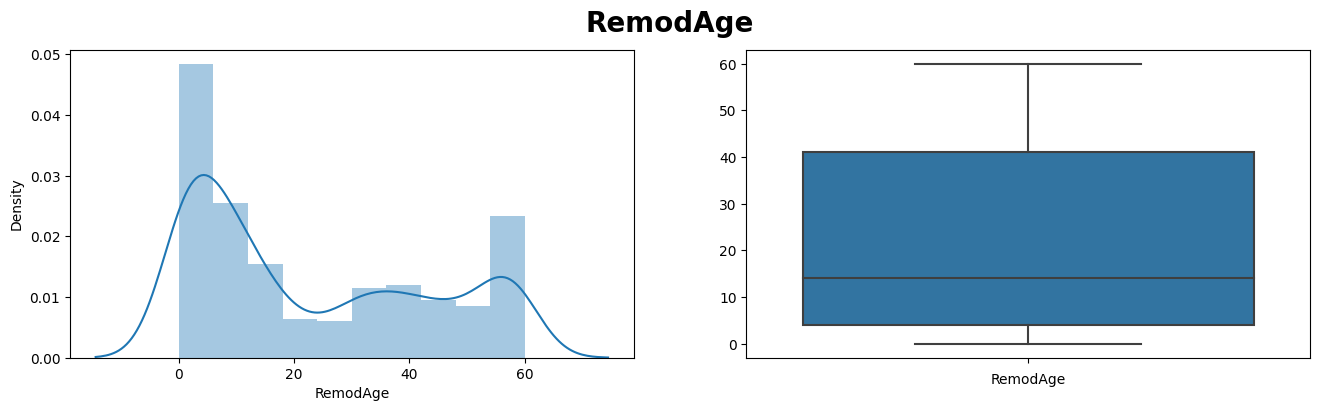

BsmtFinSF1 unique Sample Number 633


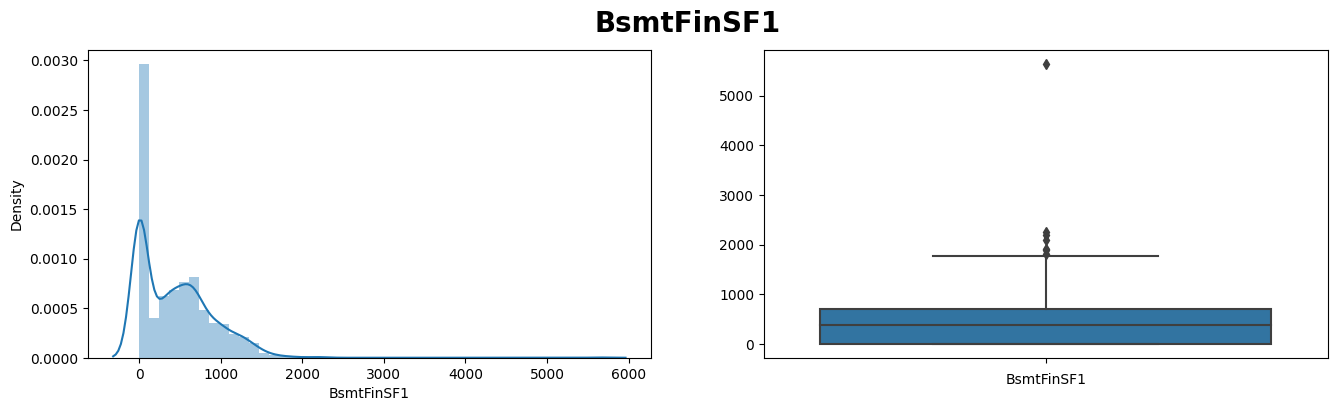

GrLivArea unique Sample Number 858


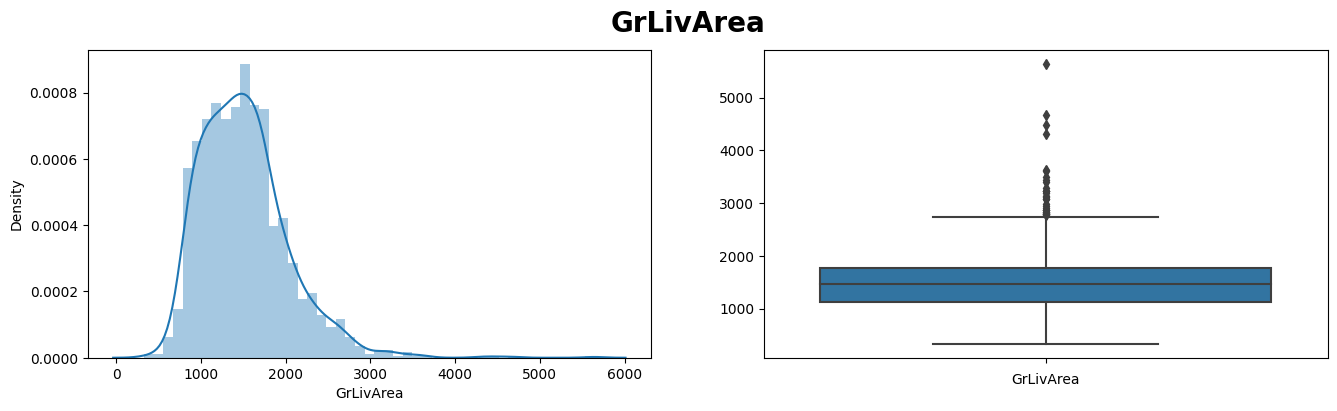

Age unique Sample Number 122


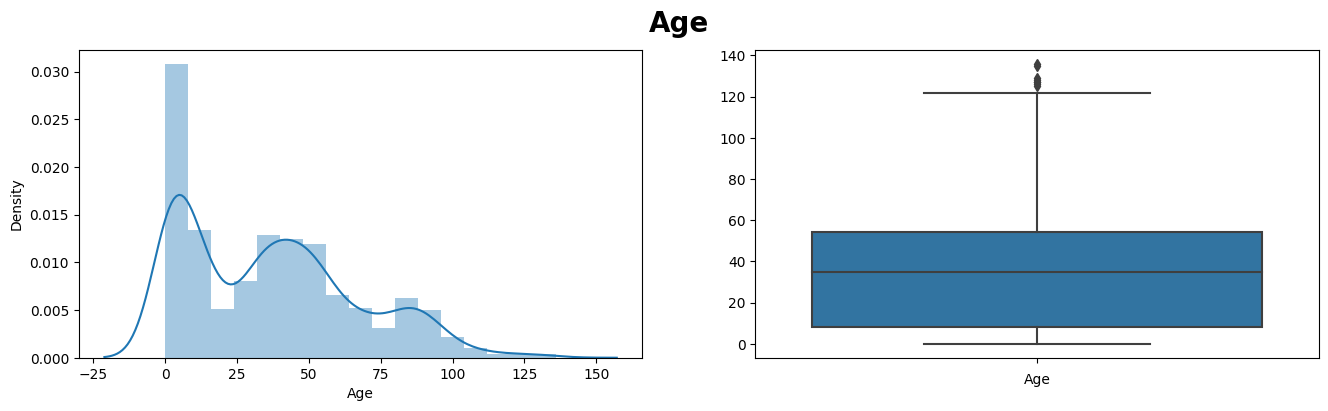

BsmtUnfSF unique Sample Number 777


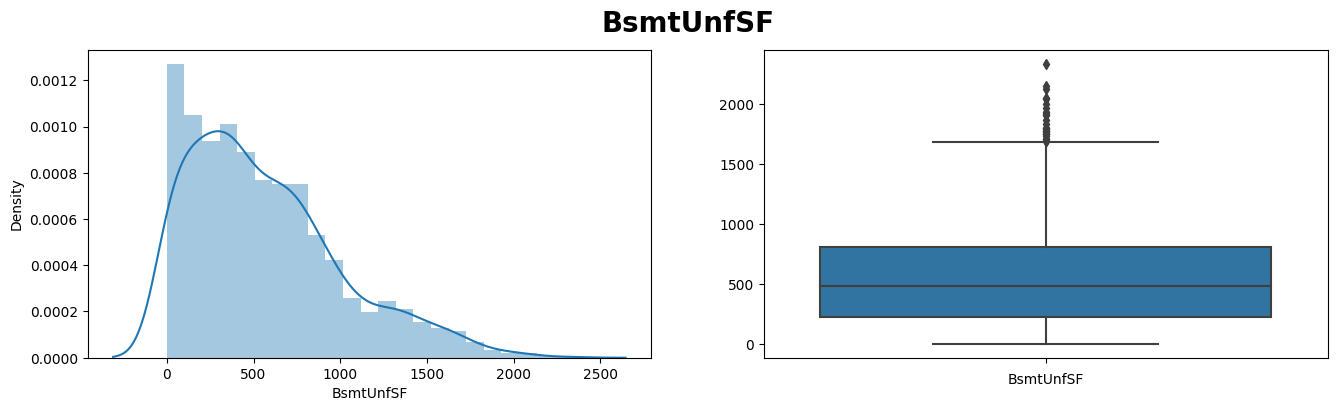

BsmtFinSF2 unique Sample Number 144


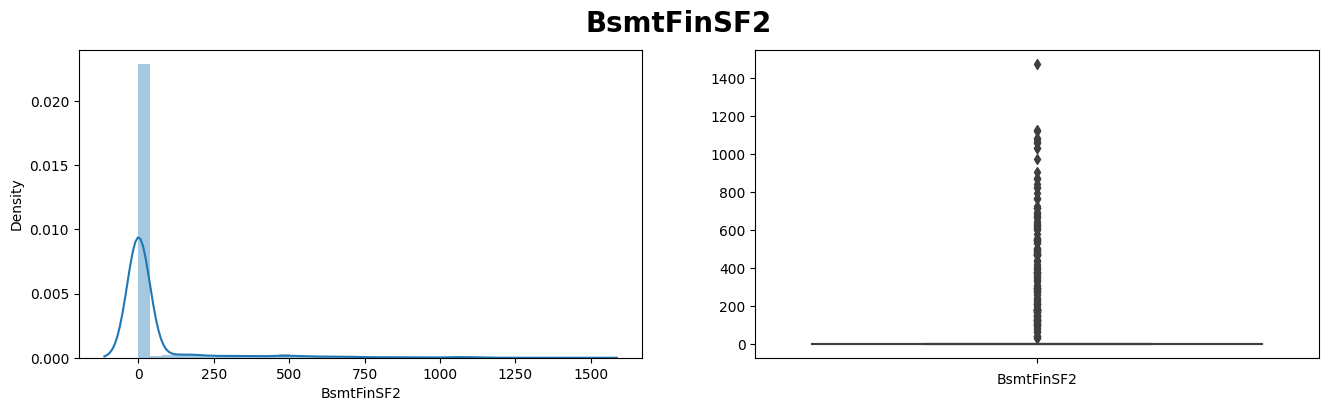

OpenPorchSF unique Sample Number 201


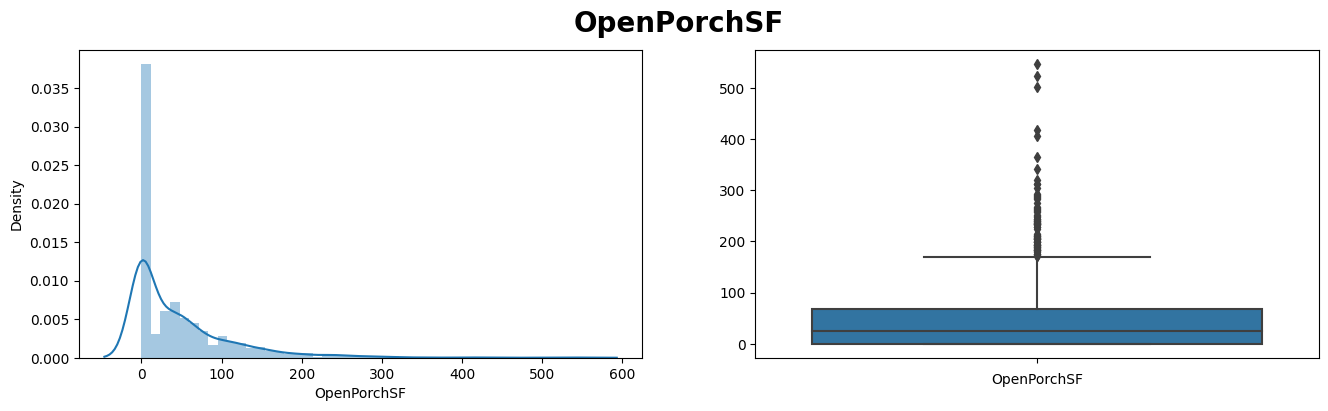

LowQualFinSF unique Sample Number 24


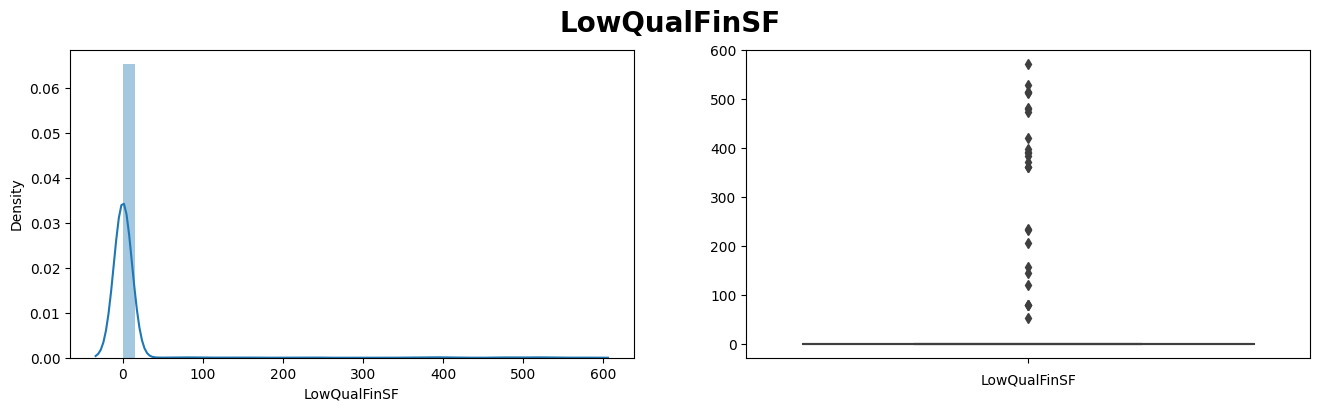

EnclosedPorch unique Sample Number 119


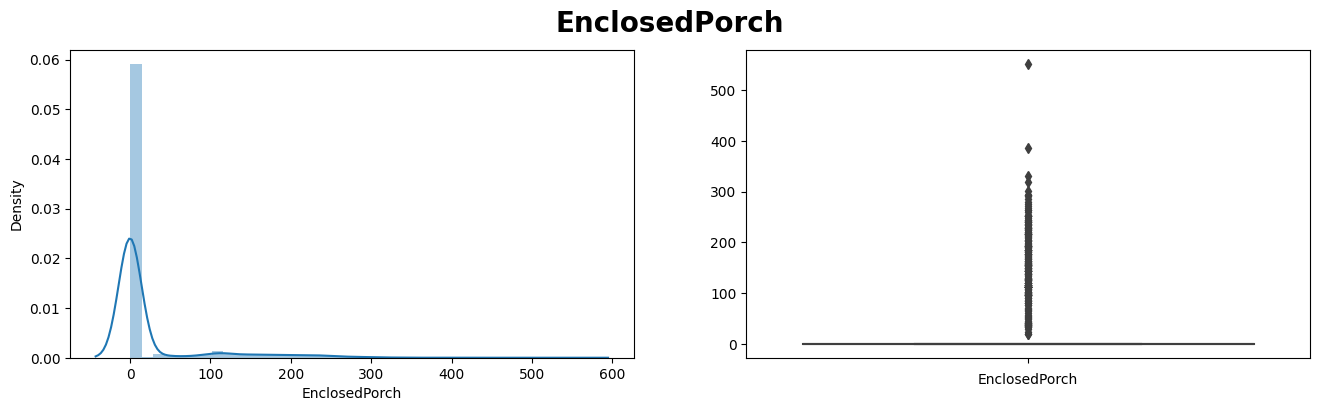

LotArea unique Sample Number 1066


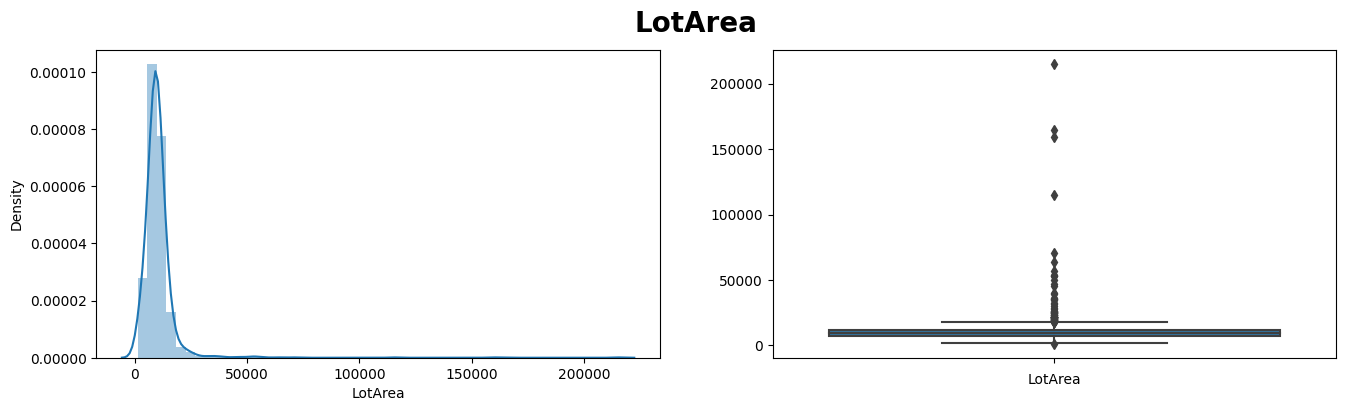

MasVnrArea unique Sample Number 327


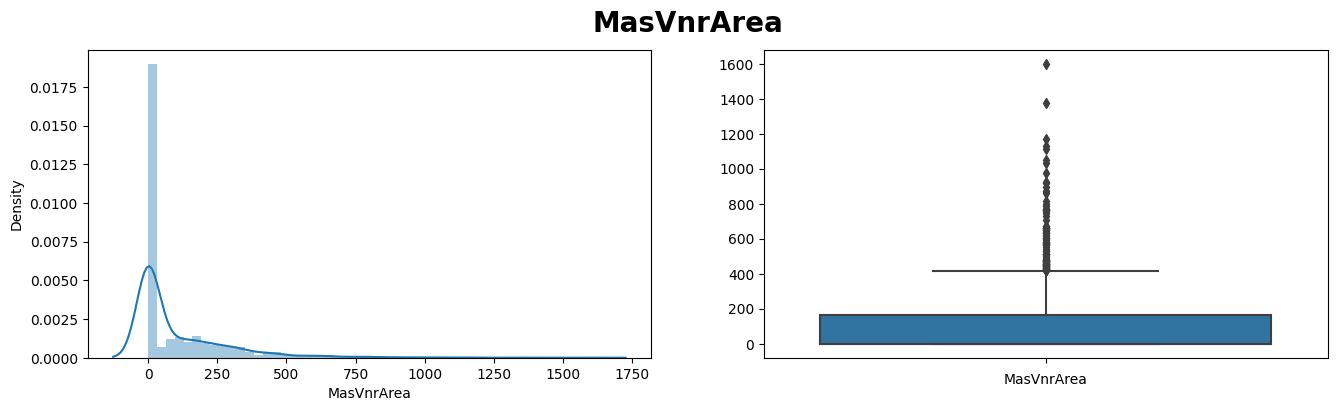

LotFrontage unique Sample Number 164


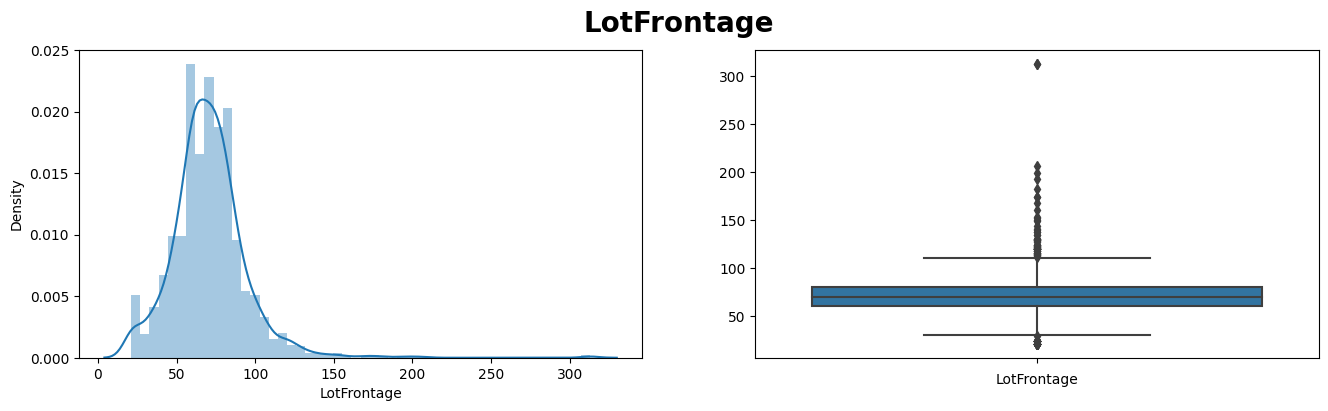

SalePrice unique Sample Number 657


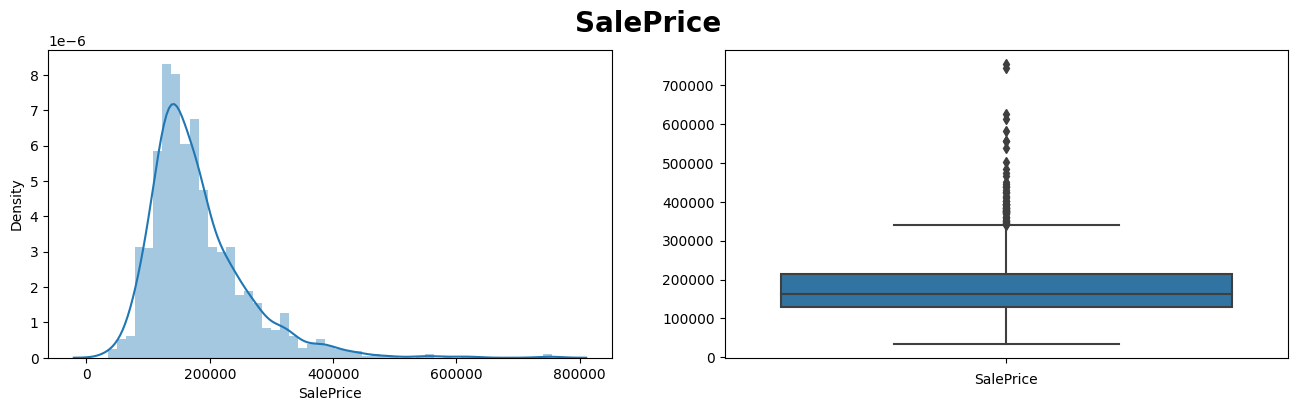

PoolArea unique Sample Number 8


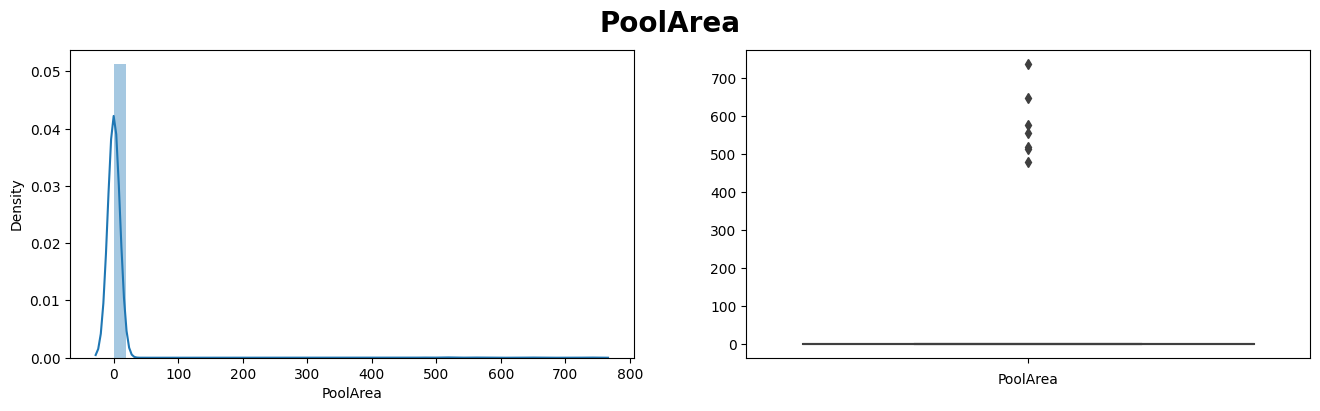

TotalBsmtSF unique Sample Number 717


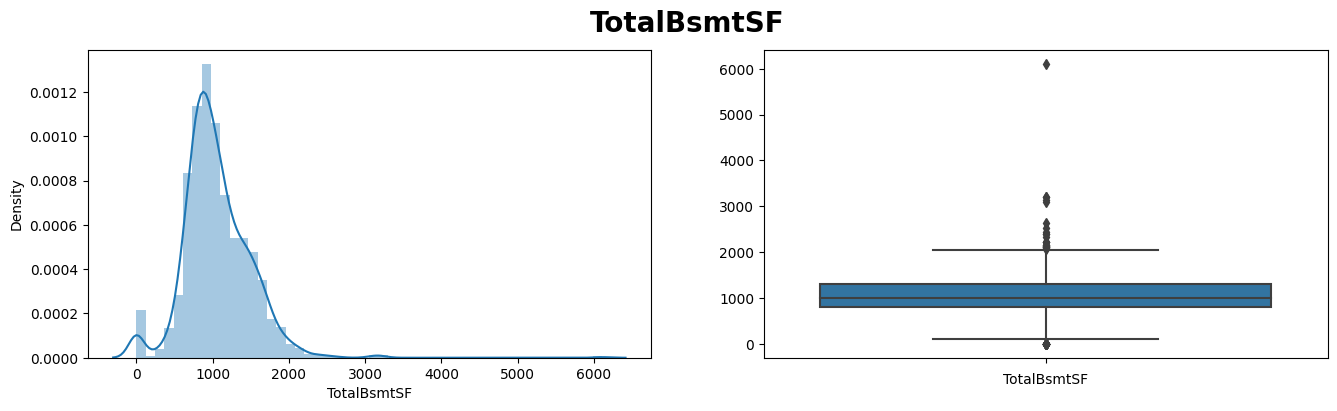

GarageArea unique Sample Number 438


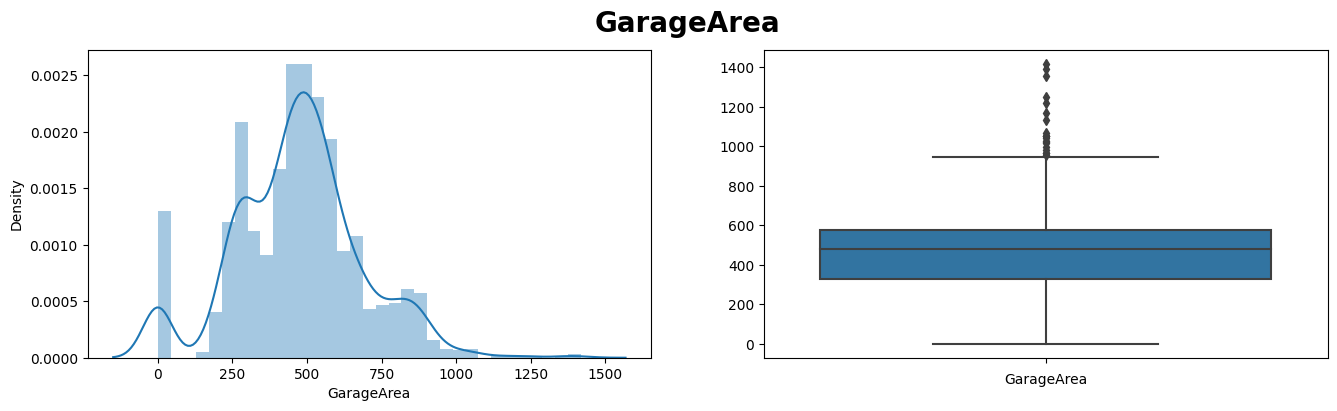

WoodDeckSF unique Sample Number 274


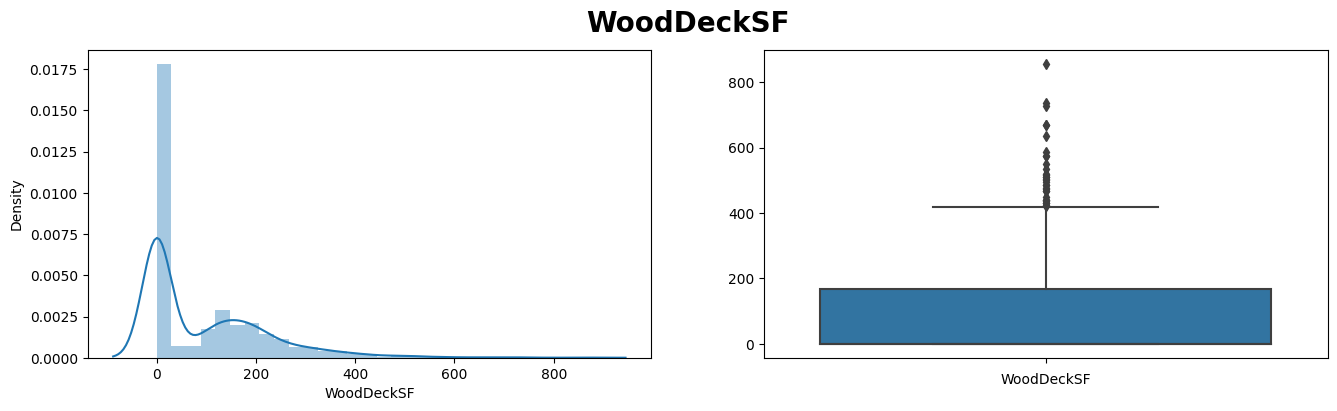

In [ ]:
display(Javascript('''google.colab.output.setIframeHeight(0, true, {maxHeight: 10000})'''))

for c in num_cols:
  if df2[c].nunique()>5:
    print(c, "unique Sample Number", df2[c].nunique())
    dist_investigate(df2[c], c)

## **Remove Outliers**

most of the values specially the dependent varible is highly skewed so we use different methods to see if we can make them normaly distributed or get rid of outliers.

In [ ]:
def removeOutlier(data, lowT=0.01, upT=0.99):
  lower = data.quantile(lowT)
  upper = data.quantile(upT)
  data = np.where(data >= upper,
        upper,
        np.where(data <= lower,
        lower,
        data))
  return data

def removeOutlier_row(df, col, lowT=0.25, upT=0.75, threshold = 1.5):
  lower = df[col].quantile(lowT)
  upper = df[col].quantile(upT)
  IQR = upper - lower
  idx = df[(df[col] < lower - threshold * IQR) | (df[col] > upper + threshold * IQR)].index

  return idx

<IPython.core.display.Javascript object>

1stFlrSF unique Sample Number 683
Skewness: 0.4067592923206231 
kurtosis: -0.7232512450684161


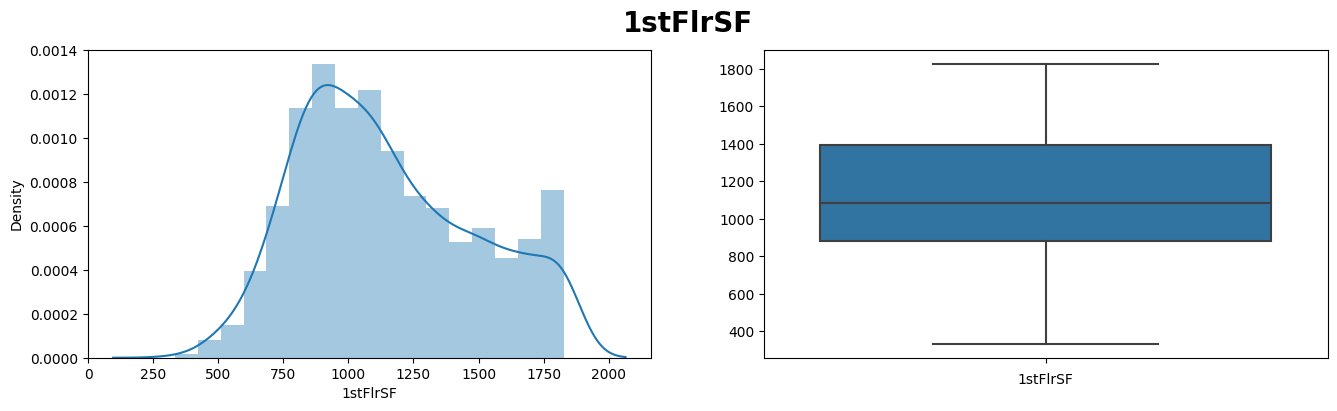

3SsnPorch unique Sample Number 1
Skewness: nan 
kurtosis: nan


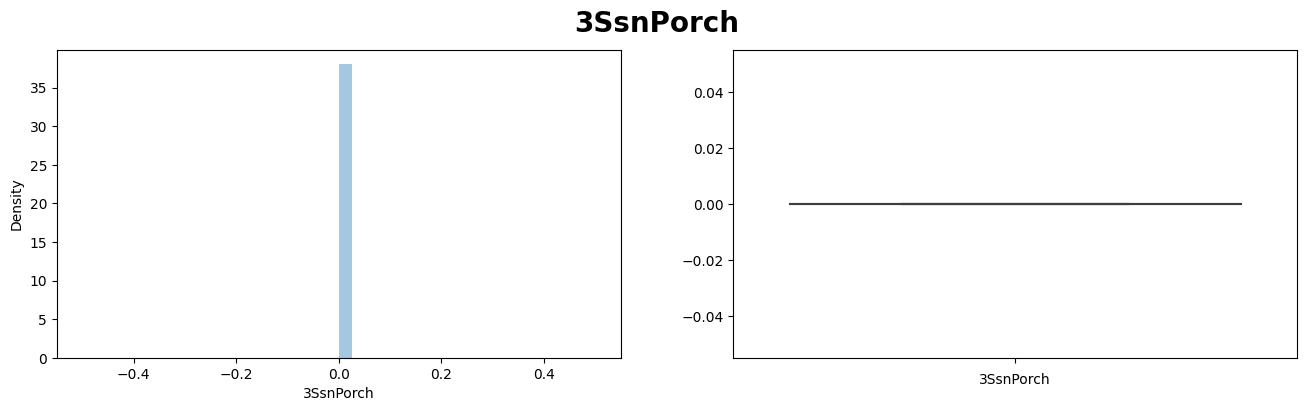

MiscVal unique Sample Number 1
Skewness: nan 
kurtosis: nan


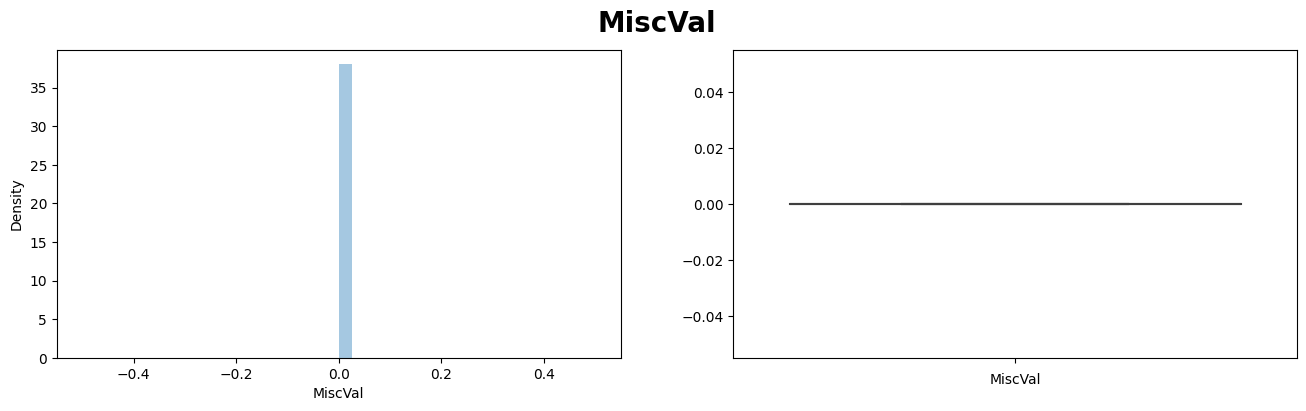

ScreenPorch unique Sample Number 29
Skewness: 3.2341209583827704 
kurtosis: 8.63094853479582


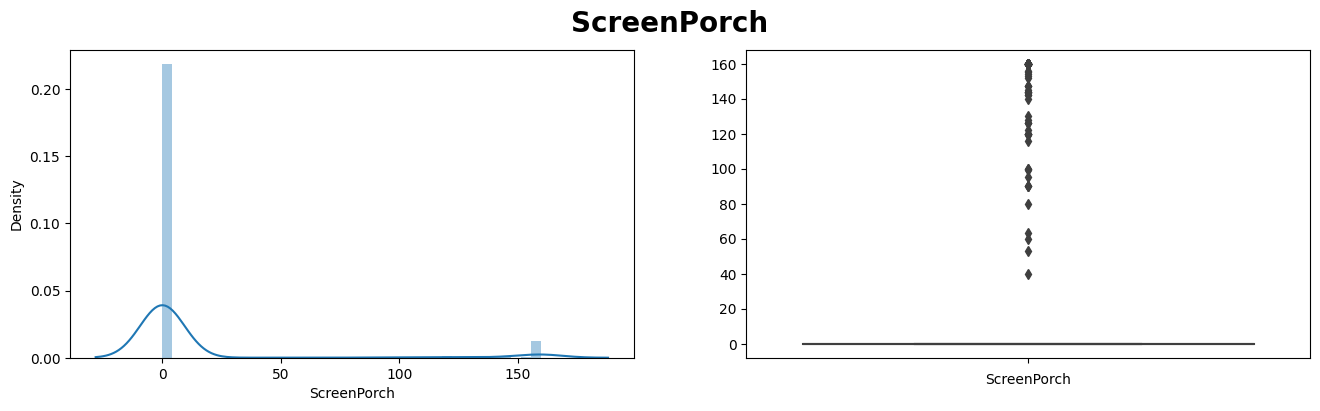

2ndFlrSF unique Sample Number 350
Skewness: 0.6324883525136068 
kurtosis: -1.2304907310813435


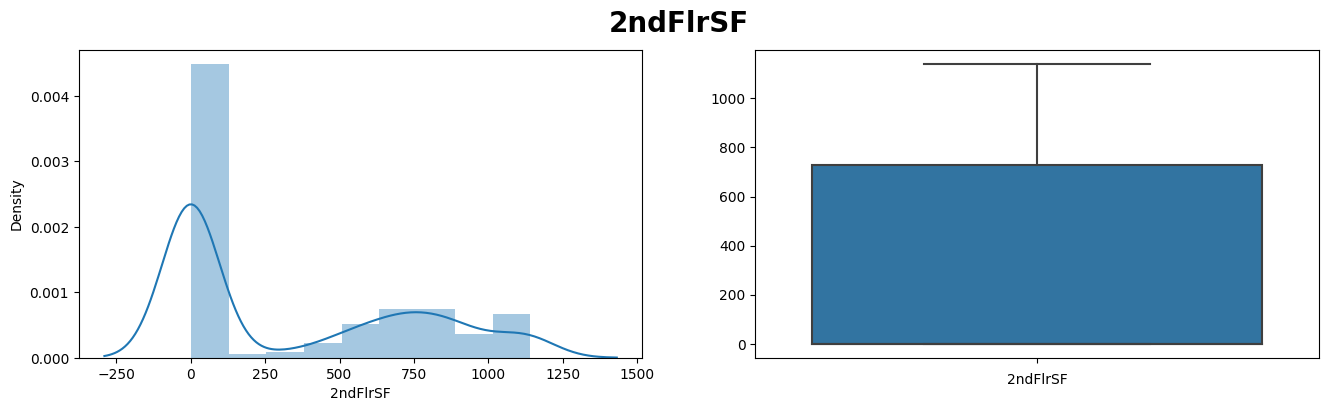

RemodAge unique Sample Number 59
Skewness: 0.48592463369180416 
kurtosis: -1.2913118702827922


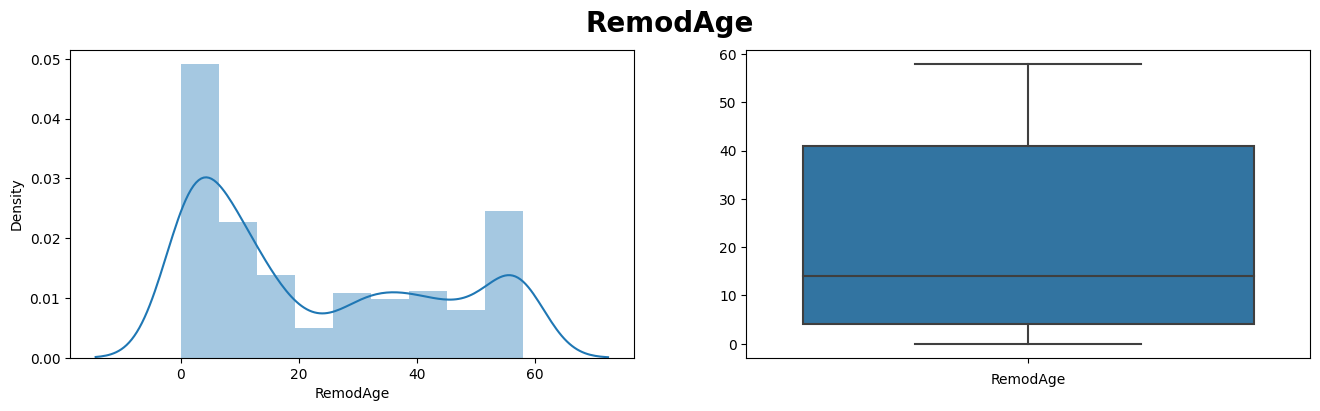

BsmtFinSF1 unique Sample Number 570
Skewness: 0.5438706157920355 
kurtosis: -0.8806692598723131


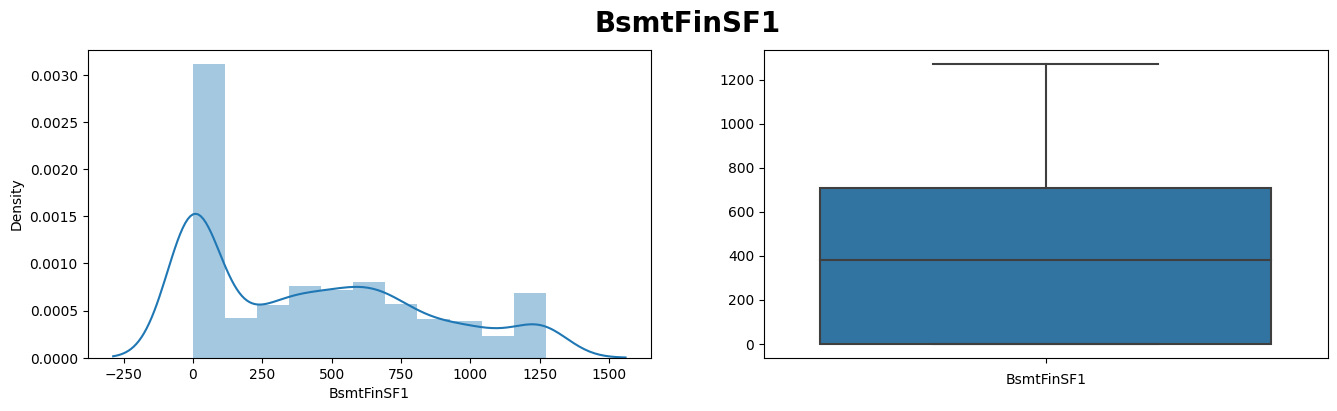

GrLivArea unique Sample Number 789
Skewness: 0.3922624607289204 
kurtosis: -0.5200222871305016


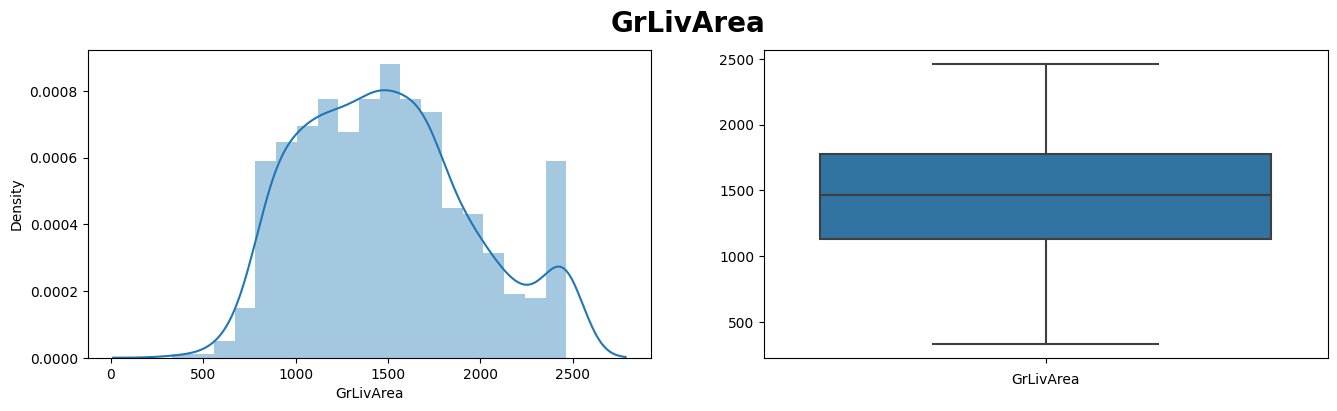

Age unique Sample Number 92
Skewness: 0.41641097000433375 
kurtosis: -0.9772452808631709


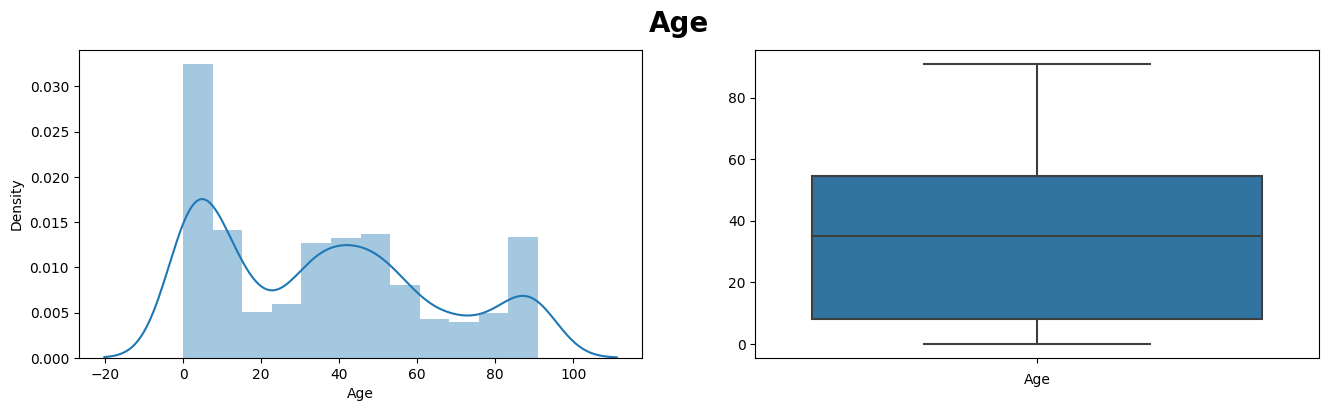

BsmtUnfSF unique Sample Number 717
Skewness: 0.6455399198773842 
kurtosis: -0.45280233540475656


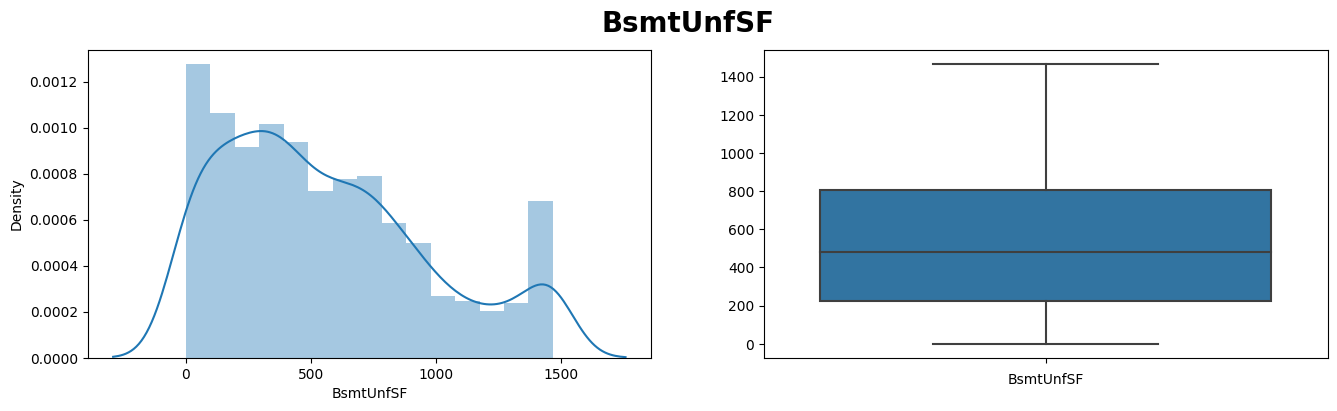

BsmtFinSF2 unique Sample Number 78
Skewness: 2.9900589728941536 
kurtosis: 7.4242172534841835


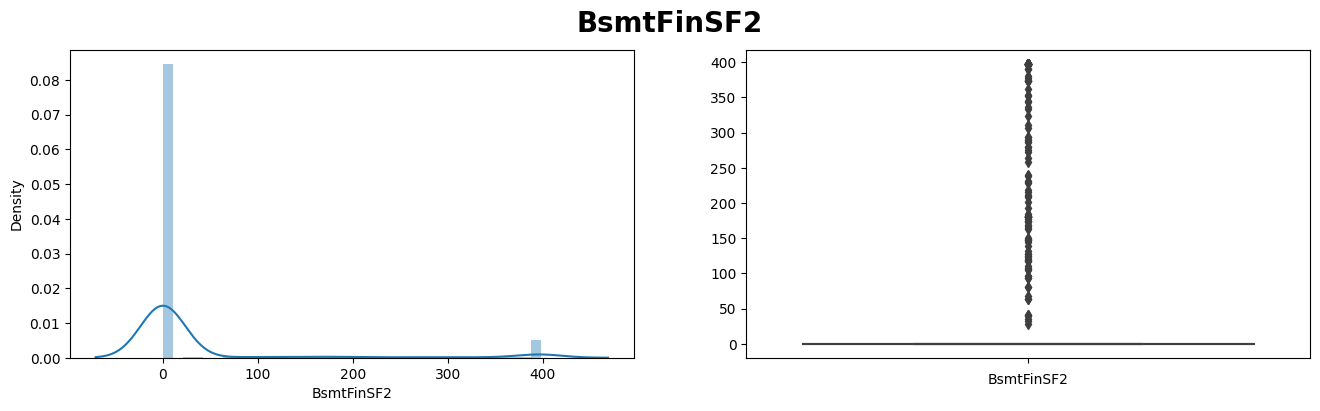

OpenPorchSF unique Sample Number 141
Skewness: 1.1603964213968714 
kurtosis: 0.2613875292698493


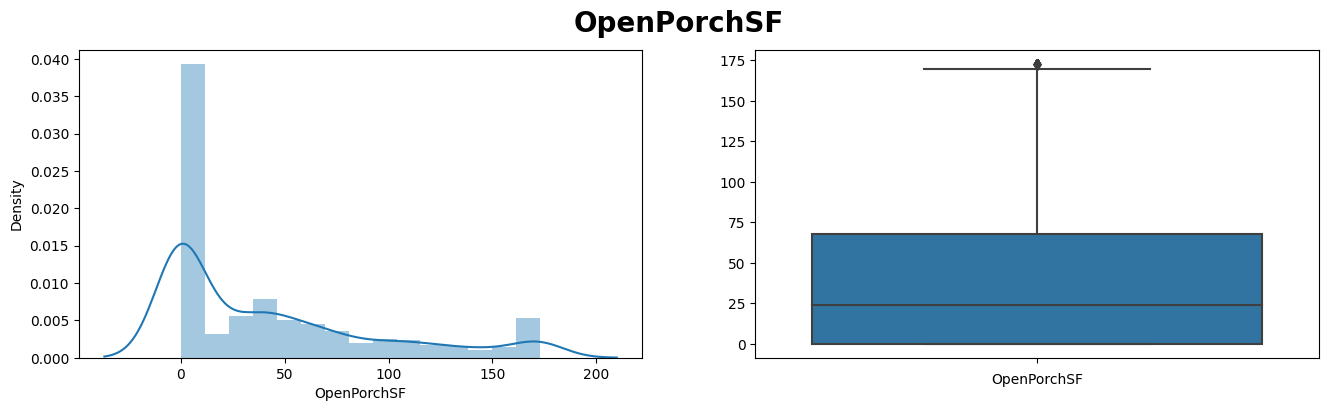

LowQualFinSF unique Sample Number 1
Skewness: nan 
kurtosis: nan


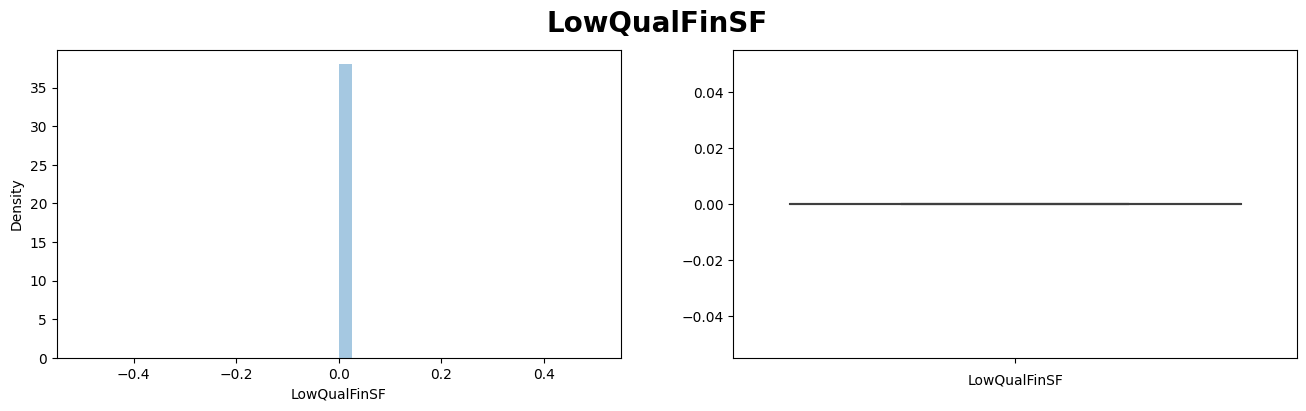

EnclosedPorch unique Sample Number 72
Skewness: 2.4576413899629213 
kurtosis: 4.437179412332654


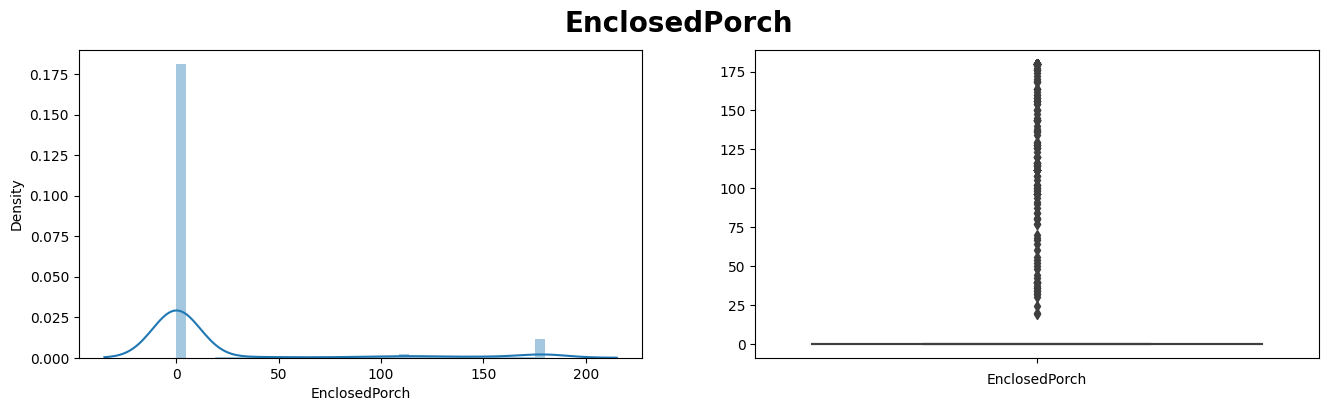

LotArea unique Sample Number 995
Skewness: 0.15527026300693833 
kurtosis: 0.005008527651654937


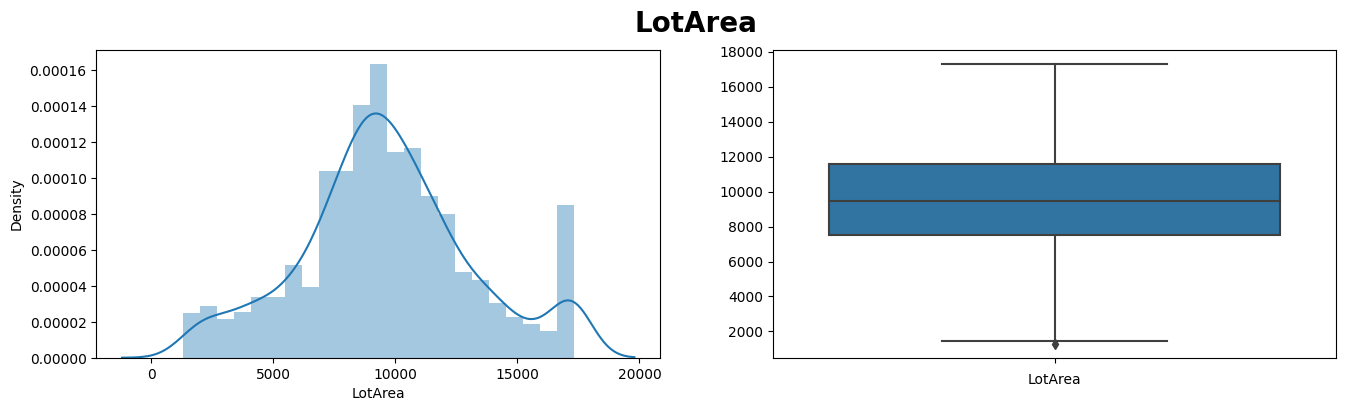

MasVnrArea unique Sample Number 262
Skewness: 1.3845783120992687 
kurtosis: 0.6620286155146866


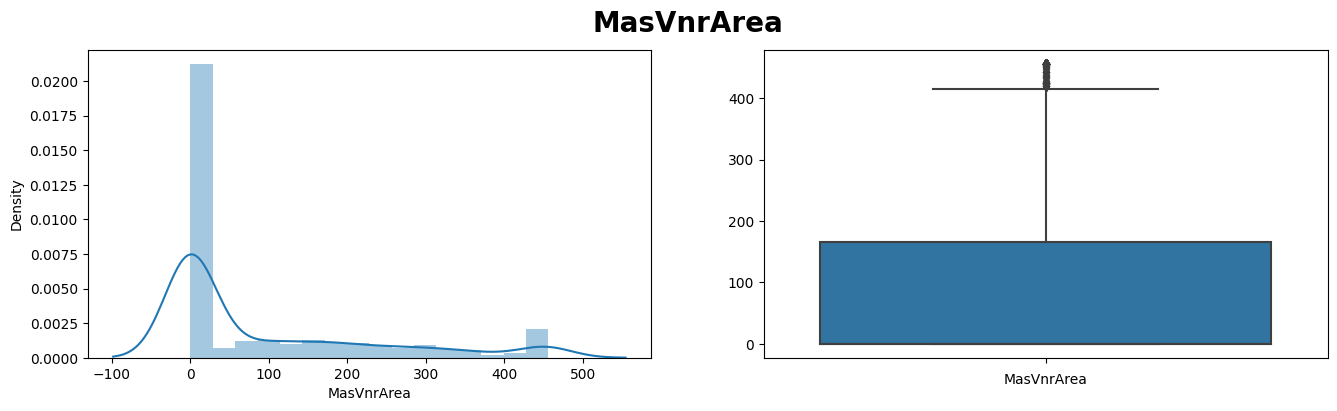

LotFrontage unique Sample Number 127
Skewness: -0.124295785980407 
kurtosis: -0.07696260565140411


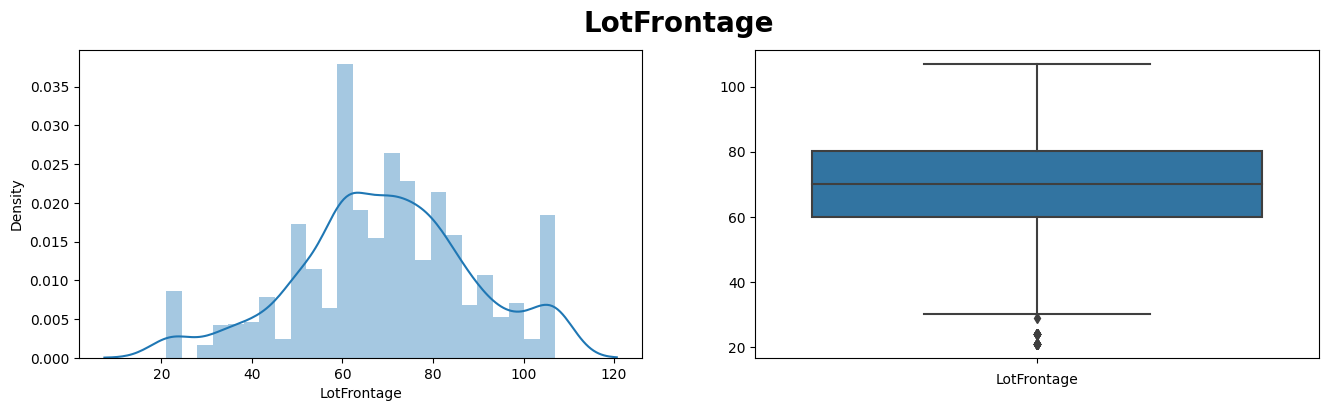

SalePrice unique Sample Number 591
Skewness: 0.7235296284118409 
kurtosis: -0.12661309640515483


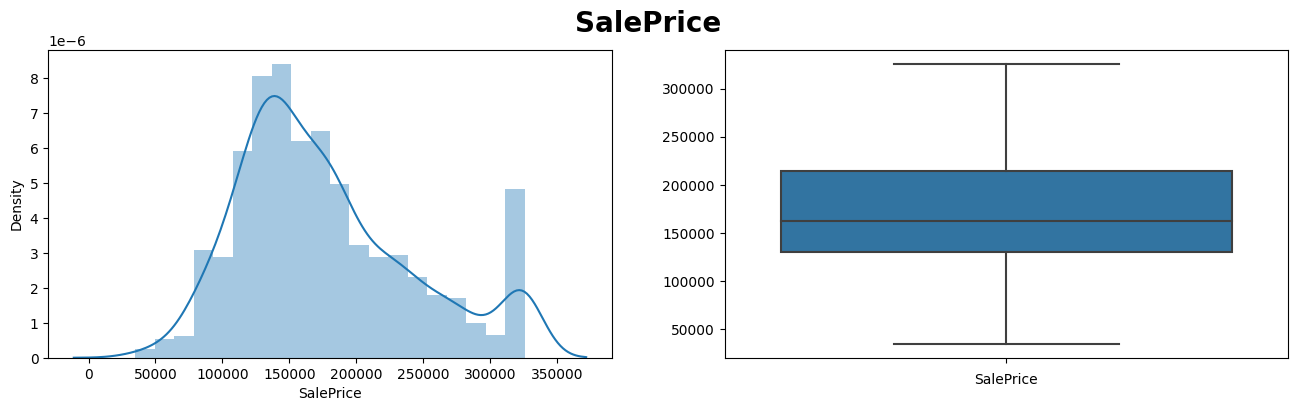

PoolArea unique Sample Number 1
Skewness: nan 
kurtosis: nan


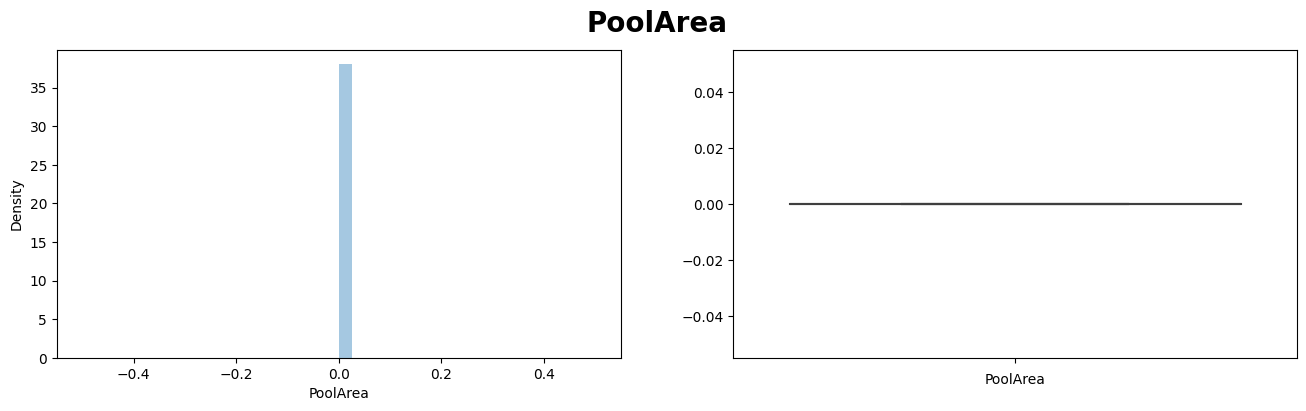

TotalBsmtSF unique Sample Number 652
Skewness: -0.06525202083830516 
kurtosis: 0.11332845149291959


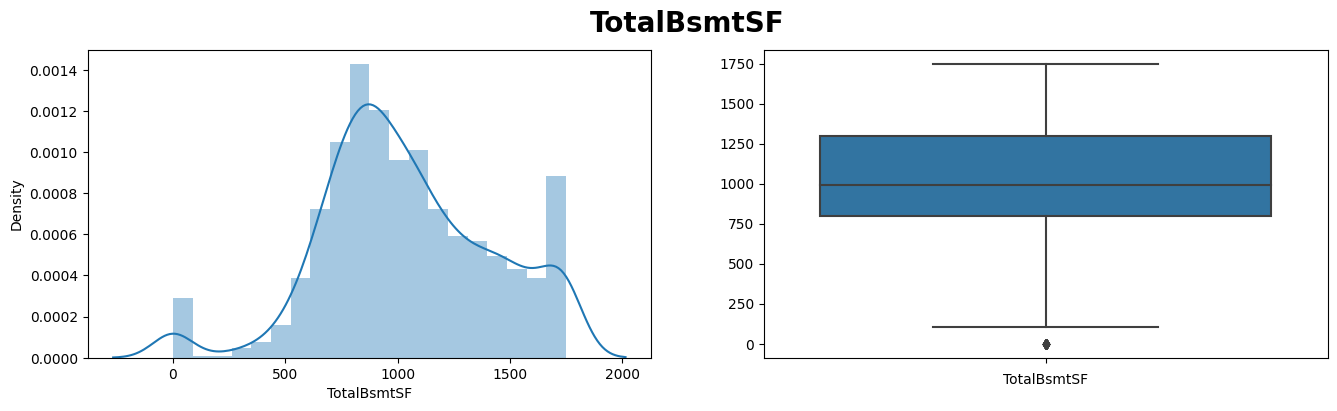

GarageArea unique Sample Number 387
Skewness: -0.1938820990276302 
kurtosis: 0.03771050985701052


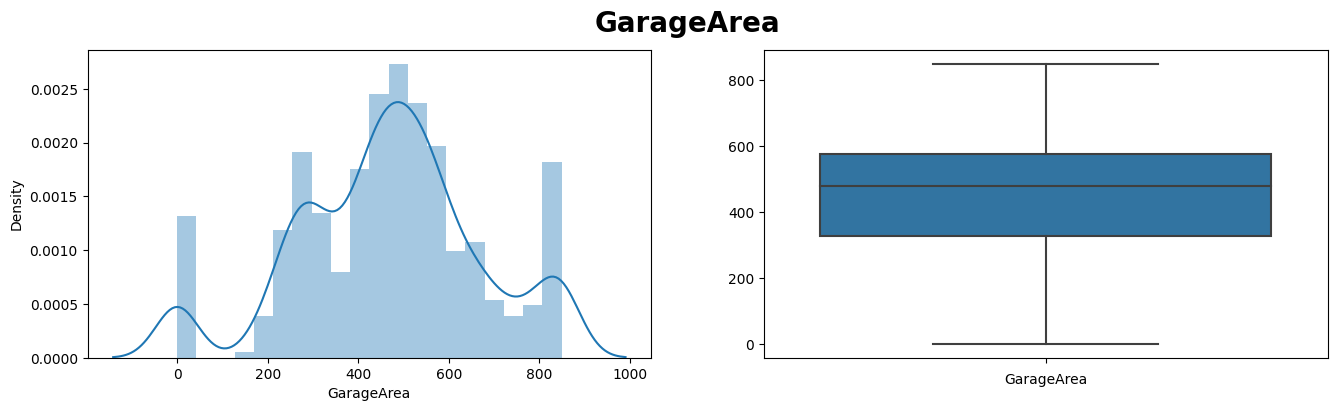

WoodDeckSF unique Sample Number 211
Skewness: 0.8631718052548242 
kurtosis: -0.5478559024272971


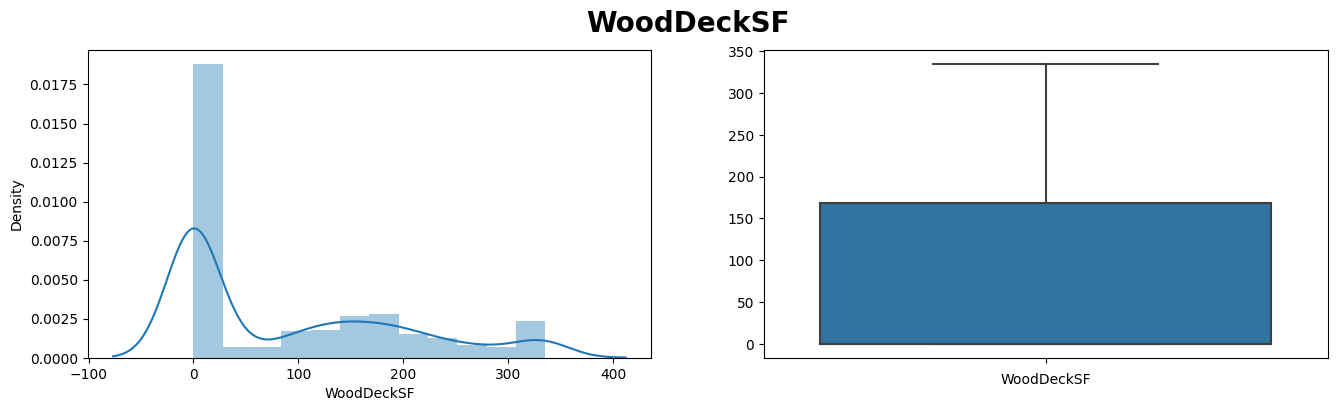

In [ ]:
display(Javascript('''google.colab.output.setIframeHeight(0, true, {maxHeight: 10000})'''))

# Remove outliers in each variables and visualise distribution
for c in num_cols:
  if df2[c].nunique()>5:
    data = removeOutlier(df2[c], lowT=0, upT=0.95)
    print(c, "unique Sample Number", len(set(data)))
    sk = skew(data)
    ku = kurtosis(data)
    print("Skewness:", sk, "\nkurtosis:", ku)
    dist_investigate(data, c)


1. univariate data will give nan for estimation of skewedness and kurtosis.
2. removal outliers for each variable reduces skewedness in most cases but due to high reductionn in overall sample numbers I didnot use it.
3. instead I have found outliers in target (dependent) variable and only removed rows that are considered outliers for SalePrice.
4. Then used Log transformed to normalize data in each column and reduce skewedness.

<IPython.core.display.Javascript object>

1stFlrSF unique Sample Number 211
Skewness: 1.367035744756386 
kurtosis: 5.948219611595009


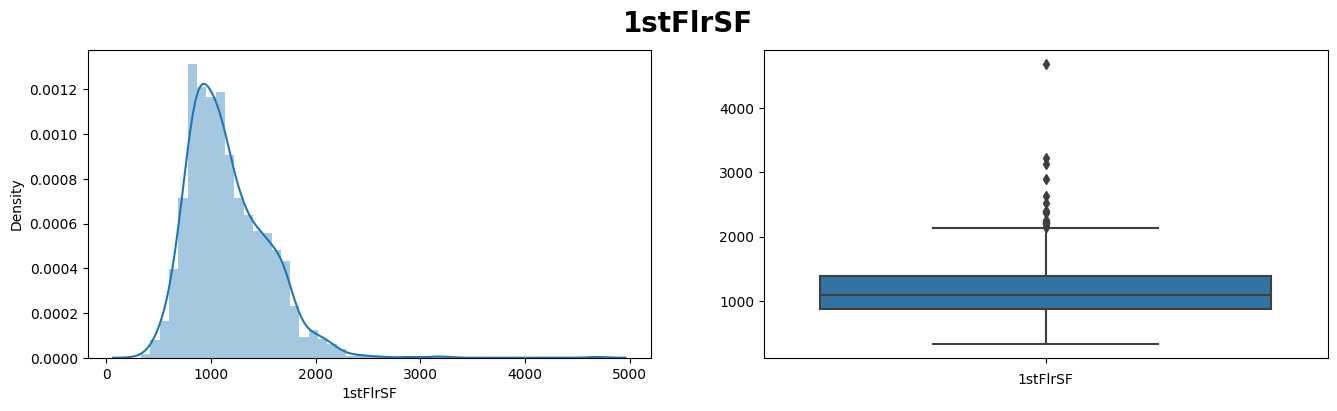

Skewness: 0.06157232877585194 
kurtosis: 0.14721173185962


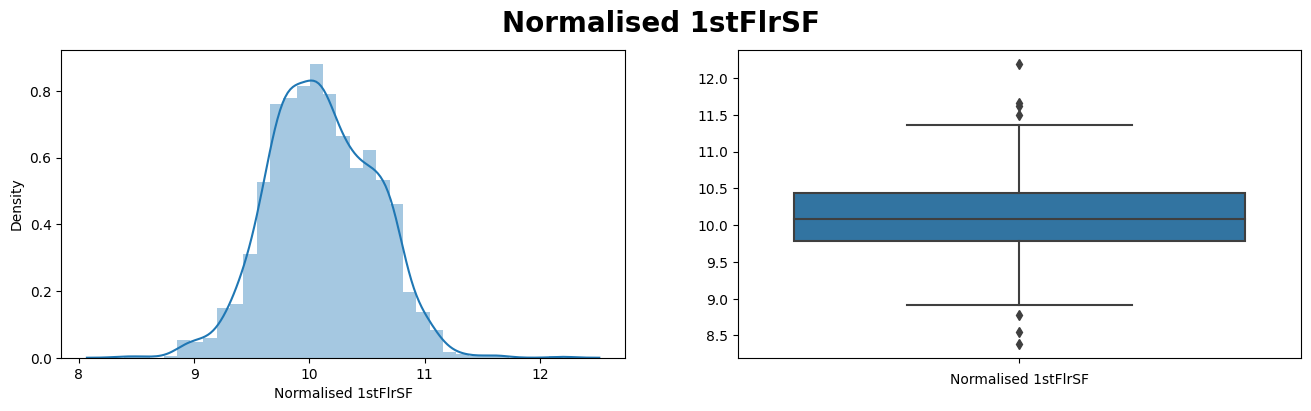

3SsnPorch unique Sample Number 211
Skewness: 10.264482879603516 
kurtosis: 122.70087212645552


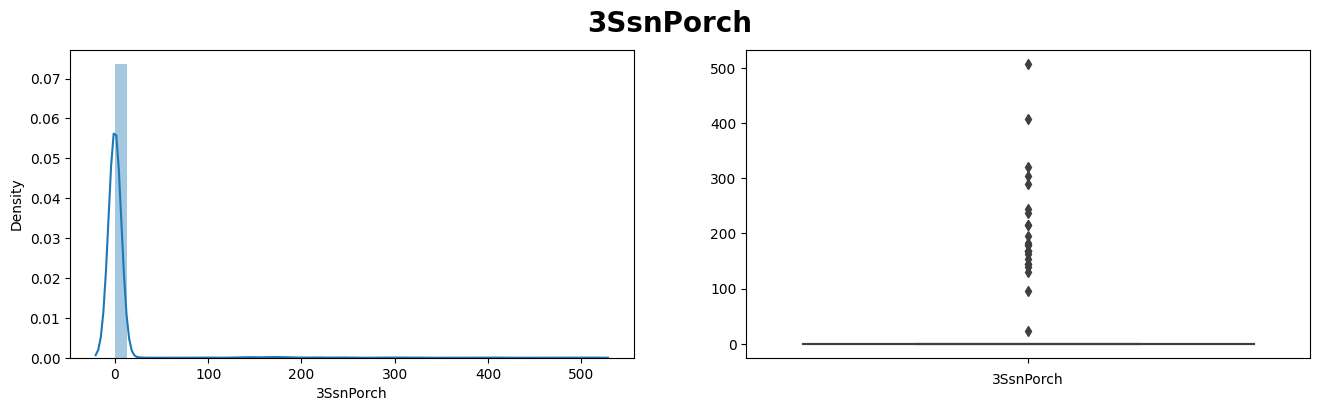

Skewness: 7.704387798813661 
kurtosis: 57.94422971426551


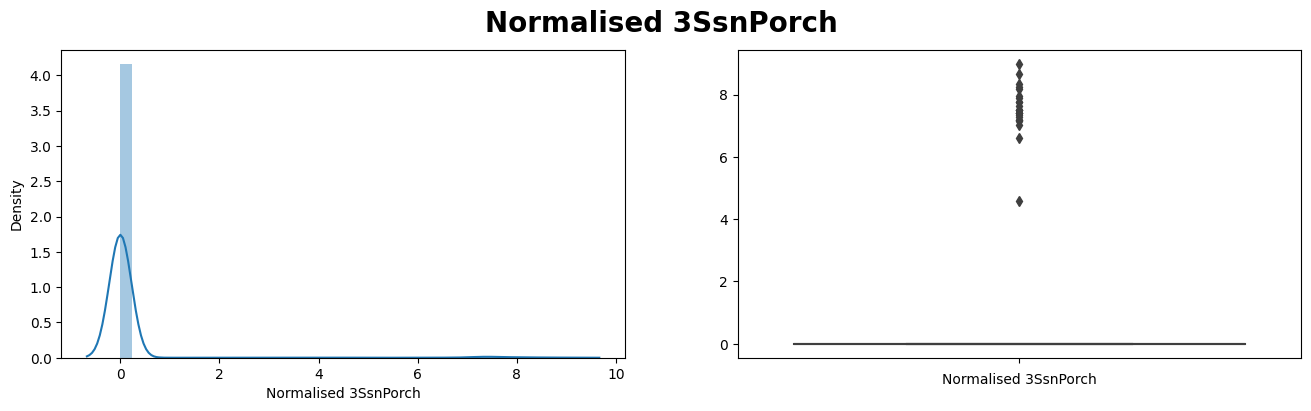

MiscVal unique Sample Number 211
Skewness: 24.38475190918802 
kurtosis: 695.7340393647506


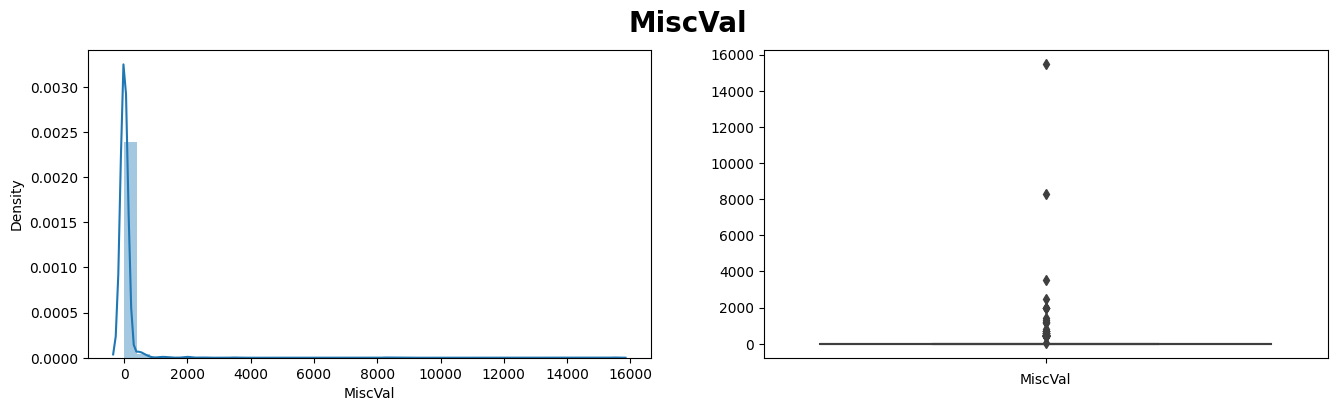

Skewness: 5.149082780723556 
kurtosis: 25.210756869911165


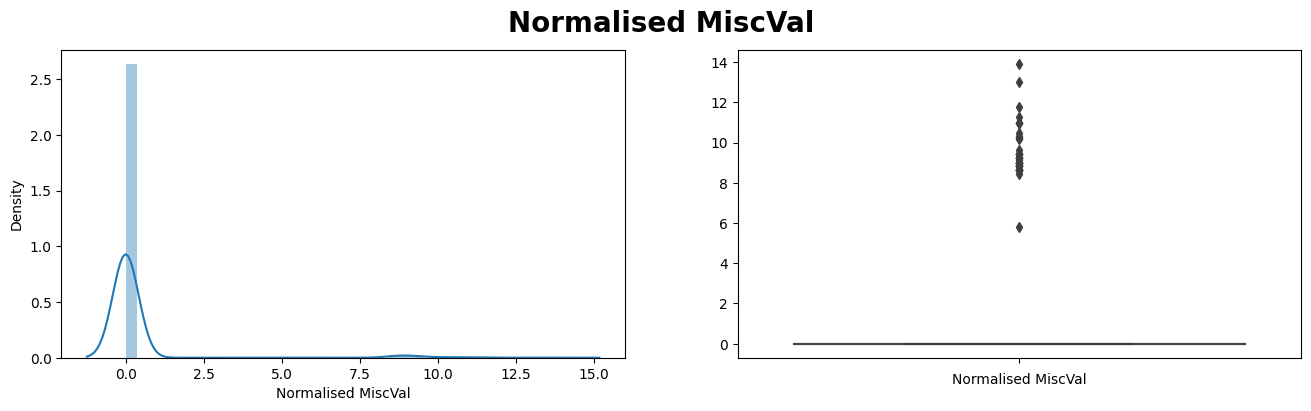

ScreenPorch unique Sample Number 211
Skewness: 4.10411397170291 
kurtosis: 18.2679120929803


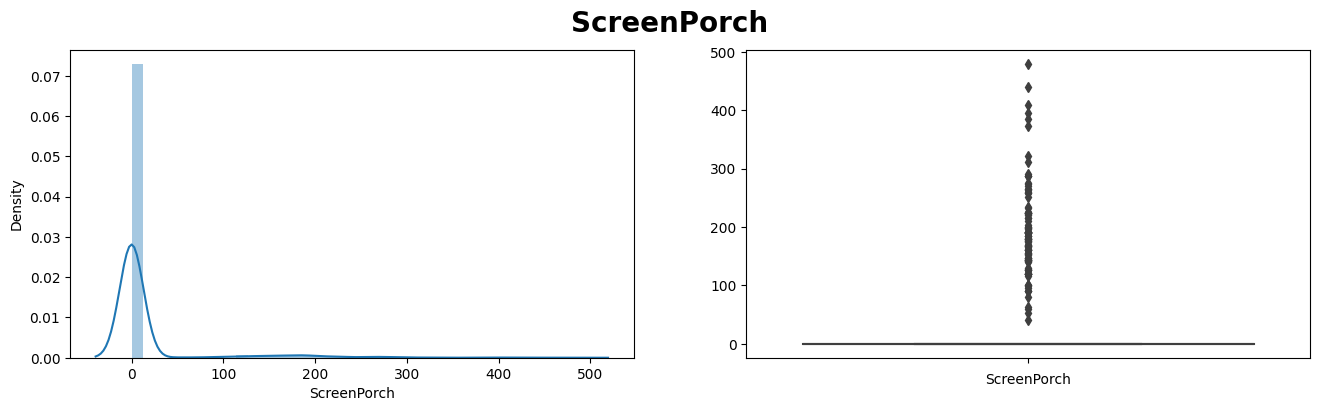

Skewness: 3.13514600721745 
kurtosis: 7.926415377806414


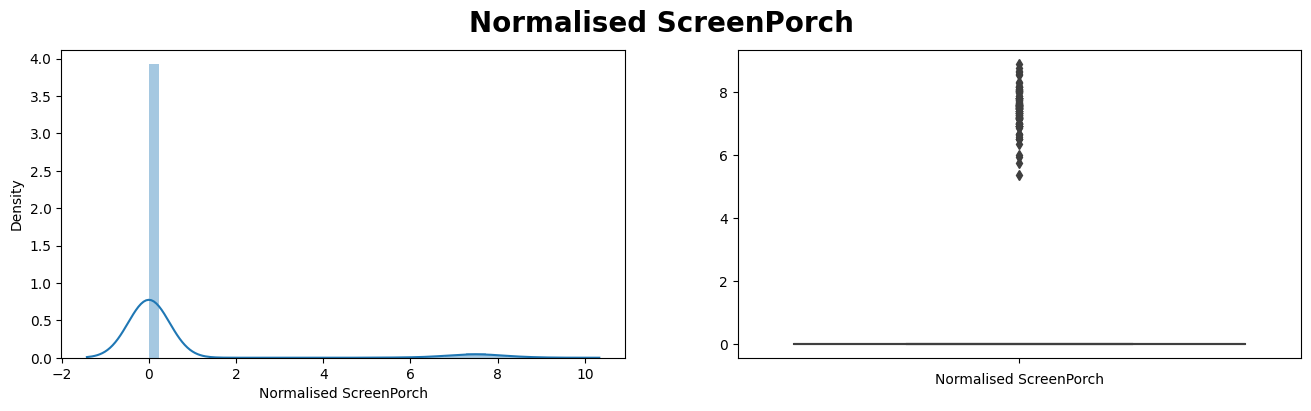

2ndFlrSF unique Sample Number 211
Skewness: 0.7810571236297984 
kurtosis: -0.7156639043744186


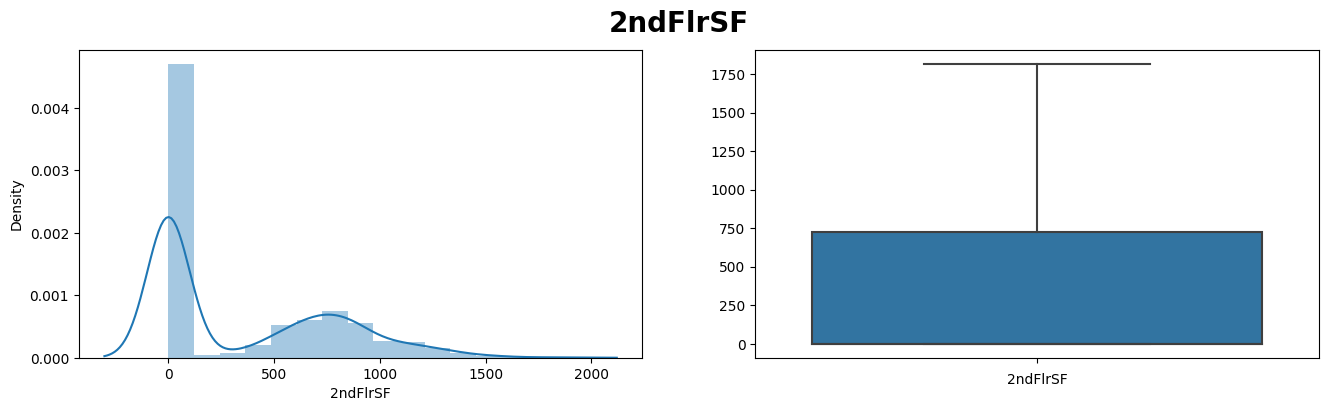

RemodAge unique Sample Number 211
Skewness: 0.4932961209494466 
kurtosis: -1.2760708646293675


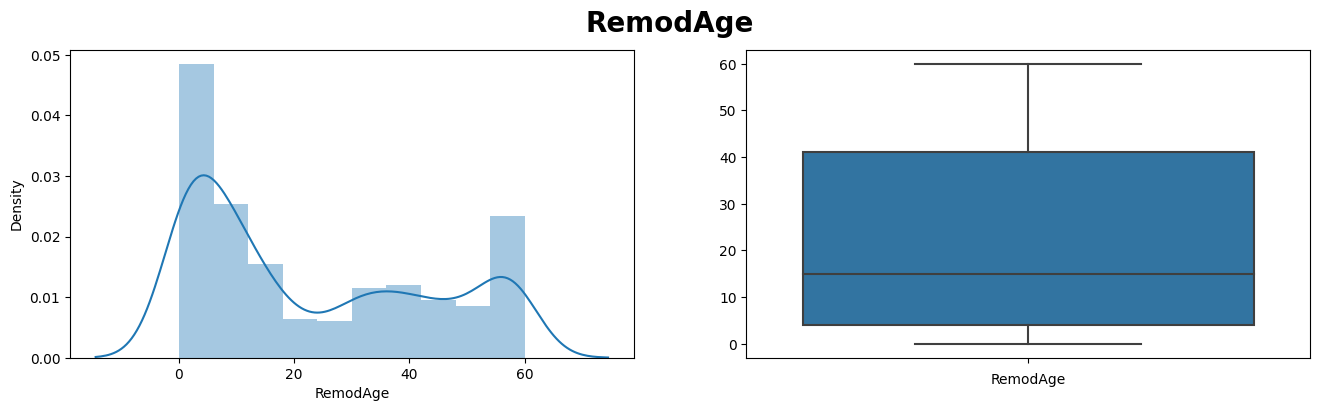

Skewness: -0.5770062367064636 
kurtosis: -0.8228214597020522


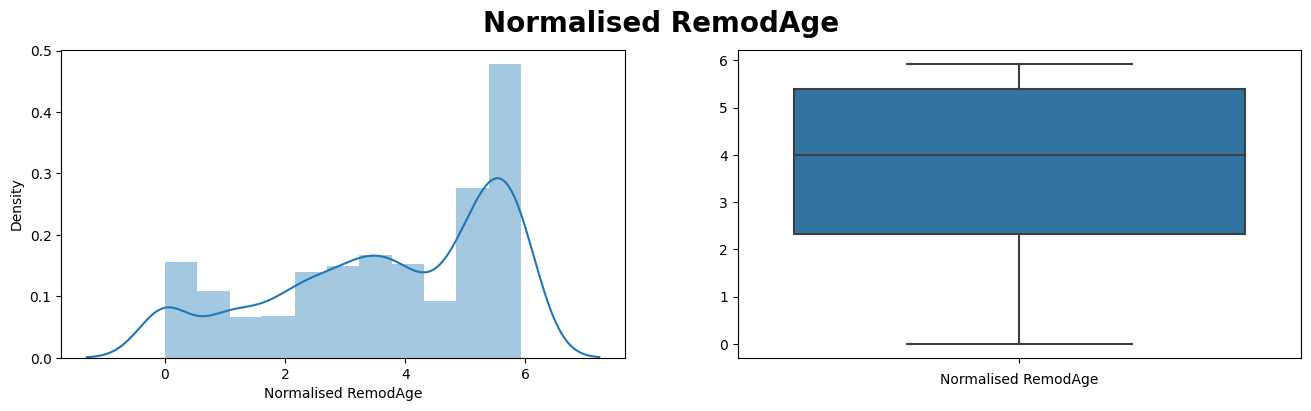

BsmtFinSF1 unique Sample Number 211
Skewness: 1.7046655329706044 
kurtosis: 11.525516897395487


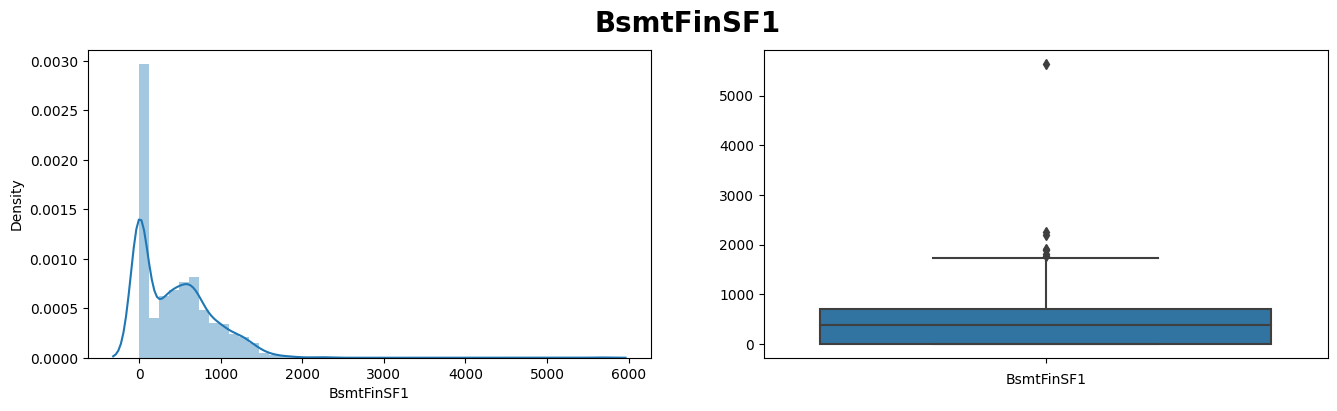

Skewness: -0.6166217407818715 
kurtosis: -1.479235229923861


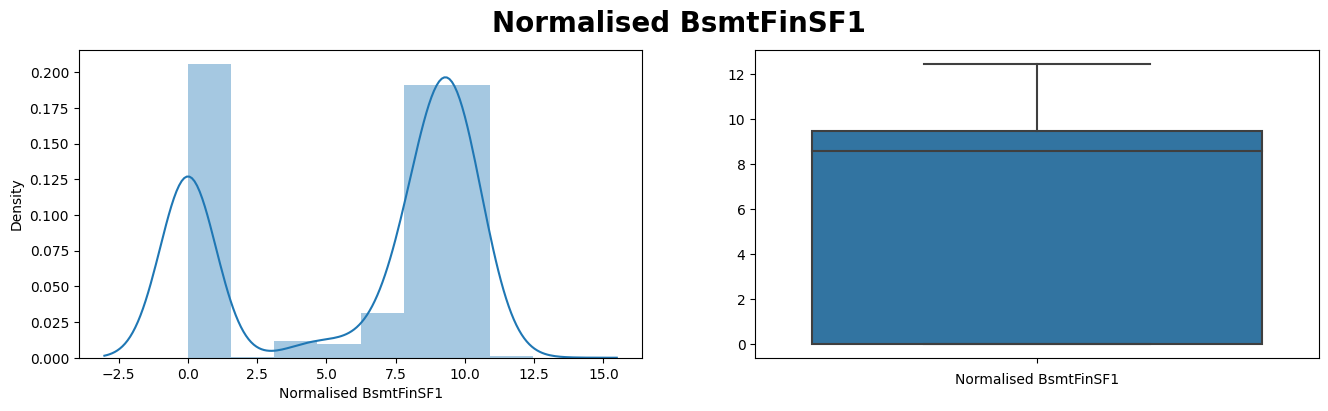

GrLivArea unique Sample Number 211
Skewness: 1.2431815233986787 
kurtosis: 4.29112930911154


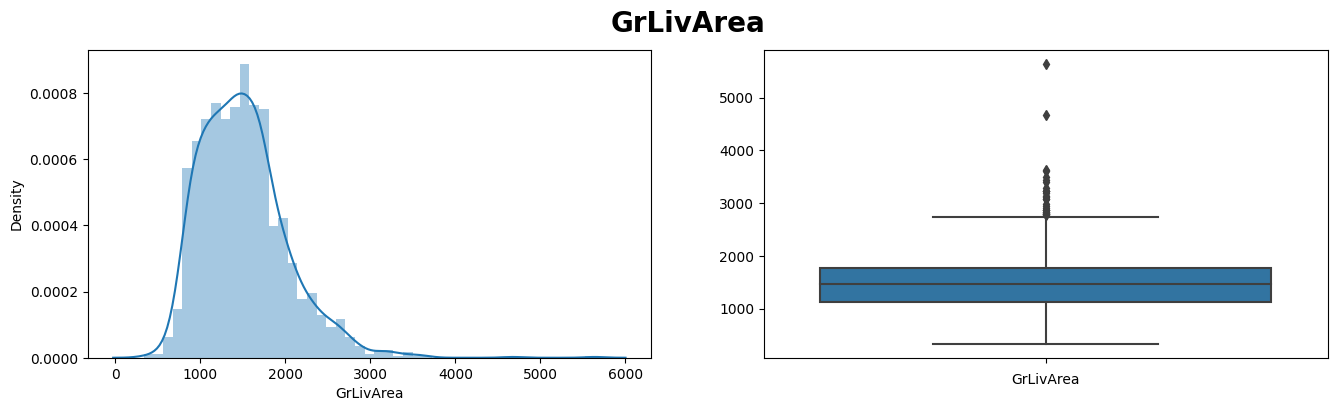

Skewness: -0.04275434863130961 
kurtosis: 0.20116348013924634


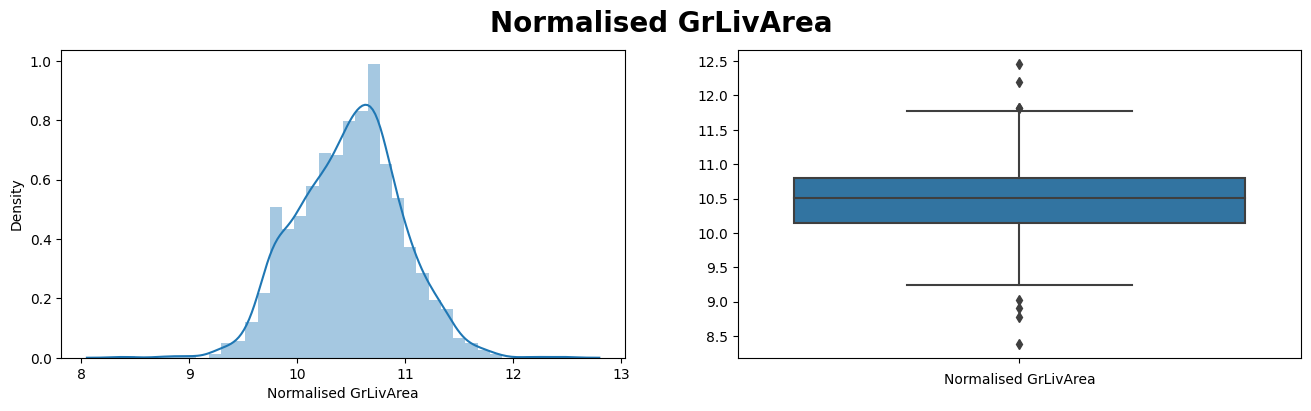

Age unique Sample Number 211
Skewness: 0.6014683647762564 
kurtosis: -0.4419888106565897


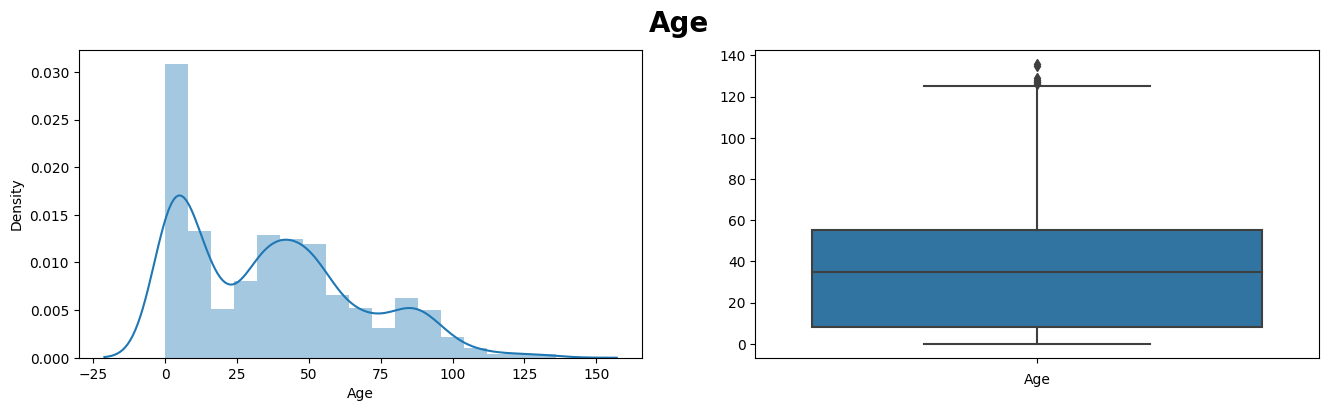

BsmtUnfSF unique Sample Number 211
Skewness: 0.9208351360732602 
kurtosis: 0.4766753509083683


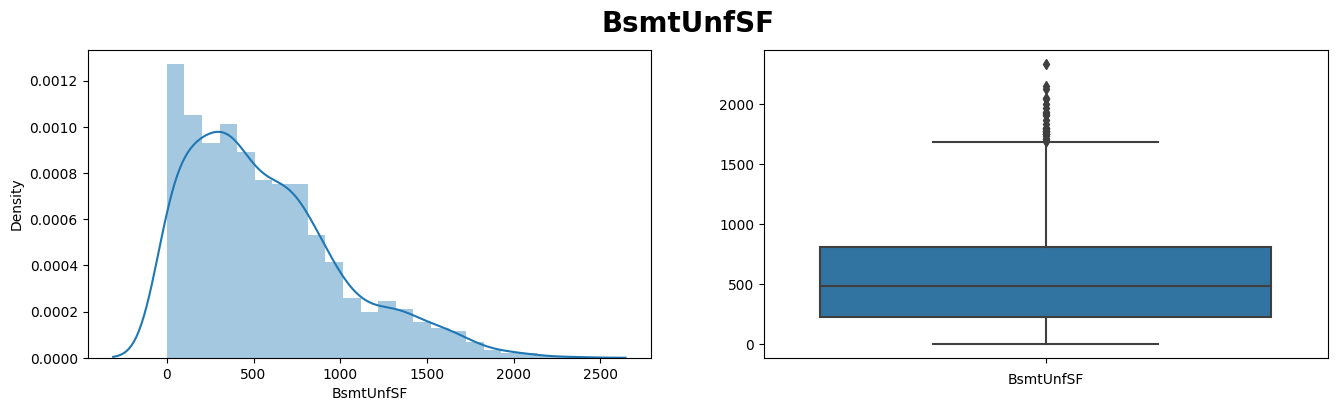

BsmtFinSF2 unique Sample Number 211
Skewness: 4.236882065322116 
kurtosis: 19.93157608803141


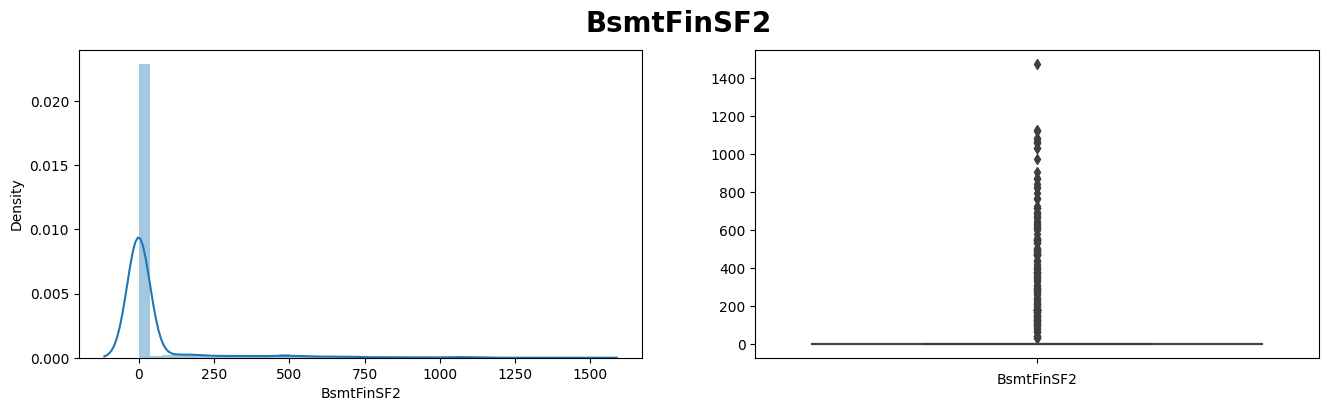

Skewness: 2.510070914461704 
kurtosis: 4.482400851716372


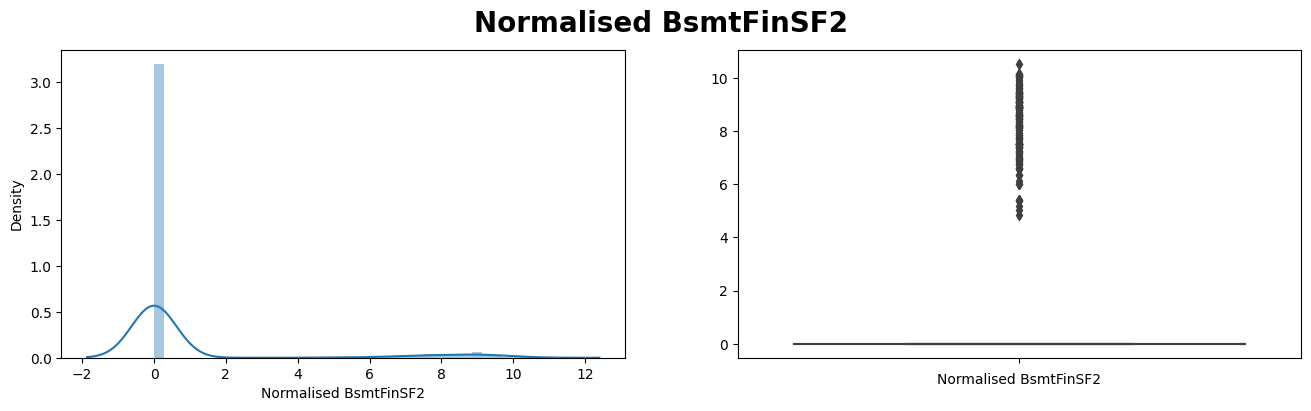

OpenPorchSF unique Sample Number 211
Skewness: 2.3848658031268943 
kurtosis: 8.656151861902877


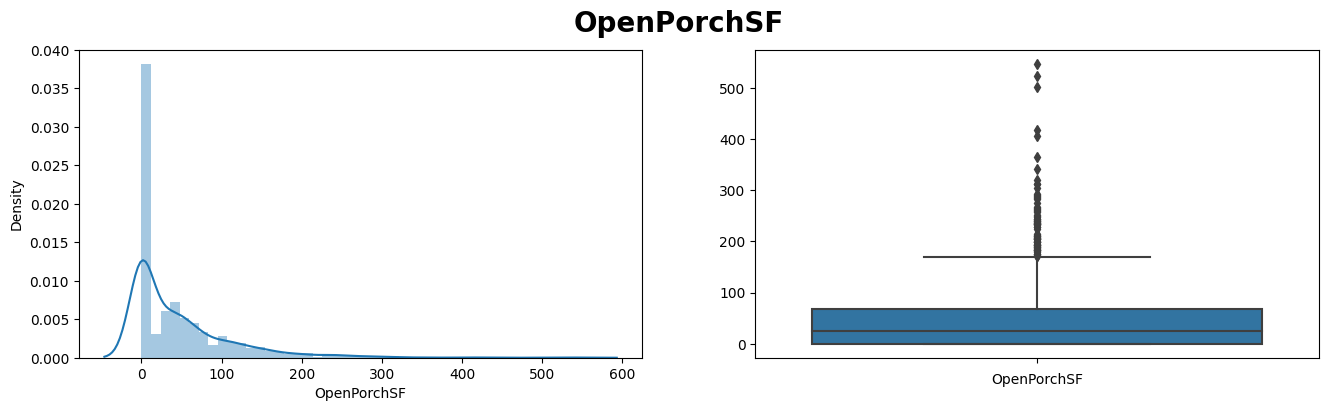

Skewness: -0.018133118712894632 
kurtosis: -1.7769022212291312


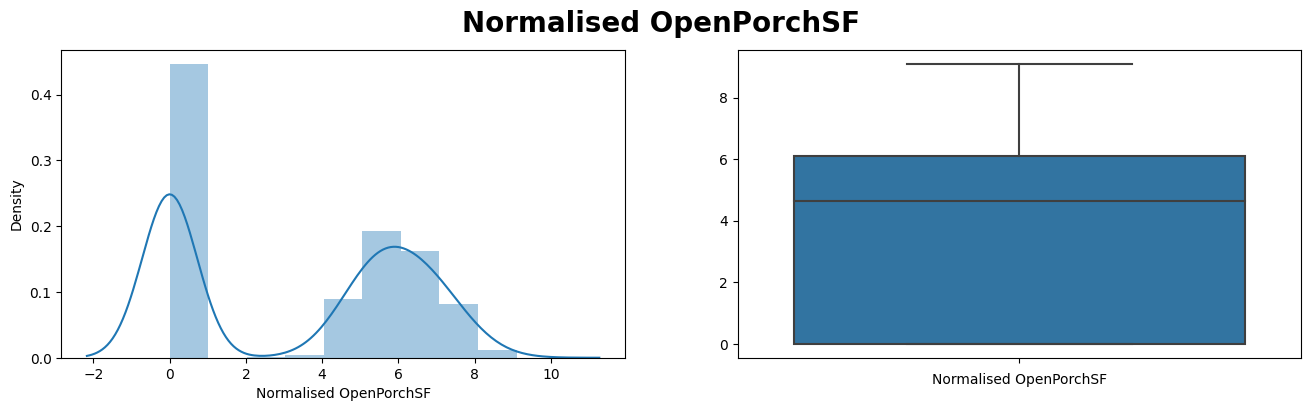

LowQualFinSF unique Sample Number 211
Skewness: 8.976160609557839 
kurtosis: 82.57329179893821


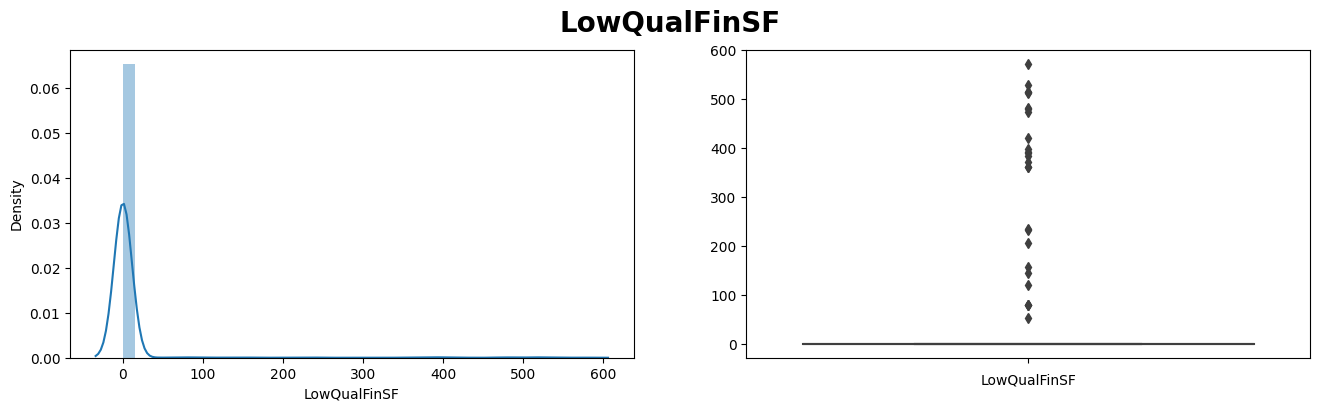

Skewness: 7.430711759903256 
kurtosis: 53.946643676333224


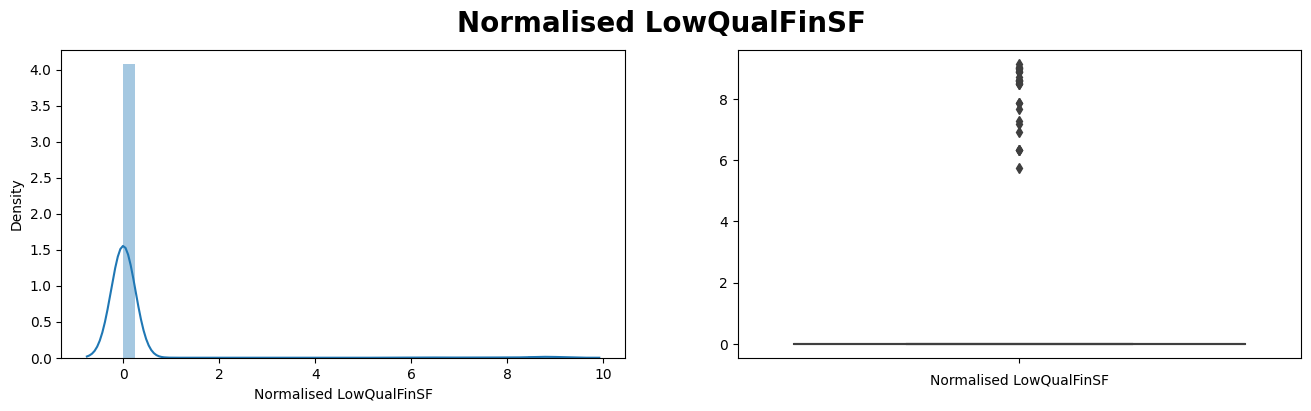

EnclosedPorch unique Sample Number 211
Skewness: 3.0912746389496024 
kurtosis: 10.45459069364111


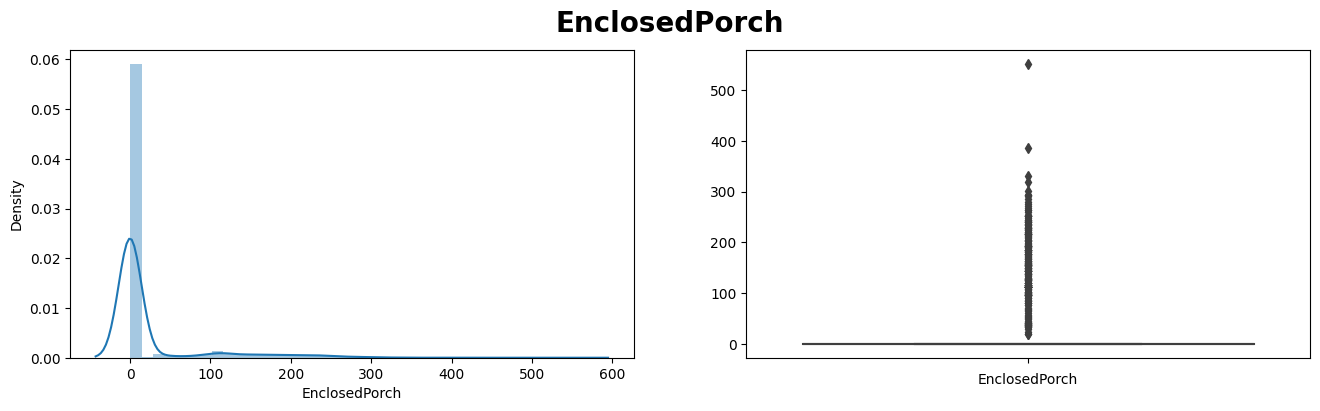

Skewness: 2.1079073133222526 
kurtosis: 2.549891590145949


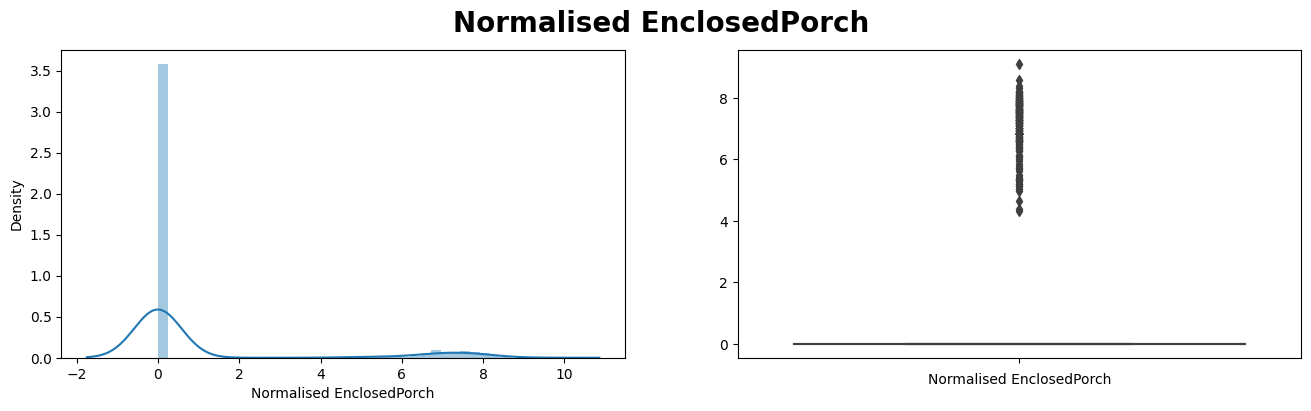

LotArea unique Sample Number 211
Skewness: 12.248414294914621 
kurtosis: 203.77620335049843


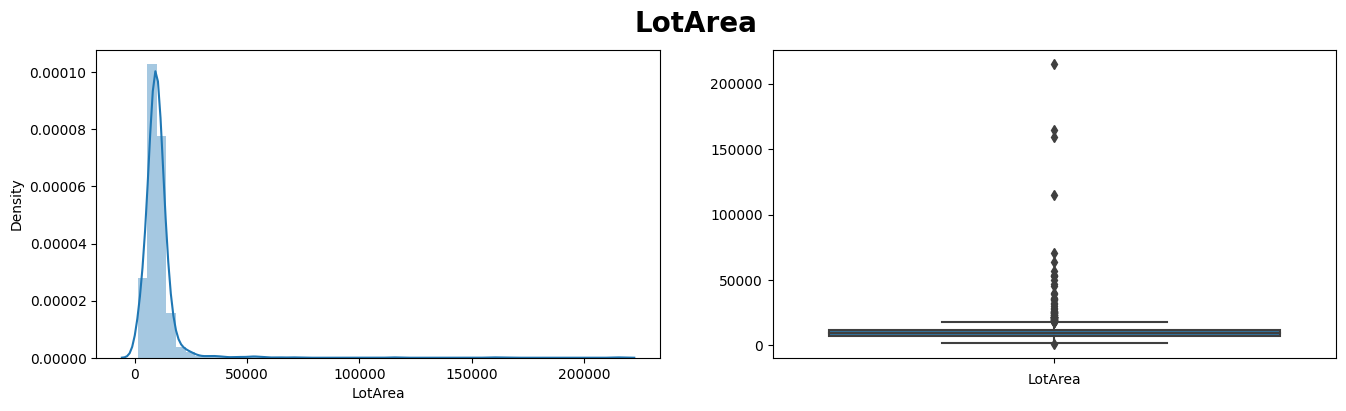

Skewness: -0.14134712589686857 
kurtosis: 4.7592926538992515


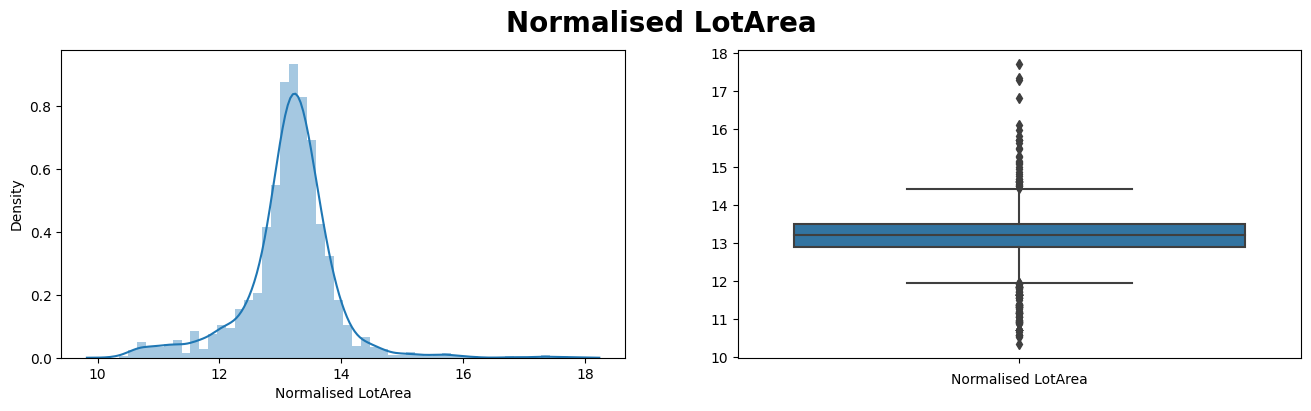

MasVnrArea unique Sample Number 211
Skewness: 2.630931228129068 
kurtosis: 9.878023873260542


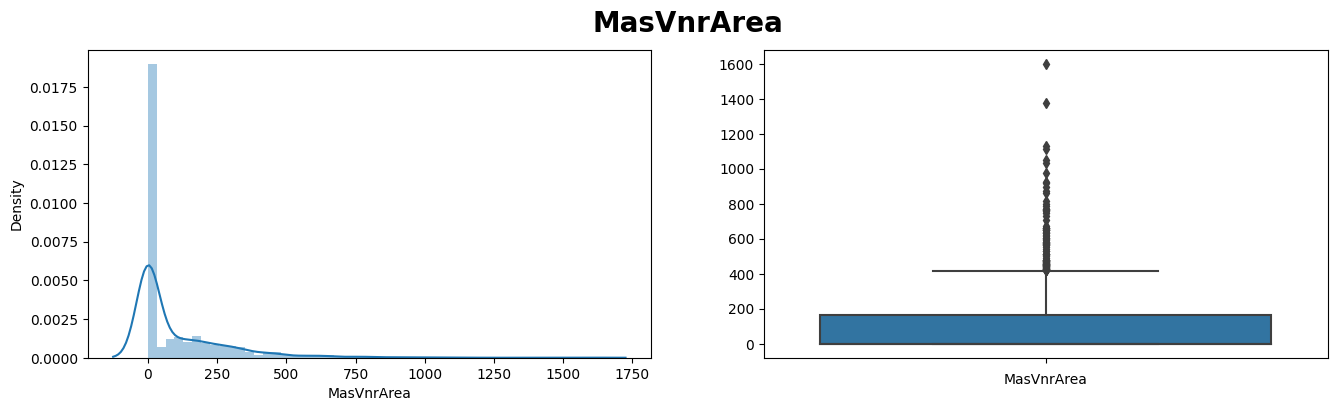

Skewness: 0.49308172885831014 
kurtosis: -1.631737069279672


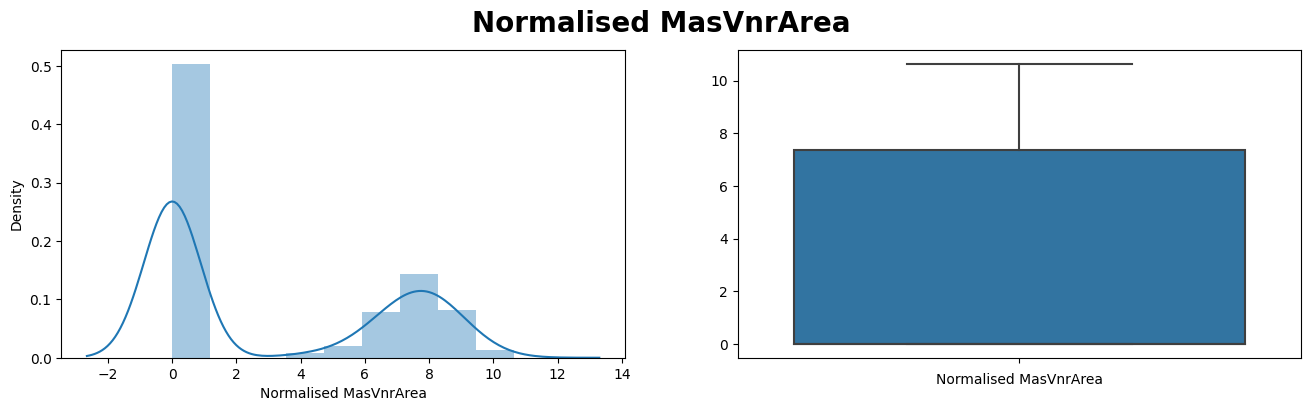

LotFrontage unique Sample Number 211
Skewness: 2.1111421302485303 
kurtosis: 16.220662176110967


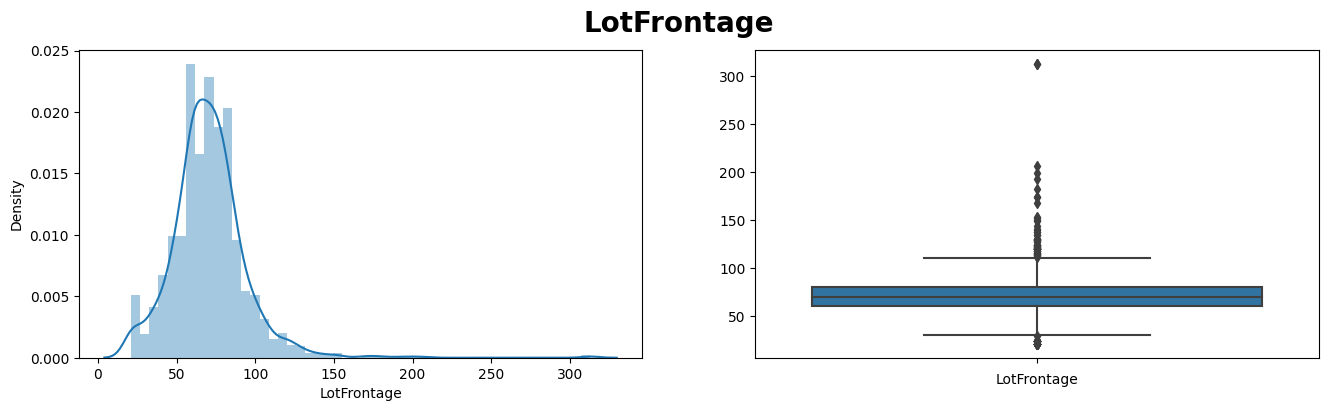

Skewness: -0.6991430724214708 
kurtosis: 2.389086935876357


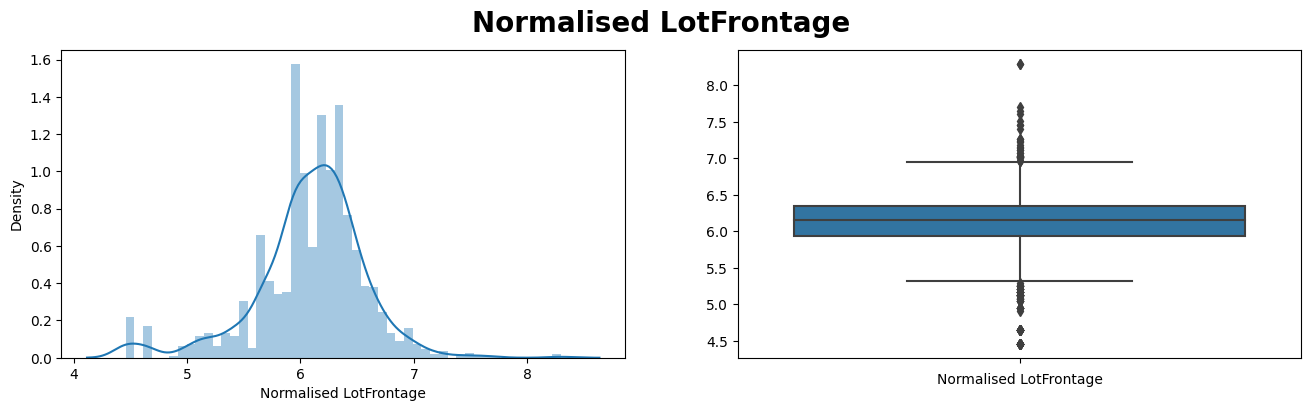

SalePrice unique Sample Number 211
Skewness: 1.5625012435969323 
kurtosis: 3.8858439759444114


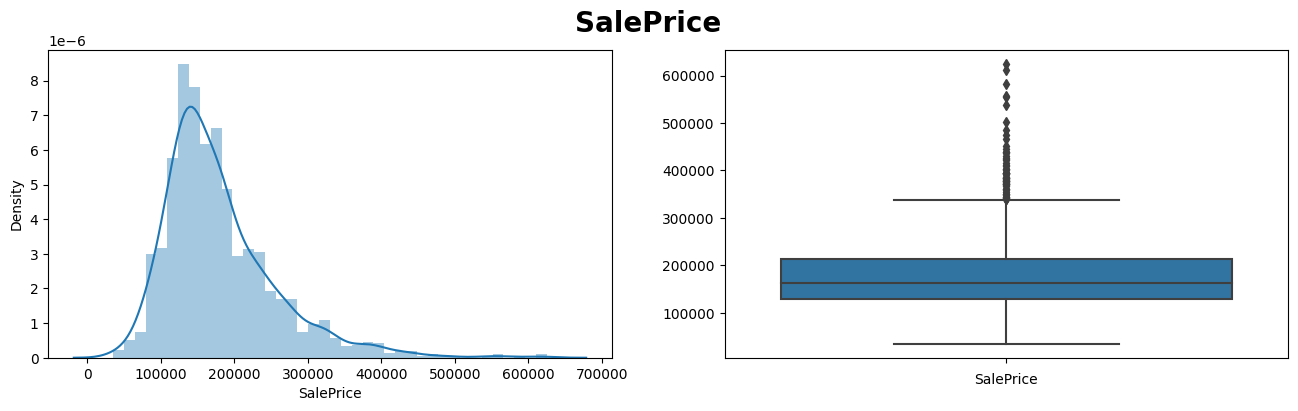

Skewness: 0.0652239886557998 
kurtosis: 0.6620098136577641


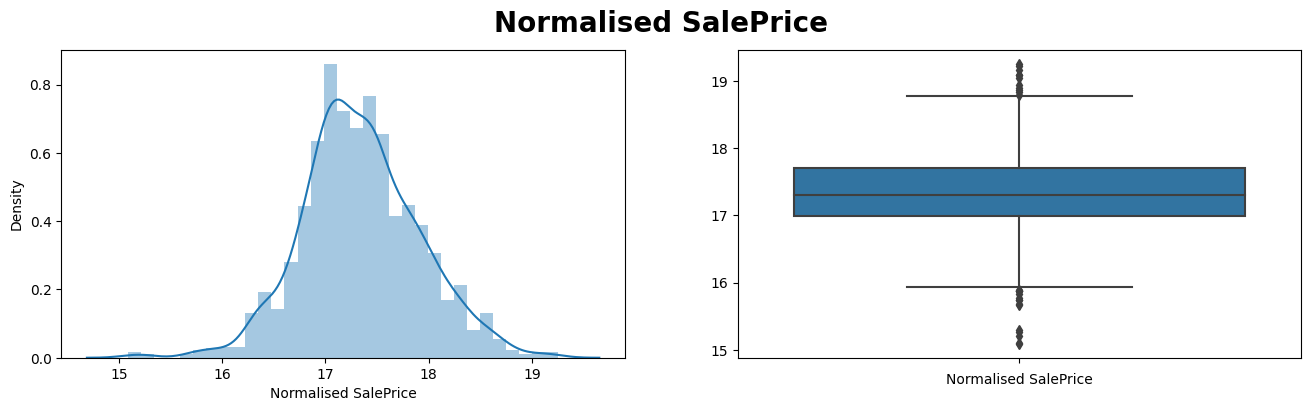

PoolArea unique Sample Number 211
Skewness: 16.034273032097026 
kurtosis: 261.86479577733786


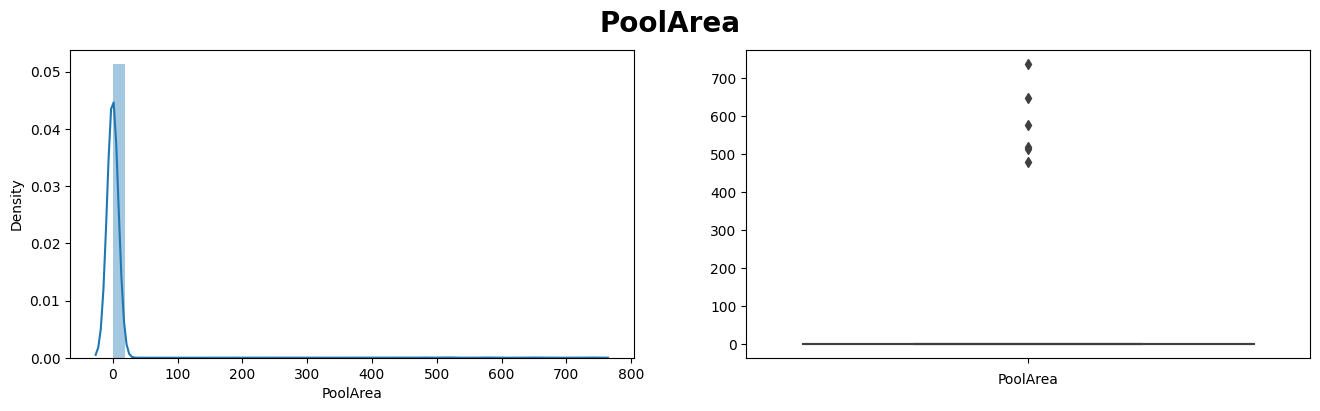

Skewness: 15.472543622867995 
kurtosis: 237.86461531049147


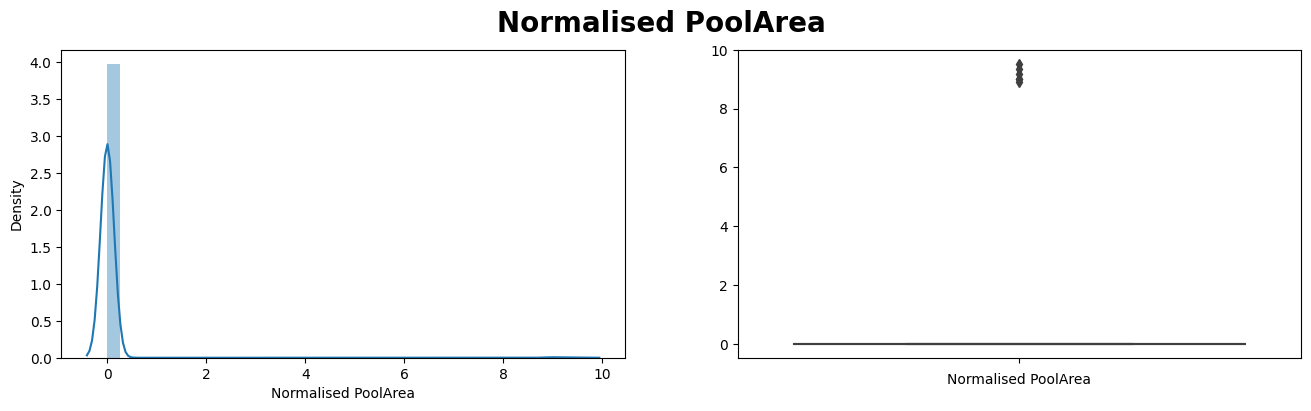

TotalBsmtSF unique Sample Number 211
Skewness: 1.536292398646614 
kurtosis: 13.763391454459672


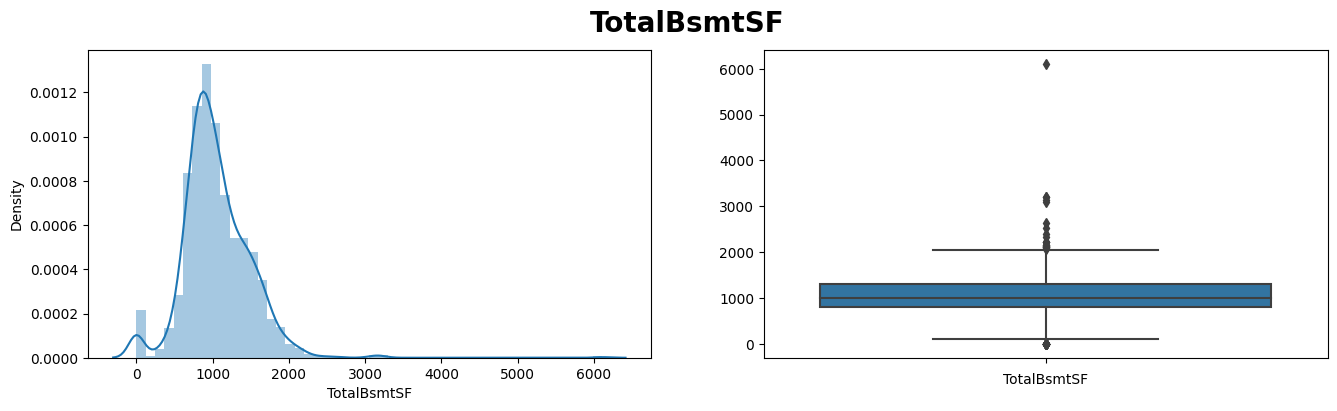

Skewness: -5.148648224492053 
kurtosis: 27.60971020299497


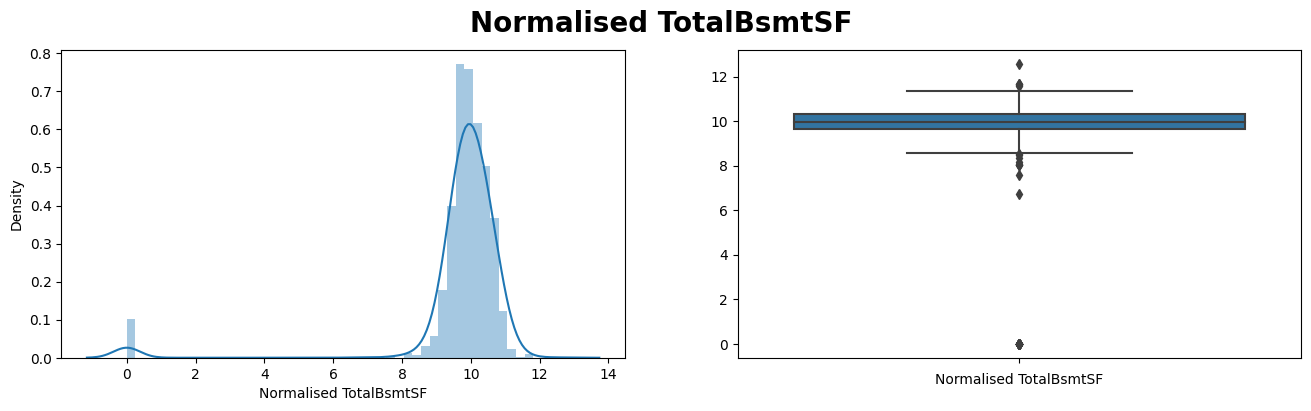

GarageArea unique Sample Number 211
Skewness: 0.184188303967607 
kurtosis: 0.9245602089299516


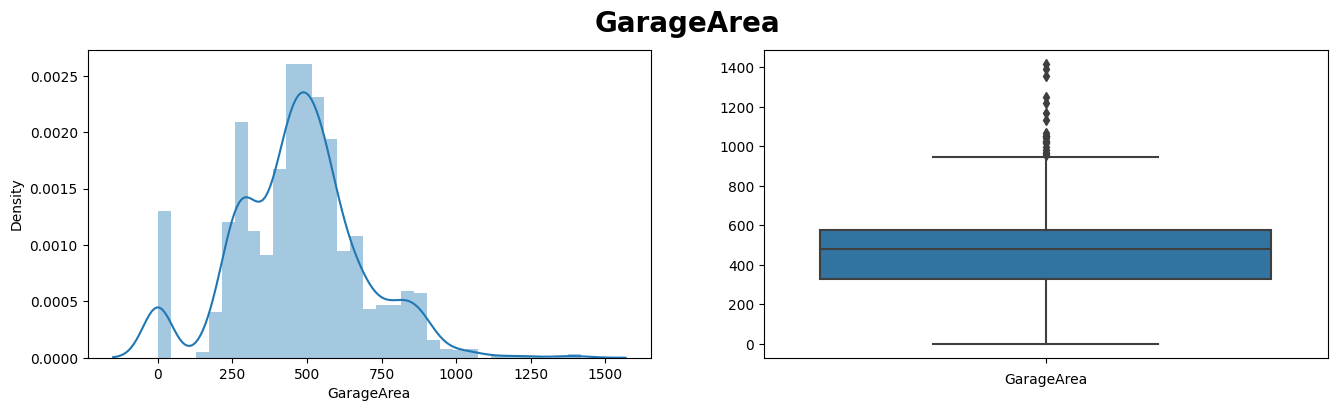

WoodDeckSF unique Sample Number 211
Skewness: 1.547339594666603 
kurtosis: 3.0289476566449554


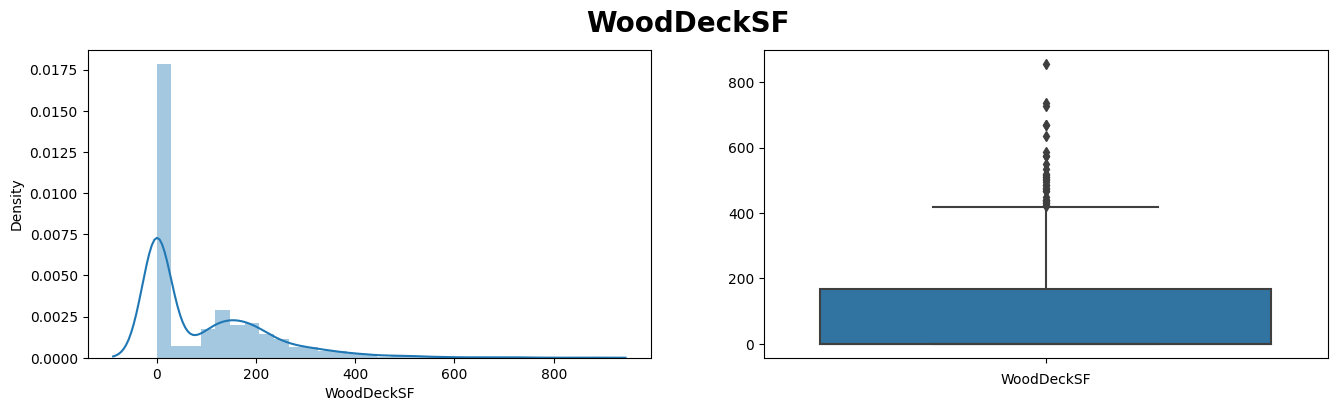

Skewness: 0.15298238066970696 
kurtosis: -1.8979004455755408


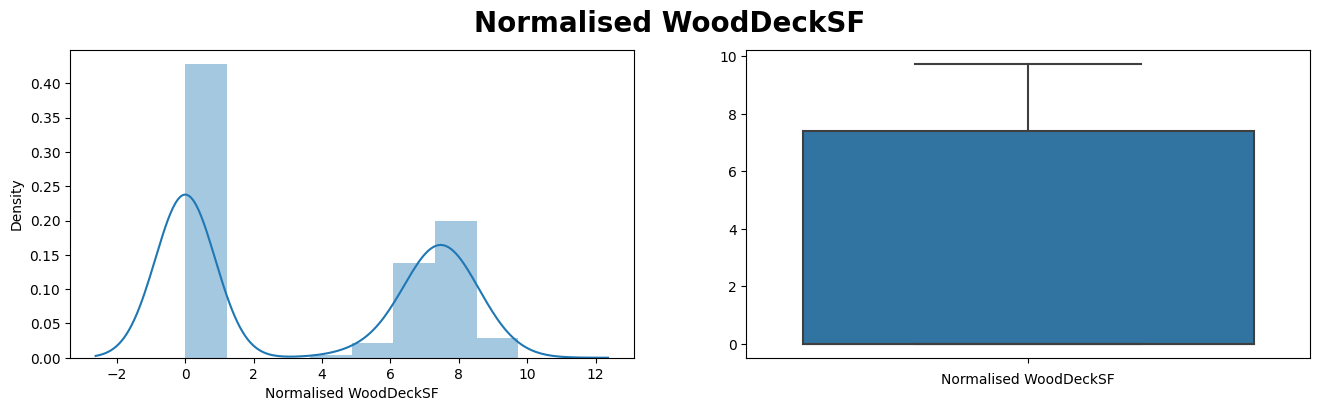

In [ ]:
#  Remove rows with outlier values for the dependent variable

display(Javascript('''google.colab.output.setIframeHeight(0, true, {maxHeight: 10000})'''))
rmIdx = removeOutlier_row(df, "SalePrice", lowT=0.1, upT=0.95)
df2.drop(rmIdx, axis=0, inplace=True)

for c in num_cols:
  if df2[c].nunique()>5:
    print(c, "unique Sample Number", len(set(data)))
    sk = df2[c].skew()
    ku = df2[c].kurt()
    print("Skewness:", sk, "\nkurtosis:", ku)
    dist_investigate(df2[c], c)

    # if not
    if abs(sk)>1 or abs(ku)>1:
      df2[c]= np.log2(df2[c]+1)
      sk = df2[c].skew()
      ku = df2[c].kurt()
      print("Skewness:", sk, "\nkurtosis:", ku)
      dist_investigate(df2[c],f"Normalised {c}")

In [ ]:
print(df2.shape)

(1449, 232)


In [ ]:
# Identify low variant columns:
variantDf = df2.nunique().sort_values()
print(variantDf)

LotConfig_Inside            2
MasVnrType_Stone            2
LotShape_IR2                2
LotShape_IR3                2
LotShape_Reg                2
Foundation_CBlock           2
Foundation_PConc            2
Foundation_Slab             2
Foundation_Stone            2
Foundation_Wood             2
HouseStyle_1.5Unf           2
HouseStyle_1Story           2
HouseStyle_2.5Fin           2
HouseStyle_2.5Unf           2
HouseStyle_2Story           2
HouseStyle_SFoyer           2
HouseStyle_SLvl             2
SaleCondition_AdjLand       2
SaleCondition_Alloca        2
SaleCondition_Family        2
SaleCondition_Normal        2
SaleCondition_Partial       2
Exterior2nd_AsphShn         2
Exterior2nd_Brk Cmn         2
Exterior2nd_BrkFace         2
Exterior2nd_CBlock          2
MasVnrType_None             2
Exterior2nd_CmentBd         2
MasVnrType_BrkFace          2
SaleType_Oth                2
MoSold_Feb                  2
MoSold_Jan                  2
MoSold_July                 2
MoSold_Jun

### **Categorical variables**: We would get general idea about all the categorical variables by using pie chart combined with bar chart

In [ ]:
def countPlots(data, target, title):

  porcent = data[target].value_counts(normalize=True)*100
  labels = data[target].unique()

  plt.figure(figsize=(16,4))
  plt.subplot(1,2,1)
  sns.countplot(x=target, data=data, dodge=True, palette="mako_r")
  plt.tick_params(axis='x', rotation=90)

  plt.subplot(1,2,2)
  patches, texts = plt.pie(porcent, radius=1.5)
  labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(porcent.index, porcent)]

  sort_legend = True
  if sort_legend:
      patches, labels, dummy =  zip(*sorted(zip(patches, labels, porcent),
                                            key=lambda x: x[2],
                                            reverse=True))

  plt.legend(patches, labels, loc='best', bbox_to_anchor=(-0.1, 1.),
            fontsize=8)

  plt.suptitle(title, fontsize=20, fontweight="bold")
  plt.show()


In [ ]:
display(Javascript('''google.colab.output.setIframeHeight(0, true, {maxHeight: 10000})'''))

for c in cat_cols:
  print(c)
  countPlots(df, c, c)

1. Most buildings are 1st and 2nd Story houses
2. 80% of them are residential low houses
3. more than 99% of them have paved road to street and about 95% of them has no access to alley
4. more than 99% of them don't have pool
5. more that 12% of them have remodeling in 1950
6. sales had about 50% reduction in 2010 in comparison with previous years
7. bout 95% of them has no bathroom in basement and less than 2% of them has 2 half bathroom in basement.
8. more thhan 95% of them have above ground kitchen
9. more than 50% of the houses have Garage that can accomodate two cars
10. nd more than 55% of them have more than 3 bedrooms.
11. they rarely haveless than 3 or more than 10 rooms above the dround.


# the over all study of these variables indictaes that our data is lack diversity in some sub groups with even no sample in some of the subgroups of some variables that can lead to lack of generalizability and robustness in our models


**Segmented Univariate Analysis**


The only interesting relationship in segmented categorical values is the the effect of different categorical variables on overall quality "OverallQual" or overall condition "OverallCond".

In [ ]:
def segment_barplot(data, x, col, title):
  from itertools import product
  plt.figure(figsize=(16,3))

  ax = sns.countplot(x=x, hue=col, data=data)

  plt.suptitle(title, fontsize=20, fontweight="bold")
  plt.tick_params(axis='x', rotation=90)
  plt.ylabel("Percentage")
  plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
  plt.show()

In [ ]:
display(Javascript('''google.colab.output.setIframeHeight(0, true, {maxHeight: 10000})'''))
seg_cat = copy(cat_cols)
seg_cat.remove("OverallCond")
for c in seg_cat:
  segment_barplot(df, c, "OverallCond", f"{c} Vs. Over all Condition")

Foundation, The quality of the materials on the exterion total number of rooms above ground and kitchen quality seem to be having maximum impact on overall condition of th ehouse.

In [ ]:
display(Javascript('''google.colab.output.setIframeHeight(0, true, {maxHeight: 10000})'''))

seg_cat = copy(cat_cols)
seg_cat.remove("OverallQual")
for c in seg_cat:
  segment_barplot(df, c, "OverallQual", f"{c} Vs. Over all Quality")

Exterior quality and condition, neighbourhood and number of rooms above ground seem to have most impact on the over all house quality.

### **Segmented Univariate analysis for a categorical variable against continues variable**:

In [ ]:
def segment_boxPlot(data, x, y, title):

  plt.figure(figsize=(16,4))
  sns.boxplot(x=x, y=y, data=data)
  plt.suptitle(title, fontsize=20, fontweight="bold")
  plt.tick_params(axis='x', rotation=90)
  plt.show()

  levels = list(data[x].unique())

  if len(levels)>=3:

    normality_list = []
    z_list = []

    for i in range(len(levels)):
      z = data.loc[data[x]==levels[i], y]
      if len(z) > 3:
        z_list.append(z)
        normality_list.append(stats.shapiro(z).pvalue)

    if len(z_list)>=2:
      if any(t < 0.05 for t in normality_list):
        print(f"Data is not normaly distributed. So we use Kruskal-Wallis H-test to test equality between categories {', '.join(map(str, levels))}.")
        sigVal = stats.kruskal(*z_list).pvalue

        if sigVal < 0.05:
          print(f"P-value = {sigVal} and is statistically significant. So we can reject the Null hypothesis and\nconclude that the mean for {', '.join(map(str, levels))} samples are not equal.")
        else:
          print(f"P-value = {sigVal} and is not statistically significant. So we can not reject the Null hypothesis.\nMeaning that there is a chance the mean of two of {', '.join(map(str, levels))} samples are equal.")

      else:
        print("Data is normaly distributed and we use ANOVA to test equality between two categories")
        print(len(z_list))
        sigVal = stats.f_oneway(*z_list).pvalue

        if sigVal < 0.05:
          print(f"P-value = {sigVal} and is statistically significant. So we can reject the Null hypothesis and\nconclude that the mean for {', '.join(map(str, levels))} samples are not equal.")
        else:
          print(f"P-value = {sigVal} and is not statistically significant. So we can not reject the Null hypothesis.\nMeaning that there is a chance the mean the mean of two of {', '.join(map(str, levels))} samples are equal.")
    else:
      pass
  elif len(levels)==2:
    y1 = data.loc[data[x]==levels[0], y]
    y2 = data.loc[data[x]==levels[1], y]

    if min(len(y1), len(y2)) >= 3:

      normality_g1 = stats.shapiro(y1).pvalue
      normality_g2 = stats.shapiro(y2).pvalue

      if normality_g1 < 0.05 or normality_g2 < 0.05:
        print(f"Data is not normaly distributed. So we use Kolmogorov-Smirnov test to test equality between two categories {levels[0]} and {levels[1]}.")
        sigVal = stats.ks_2samp(y1, y2, method="exact")[1]

        if sigVal < 0.05:
          print(f"P-value = {sigVal} and is statistically significant. So we can reject the Null hypothesis and\nconclude that the mean for {levels[0]} samples is not equal to the mean for {levels[1]} sample.")
        else:
          print(f"P-value = {sigVal} and is not statistically significant. So we can not reject the Null hypothesis.\nMeaning that there is a chance the mean for {levels[0]} sample is equal to the mean for {levels[1]} sample.")

      else:
        print("Data is normaly distributed and we use t-test to test equality between two categories")
        sigVal = stats.ttest_ind(y1, y2, equal_var=False).pvalue

        if sigVal < 0.05:
          print(f"P-value = {sigVal} and is statistically significant. So we can reject the Null hypothesis and\nconclude that the mean for {levels[0]} sample is not equal to the mean for {levels[1]} sample.")
        else:
          print(f"P-value = {sigVal} and is not statistically significant. So we can not reject the Null hypothesis.\nMeaning that there is a chance the mean for {levels[0]} sample is equal to the mean for {levels[1]} sample.")
    else:
      pass



In [ ]:
display(Javascript('''google.colab.output.setIframeHeight(0, true, {maxHeight: 10000})'''))

seg_cols = copy(cat_cols)
seg_cols.remove("Utilities")

for c in seg_cols:
  segment_boxPlot(df, c, 'SalePrice', f"SalePrice Vs. {c}")

Mssubclass, Mszonning, neighborhood, house style, condition1 and 2, roof matl, exterior 1 1nd 2, heating, electrical, garage type, sale type,  sale condition, overall condition and quality quality, exterior condition and quality, basement quality and condition, kitchen quality, fireplace quality and garage and pool quality, and total number of rooms above ground seem to have highest impact on the house price.


# **Bivariate Analysis**
## **Bivariate Analysis between Continues Variables**

### **Correlation Matrix**: is a Bivariate Analysis used to measure the closeness between continues variables. When two continues variables are highly corelated (|correlation| >= 0.75) That means those features are dependent to each other. So a change in one of them will cause the change in the other one. Meaning that one feature can be explained by the other one. These variables are considered data driven matrics. When we see very high correlation between two features we can use the ratio of these features instead of actual values.

The highly correalated values will negatively affect multiple regression. But algorithem like LASSO can handle multiple correlation. So we don't need to remove or change those variables for these algorithems.

<IPython.core.display.Javascript object>

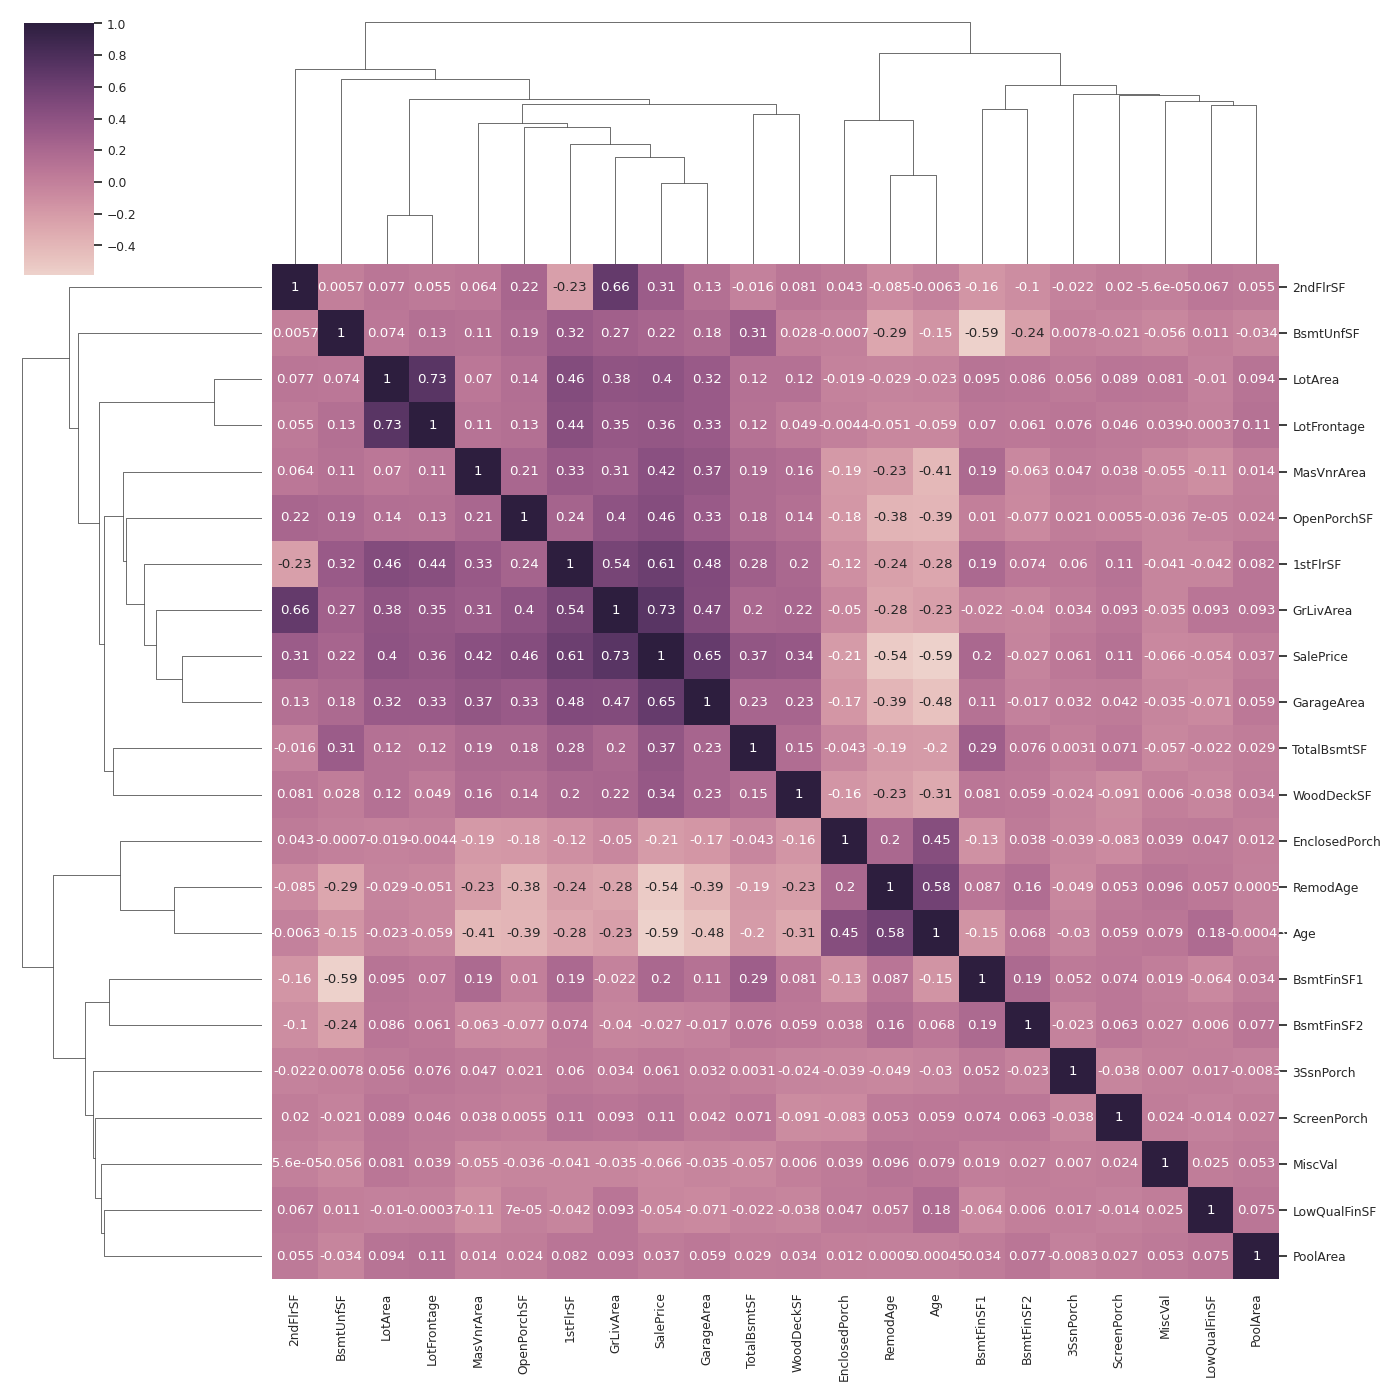

In [ ]:
display(Javascript('''google.colab.output.setIframeHeight(0, true, {maxHeight: 10000})'''))

corrMatrix = df2[num_cols].corr()
sns.set(font_scale=0.8)
sns.clustermap(corrMatrix, annot=True, cmap=sns.cubehelix_palette(as_cmap=True), figsize=(14, 14))
plt.show()

There is no two features with very high linear correlation even with Sale Price. The highest linear correlation is between Sale Price and above ground living area that is still bellow 75%. This is an indecation that may be linear model does not perform well on these data points and we better to consider non linear relationship.

## **Bivariate Analysis for two categorical variables**


1.   **Our outcome variable Against All the Categorical Variables we have**:

In [ ]:
def bivar_barplot(data, x, col, title):
  plt.figure(figsize=(16,4))
  newdf = data[[x, col]].groupby([x, col], as_index=False).value_counts()
  newdf[f'proportion {col}'] = newdf[["count", col]].groupby([col]).transform(lambda x: x/x.sum())

  newdf[f'proportion {col}'] = newdf[f'proportion {col}'].round(2)

  ax = sns.barplot(x=x, y=f'proportion {col}', hue=col, data=newdf, estimator=np.median, linewidth=0)


  plt.suptitle(title, fontsize=20, fontweight="bold")
  plt.tick_params(axis='x', rotation=90)
  plt.legend(loc='upper right',fontsize=10)
  plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
  plt.show()

In [ ]:
display(Javascript('''google.colab.output.setIframeHeight(0, true, {maxHeight: 10000})'''))

bivar_cat = copy(cat_cols)
bivar_cat.remove('OverallCond')

for c in bivar_cat:
    bivar_barplot(df, c, 'OverallCond', f"Over All Condition Vs. {c}")

Mssubclass, Mszonning, neighborhood, land slope, house style, roof style, exterior1 and 2, foundation, garage type, fence central heat and electrical, month of sold, overall quality and exterior quality and condition, and basement, condition, quality and exposure, combined with kitchen, garage, fireplace quality and number of bedrooms above ground have highest impacts on house condition.


In [ ]:
display(Javascript('''google.colab.output.setIframeHeight(0, true, {maxHeight: 10000})'''))

bivar_cat = copy(cat_cols)
bivar_cat.remove('OverallQual')

for c in bivar_cat:
    bivar_barplot(df, c, 'OverallQual', f"Over All Quality Vs. {c}")

Similarly Mssubclass, Mszonning, lot shape, land contour, land slope, neighborhood, house style, roof style, exterior1 and 2, MasVnrType, foundation, central air, garage type, fence central heat and electrical, month of sold, exterior quality and condition, and basement, condition, quality and exposure, combined with kitchen, garage, fireplace quality and number of bedrooms above ground have highest impacts on house overall quality.


## **Bivariate analysis between categorical variables and continues variables**

In [ ]:
def bivariate_box_barPlot(data, x, y, col, title):
  plt.figure(figsize=(16,6))
  plt.subplot(211)
  a = plt.gca()
  sns.boxplot(x=x, y=y, hue=col, data=data, linewidth=0)
  plt.tick_params(axis='x', rotation=90)
  plt.legend(bbox_to_anchor=(1, 1), loc='upper left',fontsize=10)
  xax = a.axes.get_xaxis()
  xax = xax.set_visible(False)

  plt.subplot(212)
  sns.barplot(x=x, y=y, hue=col, data=data, estimator=np.median, linewidth=0)
  plt.suptitle(title, fontsize=20, fontweight="bold")
  plt.tick_params(axis='x', rotation=90)
  plt.legend().set_visible(False)
  plt.show()

In [ ]:
display(Javascript('''google.colab.output.setIframeHeight(0, true, {maxHeight: 500000})'''))

bivar_cat = copy(cat_cols)
bivar_cat.remove('OverallCond')

for i in bivar_cat:
    bivariate_box_barPlot(df, i, 'SalePrice', 'OverallCond', f"{i} Vs. Over All Condition")

1. 2.5 story all and 1.5 fin sub classes with excellent condition has the highest price in comparison with other categories.
2. Houses with paved road to street and excellent condition have the highest sales value. Same way houses with no access to Alley and excellent condition are having higher price that others.
3. 1.5 and 2.5 finished houses with excellent quality have highest price.
4. Houses with very excellent quality and excellent or average condition having the highest price


In [ ]:
display(Javascript('''google.colab.output.setIframeHeight(0, true, {maxHeight: 500000})'''))

bivar_cat = copy(cat_cols)
bivar_cat.remove('OverallQual')

for i in bivar_cat:
    bivariate_box_barPlot(df, i, 'SalePrice', 'OverallQual', f"{i} Vs. Over All Quality")


## **Visualising the Data**

<IPython.core.display.Javascript object>

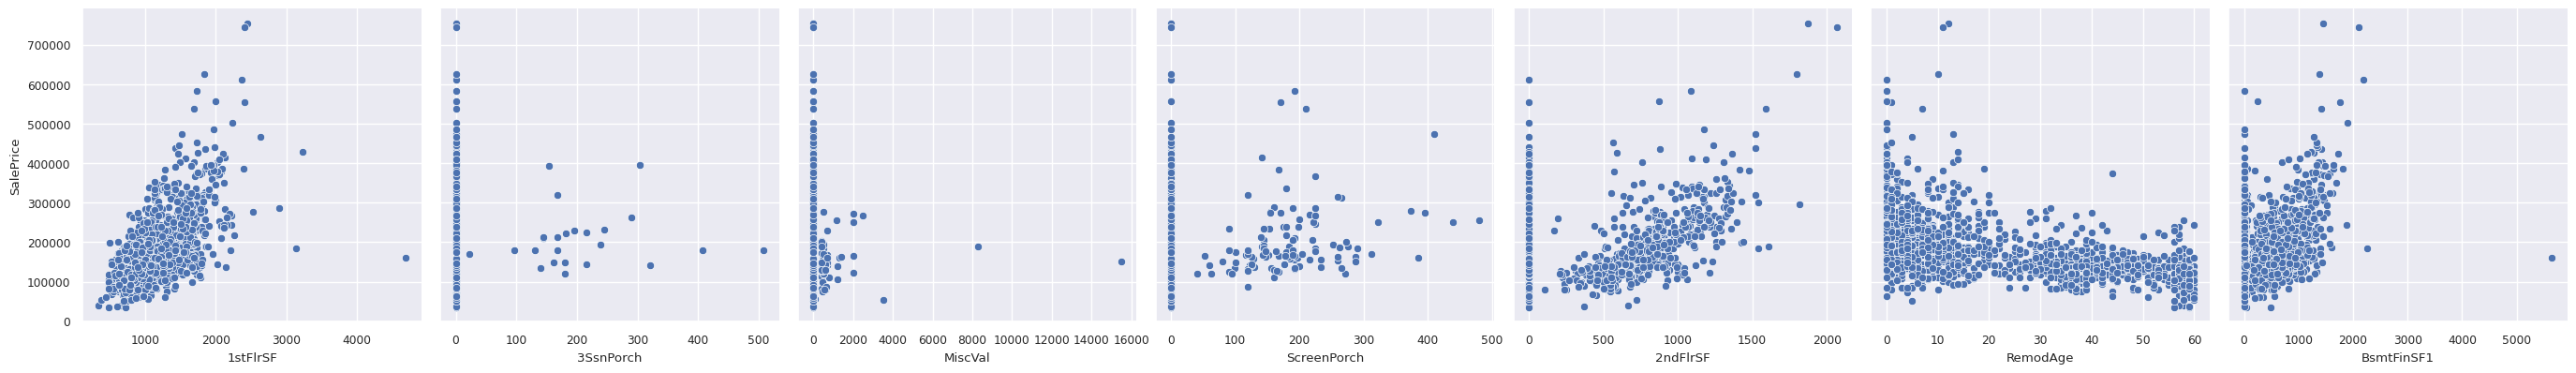

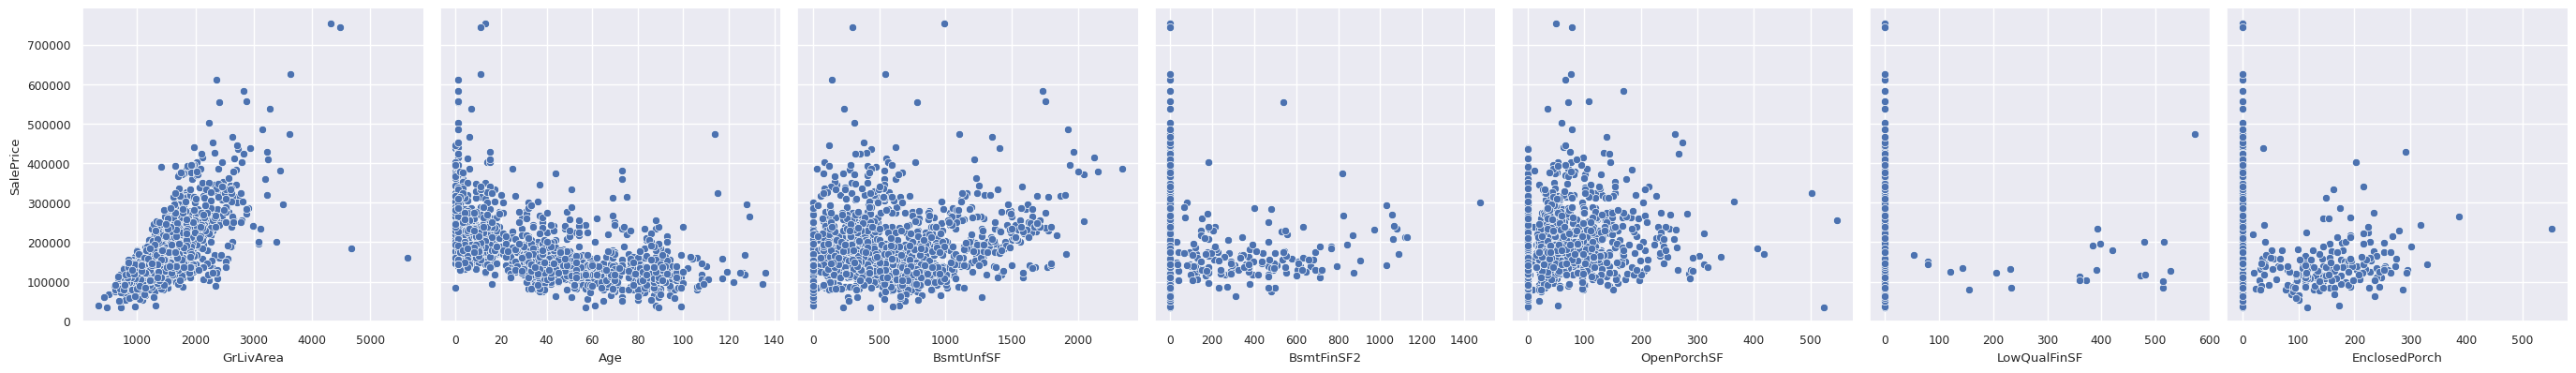

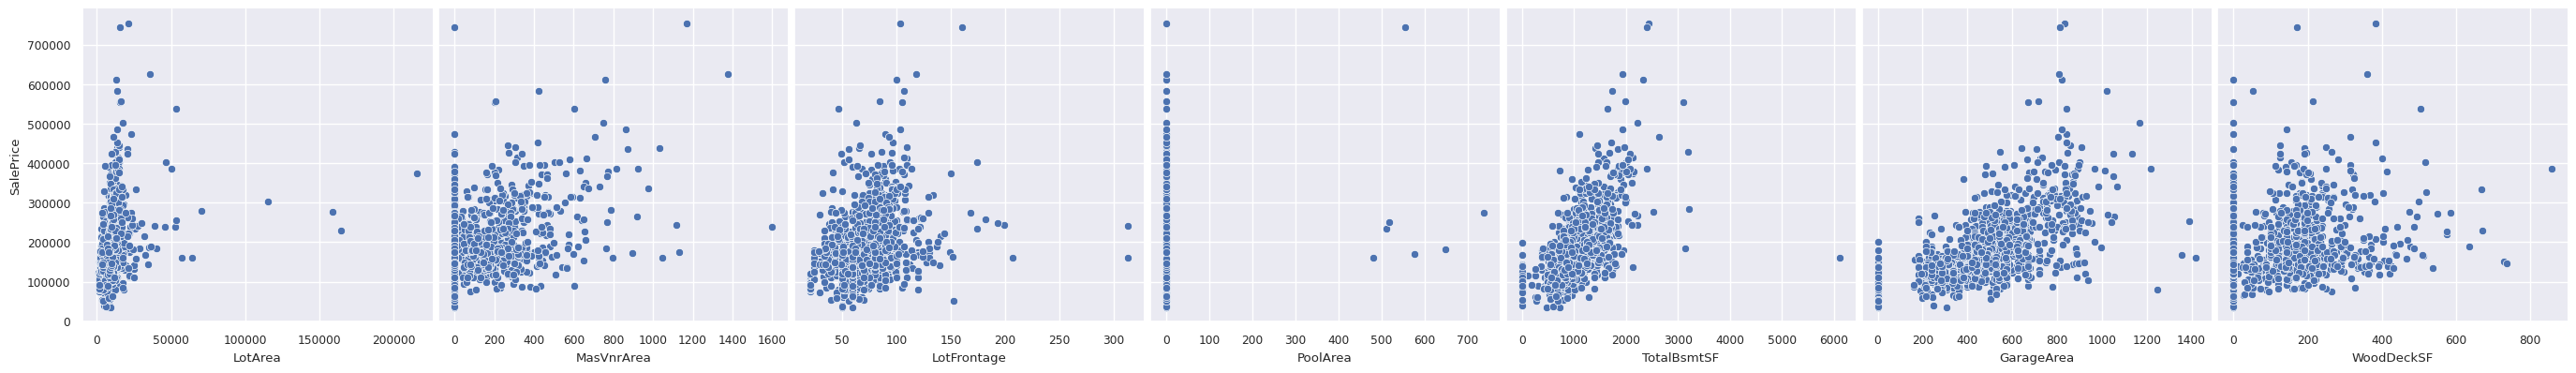

In [ ]:
display(Javascript('''google.colab.output.setIframeHeight(0, true, {maxHeight: 500000})'''))

numCols = copy(num_cols)
numCols.remove('SalePrice')
sns.pairplot(df, x_vars=numCols[:int(len(numCols)/3)], y_vars=yCol, size=4, aspect=1, kind='scatter')
plt.show()

sns.pairplot(df, x_vars=numCols[int(len(numCols)/3):int(2*len(numCols)/3)], y_vars=yCol, size=4, aspect=1, kind='scatter')
plt.show()

sns.pairplot(df, x_vars=numCols[int(2*len(numCols)/3):], y_vars=yCol, size=4, aspect=1, kind='scatter')
plt.show()


There are slight ,inear relationship between sale price and these independent variables:
total basment sf, 1st floor sf, 2nd floor sf, above ground square feet, Garage area.

## **Splitting the Data into Training and Testing Sets**

In [ ]:
df_train, df_test = train_test_split(df2, train_size = 0.8, test_size = 0.2, random_state = 100)

## **Scaling Data**

In [ ]:
# For modeling we can remove year columns
yearCols = ['YrSold', 'YearBuilt', "YearRemodAdd"]
x_cols = list(set(xCols)-set(yearCols))
x_numCols = list(set(ordinal_cols+interval_cols+numCols)-set(yearCols))

In [ ]:
scaler = StandardScaler()
df_train[x_numCols] = scaler.fit_transform(df_train[x_numCols])
df_test[x_numCols] = scaler.transform(df_test[x_numCols])

In [ ]:
df_train.describe(include="all")

LotFrontage       LotArea   OverallQual   OverallCond    YearBuilt  \
count  1.159000e+03  1.159000e+03  1.159000e+03  1.159000e+03  1159.000000   
mean  -1.224598e-15 -2.763775e-15 -1.821954e-16  3.586432e-16  1971.163934   
std    1.000432e+00  1.000432e+00  1.000432e+00  1.000432e+00    30.335500   
min   -3.393541e+00 -3.754395e+00 -3.723852e+00 -3.210232e+00  1880.000000   
25%   -3.666236e-01 -3.511191e-01 -8.002655e-01 -5.193022e-01  1953.500000   
50%    1.412364e-01  9.490939e-02 -6.936895e-02 -5.193022e-01  1973.000000   
75%    5.573443e-01  4.827040e-01  6.615276e-01  3.776744e-01  2000.500000   
max    4.626583e+00  6.125565e+00  2.854217e+00  3.068604e+00  2010.000000   

       YearRemodAdd    MasVnrArea     ExterQual     ExterCond      BsmtQual  \
count   1159.000000  1.159000e+03  1.159000e+03  1.159000e+03  1.159000e+03   
mean    1984.867127  1.149498e-17 -1.149498e-16 -4.291457e-17  1.716583e-16   
std       20.689863  1.000432e+00  1.000432e+00  1.000432e+00  1.000432e+00   
min     1950.000000 -8.185138e-01 -2.434818e+00 -3.187638e+00 -4.034165e+00   
25%     1966.000000 -8.185138e-01 -6.831396e-01 -2.578423e-01 -5.750302e-01   
50%     1994.000000 -8.185138e-01 -6.831396e-01 -2.578423e-01  5.780147e-01   
75%     2004.000000  1.131062e+00  1.068539e+00 -2.578423e-01  5.780147e-01   
max     2010.000000  1.983969e+00  2.820218e+00  5.601750e+00  1.731060e+00   

           BsmtCond  BsmtExposure  BsmtFinType1    BsmtFinSF1  BsmtFinType2  \
count  1.159000e+03  1.159000e+03  1.159000e+03  1.159000e+03  1.159000e+03   
mean  -2.452261e-16 -1.762563e-17 -1.088191e-16 -3.525126e-17  1.685930e-17   
std    1.000432e+00  1.000432e+00  1.000432e+00  1.000432e+00  1.000432e+00   
min   -5.540719e+00 -1.523663e+00 -1.692849e+00 -1.417171e+00 -1.391428e+00   
25%    1.022452e-01 -5.917764e-01 -1.218818e+00 -1.417171e+00 -2.722990e-01   
50%    1.022452e-01 -5.917764e-01  2.032727e-01  5.788609e-01 -2.722990e-01   
75%    1.022452e-01  3.401106e-01  1.151334e+00  7.795459e-01 -2.722990e-01   
max    1.983233e+00  2.203885e+00  1.151334e+00  1.172422e+00  5.323348e+00   

         BsmtFinSF2     BsmtUnfSF   TotalBsmtSF     HeatingQC      1stFlrSF  \
count  1.159000e+03  1.159000e+03  1.159000e+03  1.159000e+03  1.159000e+03   
mean   3.295226e-17 -4.597990e-17 -7.816583e-17 -1.456030e-17 -6.414196e-16   
std    1.000432e+00  1.000432e+00  1.000432e+00  1.000432e+00  1.000432e+00   
min   -3.480658e-01 -1.299768e+00 -6.130135e+00 -3.285220e+00 -3.822707e+00   
25%   -3.480658e-01 -7.907884e-01 -6.972215e-02 -1.198309e+00 -7.109256e-01   
50%   -3.480658e-01 -2.003715e-01  1.238806e-01  8.886030e-01 -5.306258e-02   
75%   -3.480658e-01  5.483946e-01  3.708072e-01  8.886030e-01  7.341950e-01   
max    3.531226e+00  3.984575e+00  1.186371e+00  8.886030e-01  3.422489e+00   

           2ndFlrSF  LowQualFinSF     GrLivArea  BsmtFullBath  BsmtHalfBath  \
count  1.159000e+03  1.159000e+03  1.159000e+03  1.159000e+03  1.159000e+03   
mean   6.207287e-17  1.226131e-17  1.482469e-15  4.904523e-17  6.130653e-18   
std    1.000432e+00  1.000432e+00  1.000432e+00  1.000432e+00  1.000432e+00   
min   -7.951492e-01 -1.380639e-01 -4.424673e+00 -8.210751e-01 -2.341387e-01   
25%   -7.951492e-01 -1.380639e-01 -7.302767e-01 -8.210751e-01 -2.341387e-01   
50%   -7.951492e-01 -1.380639e-01  6.518797e-02 -8.210751e-01 -2.341387e-01   
75%    8.873510e-01 -1.380639e-01  6.680732e-01  1.101402e+00 -2.341387e-01   
max    3.406479e+00  8.091236e+00  3.597488e+00  4.946355e+00  8.246072e+00   

           FullBath      HalfBath  BedroomAbvGr  KitchenAbvGr   KitchenQual  \
count  1.159000e+03  1.159000e+03  1.159000e+03  1.159000e+03  1.159000e+03   
mean   5.211055e-17  3.371859e-17 -2.253015e-16 -1.118844e-16  3.065327e-16   
std    1.000432e+00  1.000432e+00  1.000432e+00  1.000432e+00  1.000432e+00   
min   -2.840416e+00 -7.520707e-01 -3.469322e+00 -4.699433e+00 -2.279716e+00   
25%   -1.019596e+00 -7.520707e-01 -1.045606e+00 -2.092081e-01 

In [ ]:
df_test.describe(include="all")

LotFrontage     LotArea  OverallQual  OverallCond    YearBuilt  \
count   290.000000  290.000000   290.000000   290.000000   290.000000   
mean      0.017956   -0.029065    -0.024003     0.003419  1970.641379   
std       1.106861    0.998556     1.023655     0.996255    29.690136   
min      -3.393541   -3.435783    -3.723852    -4.107209  1872.000000   
25%      -0.316755   -0.407312    -0.800265    -0.519302  1954.000000   
50%       0.141236    0.028371    -0.069369    -0.519302  1972.000000   
75%       0.538778    0.435675     0.661528     0.377674  1999.000000   
max       4.626583    3.974105     2.854217     3.068604  2009.000000   

       YearRemodAdd  MasVnrArea   ExterQual   ExterCond    BsmtQual  \
count    290.000000  290.000000  290.000000  290.000000  290.000000   
mean    1984.258621   -0.044602    0.005451   -0.055787   -0.085980   
std       20.577275    0.993092    1.005293    1.151215    1.048196   
min     1950.000000   -0.818514   -2.434818   -6.117434   -4.034165   
25%     1967.000000   -0.818514   -0.683140   -0.257842   -0.575030   
50%     1992.500000   -0.818514   -0.683140   -0.257842   -0.575030   
75%     2003.000000    1.084008    1.068539   -0.257842    0.578015   
max     2010.000000    1.927273    2.820218    5.601750    1.731060   

         BsmtCond  BsmtExposure  BsmtFinType1  BsmtFinSF1  BsmtFinType2  \
count  290.000000    290.000000    290.000000  290.000000    290.000000   
mean    -0.111798     -0.026217     -0.074607   -0.006149      0.032567   
std      1.187812      0.966996      0.988352    1.012321      1.010201   
min     -5.540719     -1.523663     -1.692849   -1.417171     -1.391428   
25%      0.102245     -0.591776     -1.218818   -1.417171     -0.272299   
50%      0.102245     -0.591776      0.203273    0.555412     -0.272299   
75%      0.102245      0.340111      0.677303    0.797371     -0.272299   
max      1.983233      2.203885      1.151334    1.479195      5.323348   

       BsmtFinSF2   BsmtUnfSF  TotalBsmtSF   HeatingQC    1stFlrSF  \
count  290.000000  290.000000   290.000000  290.000000  290.000000   
mean     0.082116   -0.084613    -0.075065   -0.039713   -0.046857   
std      1.102290    1.000067     1.189123    1.009448    1.045836   
min     -0.348066   -1.299768    -6.130135   -2.241765   -2.646122   
25%     -0.348066   -0.829810    -0.099591   -1.198309   -0.789432   
50%     -0.348066   -0.303299     0.104508   -0.154853   -0.075164   
75%     -0.348066    0.434157     0.334108    0.888603    0.664578   
max      3.679268    3.498217     1.770701    0.888603    4.618084   

         2ndFlrSF  LowQualFinSF   GrLivArea  BsmtFullBath  BsmtHalfBath  \
count  290.000000    290.000000  290.000000    290.000000    290.000000   
mean     0.005210     -0.038703   -0.033163     -0.032197      0.043661   
std      0.998434      0.849822    1.037929      0.986964      1.050970   
min     -0.795149     -0.138064   -3.080832     -0.821075     -0.234139   
25%     -0.795149     -0.138064   -0.727579     -0.821075     -0.234139   
50%     -0.795149     -0.138064    0.048525     -0.821075     -0.234139   
75%      0.853840     -0.138064    0.574647      1.101402     -0.234139   
max      3.355634      7.987707    4.168835      3.023878      4.005966   

         FullBath    HalfBath  BedroomAbvGr  KitchenAbvGr  KitchenQual  \
count  290.000000  290.000000    290.000000    290.000000   290.000000   
mean     0.003830    0.040714      0.015814     -0.007922    -0.038368   
std      0.989699    1.021133      0.933629      0.930747     0.989623   
min     -2.840416   -0.752071     -2.257464     -0.209208    -2.279716   
25%     -1.019596   -0.752071     -1.045606     -0.209208    -0.771616   
50%      0.801224   -0.752071      0.166251     -0.209208    -0.771616   
75%      0.801224    1.247126      0.166251     -0.209208     0.736484   
max      2.622043    3.246324      3.801825      4.281017     2.244583   

       TotRmsAbvGrd  Functional  Fireplaces  FireplaceQu  G

## **Model Building and Evaluation**

## Linear regression

In [ ]:

X_train = df_train[x_cols]
y_train = df_train[yCol]

X_test = df_test[x_cols]
y_test = df_test[yCol]

# Instantiate
lm = LinearRegression()

# Model fitting

lm.fit(X_train, y_train)

# Prediction
y_pred_train = lm.predict(X_train)
y_pred_test = lm.predict(X_test)

# Model evaluation
metric = []
r2_train_lr = r2_score(y_train, y_pred_train)
metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))[0]
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))[0]
metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
metric.append(mse_test_lr**0.5)

In [ ]:
betas = pd.DataFrame(index=x_cols)
betas.rows = x_cols

betas['Linear'] = lm.coef_.T

pd.set_option('display.max_rows', None)
coefDf = betas[betas.Linear!=0].sort_values(by='Linear', key=abs, ascending=False)

pd.set_option('display.max_rows', None)
print("Number of features that are important based on Linear regression:", coefDf.shape[0])

coefDf

Number of features that are important based on Linear regression: 228


Linear
BldgType_Duplex       -1.526946e+12
MSSubClass_dupAllS     1.526946e+12
RoofMatl_WdShngl       8.693205e+11
RoofMatl_Membran       8.693205e+11
RoofMatl_WdShake       8.693205e+11
RoofMatl_CompShg       8.693205e+11
RoofMatl_Metal         8.693205e+11
RoofMatl_Tar&Grv       8.693205e+11
RoofMatl_Roll          8.693205e+11
Exterior1st_CBlock    -3.916020e+11
Exterior2nd_CBlock     3.916020e+11
Condition2_RRNn       -3.878370e+11
SaleType_New           1.068707e+00
Condition2_PosN       -8.957806e-01
SaleCondition_Partial -8.575516e-01
MSZoning_FV            5.605011e-01
MSZoning_RL            5.549316e-01
MSZoning_RH            5.529938e-01
MSZoning_RM            5.113584e-01
Utilities_NoSeWa      -5.014725e-01
SaleType_Oth           4.110423e-01
Exterior1st_AsphShn   -3.671608e-01
Exterior1st_BrkComm   -3.502025e-01
Condition2_PosA        3.446584e-01
LotConfig_FR3         -3.149672e-01
GarageType_NoGrg       2.658081e-01
SaleType_Con           2.213974e-01
HouseStyle_2.5Unf      2.199234e-01
MSSubClass_2.5sAll    -2.037811e-01
SaleType_CWD           2.011070e-01
Exterior2nd_CmentBd    1.860924e-01
Foundation_Stone       1.829128e-01
Exterior2nd_Other     -1.817026e-01
SaleCondition_AdjLand  1.764183e-01
MSSubClass_1.5unf     -1.740875e-01
Condition1_RRNn        1.724705e-01
Neighborhood_StoneBr   1.708221e-01
Heating_GasW           1.693230e-01
Condition2_RRAe        1.686554e-01
GarageType_Detchd      1.560364e-01
Exterior2nd_AsphShn    1.539898e-01
Foundation_Wood       -1.536179e-01
GrLivArea              1.525116e-01
Heating_Wall           1.522301e-01
Neighborhood_Edwards  -1.501770e-01
RoofStyle_Shed        -1.486568e-01
GarageType_Basment     1.460651e-01
SaleType_ConLD         1.444001e-01
GarageType_BuiltIn     1.437531e-01
GarageType_Attchd      1.407471e-01
Condition1_PosN        1.318283e-01
MiscFeature_TenC      -1.288414e-01
Exterior1st_CemntBd   -1.277161e-01
Exterior2nd_Wd Sdng    1.202087e-01
HouseStyle_1.5Unf      1.183132e-01
LotConfig_FR2         -1.173515e-01
BldgType_TwnhsE       -1.171646e-01
Exterior1st_Wd Sdng   -1.156693e-01
Exterior2nd_ImStucc    1.155663e-01
Condition1_Norm        1.152954e-01
Exterior1st_ImStucc   -1.148607e-01
MSSubClass_2sNew      -1.124268e-01
RoofStyle_Mansard     -1.109314e-01
Exterior2nd_MetalSd    1.109238e-01
MSSubClass_2fam       -1.096649e-01
MasVnrType_Stone       1.078339e-01
Condition1_RRAn        1.051788e-01
Neighborhood_MeadowV  -1.036758e-01
Exterior1st_BrkFace    1.007420e-01
HouseStyle_2.5Fin      9.940997e-02
Neighborhood_NAmes    -9.851074e-02
MSSubClass_PUDM        9.794426e-02
Neighborhood_NridgHt   9.720612e-02
Exterior2nd_VinylSd    9.616089e-02
MiscFeature_NoMisc     9.609604e-02
MSSubClass_1sPUD       9.490967e-02
MasVnrType_None        9.191895e-02
BldgType_Twnhs        -8.955383e-02
RoofStyle_Gambrel     -8.792019e-02
Exterior1st_Stone      8.748341e-02
LandContour_HLS        8.686829e-02
Neighborhood_NWAmes   -8.609009e-02
OverallQual            8.527041e-02
MSSubClass_fin        -8.362961e-02
SaleType_ConLI         8.337355e-02
MSSubClass_splitM     -8.181477e-02
Condition1_RRNe        8.020782e-02
Age                   -7.928467e-02
HouseStyle_SLvl        7.789230e-02
Heating_OthW          -7.749701e-02
Neighborhood_IDOTRR   -7.675171e-02
MoSold_Nov            -7.546616e-02
MiscFeature_Shed       7.510376e-02
SaleType_WD            7.327271e-02
Condition2_Feedr       7.322693e-02
Neighborhood_NPkVill   7.230377e-02
MasVnrType_BrkFace     7.015929e-02
HouseStyle_2Story      6.936646e-02
Neighborhood_OldTown  -6.910803e-02
LotArea                6.752777e-02
OverallCond            6.750488e-02
Neighborhood_Mitchel  -6.609344e-02
MSSubClass_2sOld      -6.602955e-02
Condition2_RRAn       -6.509209e-02
Fence_GdWo            -6.411743e-02
Neighborhood_Crawfor   6.353951e-02
Condition1_PosA        6.344604e-02
Exterior1st_VinylSd   -6.332207e-02
Exterior1st_MetalSd   -6.198883e-02
Alley_Pave             6.174471e-02
Exterior2nd_Stone      6.166458e-

## Ridge Regression

## Feature selection and Hyper parameter tuning

Fitting 5 folds for each of 28 candidates, totalling 140 fits
Best Parameters {'alpha': 20}
Fitting 5 folds for each of 46 candidates, totalling 230 fits


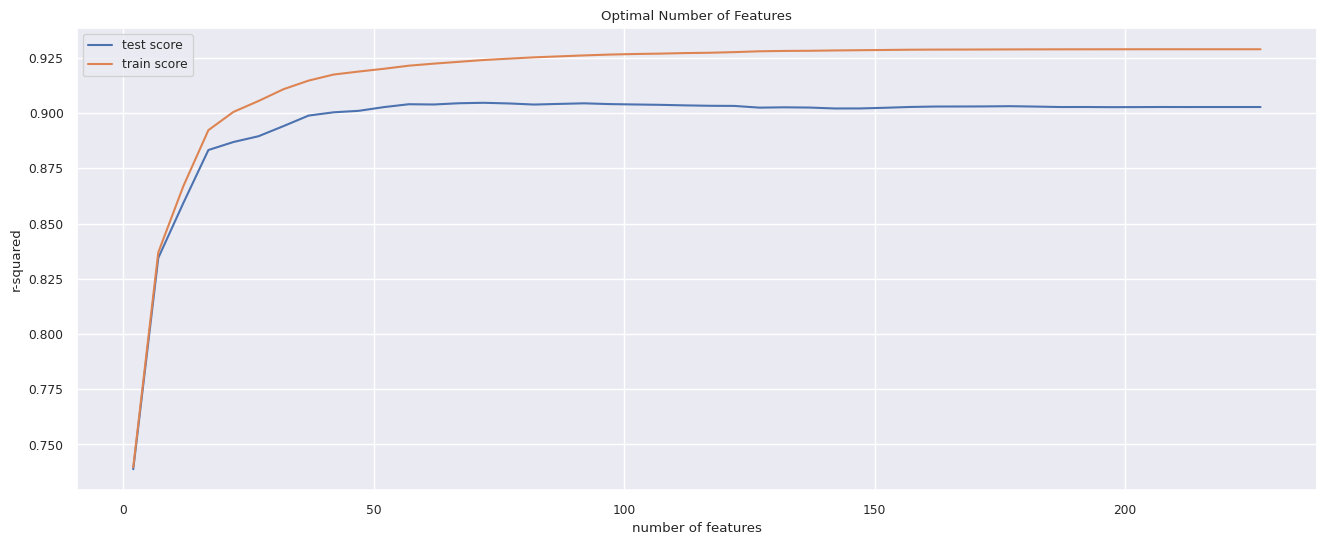

In [ ]:
# list of alphas to tune - if value too high it will lead to underfitting, if it is too low,
# it will not handle the overfitting

params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1,
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

# Instantiate
ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge,
                        param_grid = params,
                        scoring= 'neg_mean_absolute_error',
                        cv = folds,
                        return_train_score=True,
                        verbose = 1)
model_cv.fit(X_train, y_train)

# Hyperparameter tunning
bestParam = model_cv.best_params_
print("Best Parameters", bestParam)

# Model fitting
ridge = Ridge(**bestParam)
ridge.fit(X_train, y_train)

# RFE feature selection
# 1- cross-validation
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)

# 2- range of hyperparameters to tune
hyper_params = [{'n_features_to_select': np.arange(2, len(xCols), 5)}]


# 3- grid search
rfe = RFE(ridge)

model_cv_rfe = GridSearchCV(estimator = rfe,
                        param_grid = hyper_params,
                        scoring= 'r2',
                        cv = folds,
                        verbose = 1,
                        return_train_score=True)

# fit the model
model_cv_rfe.fit(X_train, y_train)

cv_results = pd.DataFrame(model_cv_rfe.cv_results_)

# plotting cv results
plt.figure(figsize=(16,6))

plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_test_score"])
plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_train_score"])
plt.xlabel('number of features')
plt.ylabel('r-squared')
plt.title("Optimal Number of Features")
plt.legend(['test score', 'train score'], loc='upper left')



Now we can select the number of features

In [ ]:
# final model
n_features_optimal = 20

ridge = Ridge(**bestParam)
ridge.fit(X_train, y_train)

rfe = RFE(ridge, n_features_to_select=n_features_optimal)
rfe = rfe.fit(X_train, y_train)

pd.set_option('display.max_rows', None)
ridgeRFEdf = pd.DataFrame(zip(X_train.columns,rfe.support_,rfe.ranking_), columns =['Feature', 'Support', 'Rank']).sort_values('Rank')
ridgeRFEdf

Feature  Support  Rank
103             GarageCars     True     1
32         Condition2_Norm     True     1
42         Condition1_Norm     True     1
111        Condition2_PosN     True     1
194       Foundation_PConc     True     1
104           CentralAir_Y     True     1
148                LotArea     True     1
28              BsmtFinSF1     True     1
201              GrLivArea     True     1
10             OverallQual     True     1
64    Neighborhood_Crawfor     True     1
134            OverallCond     True     1
156           SaleType_New     True     1
75                     Age     True     1
162   SaleCondition_Normal     True     1
126   Neighborhood_BrkSide     True     1
167  SaleCondition_Partial     True     1
1      Exterior1st_BrkFace     True     1
93    Neighborhood_StoneBr     True     1
102   Neighborhood_NridgHt     True     1
39    Neighborhood_NoRidge    False     2
166            MSZoning_FV    False     3
117               1stFlrSF    False     4
127      LotConfig_CulDSac    False     5
125   Neighborhood_Edwards    False     6
47             KitchenQual    False     7
110            MSZoning_RL    False     8
139   Neighborhood_Somerst    False     9
131        LandContour_HLS    False    10
6               Alley_Pave    False    11
45     Neighborhood_IDOTRR    False    12
30                BsmtQual    False    13
187    Neighborhood_NWAmes    False    14
121   Neighborhood_ClearCr    False    15
74              Functional    False    16
119     GarageType_CarPort    False    17
20                2ndFlrSF    False    18
63             Street_Pave    False    19
29    Neighborhood_OldTown    False    20
206    Exterior1st_Wd Sdng    False    21
184   Neighborhood_Mitchel    False    22
57            BsmtFullBath    False    23
91         Condition1_RRAe    False    24
94        RoofMatl_WdShngl    False    25
73           LotConfig_FR2    False    26
143       MasVnrType_Stone    False    27
188           Heating_GasW    False    28
179   Neighborhood_MeadowV    False    29
7               Fireplaces    False    30
35              MoSold_Nov    False    31
5       GarageType_Basment    False    32
37        MSSubClass_2sOld    False    33
221             GarageArea    False    34
80            SaleType_Oth    False    35
215              HeatingQC    False    36
142             MoSold_Oct    False    37
95           LandSlope_Sev    False    38
65             SaleType_WD    False    39
210             Fence_GdWo    False    40
209       MSSubClass_1sNew    False    41
196           BsmtExposure    False    42
21     Exterior1st_BrkComm    False    43
41             MSZoning_RH    False    44
51               ExterQual    False    45
96    Neighborhood_SawyerW    False    46
203   Neighborhood_Gilbert    False    47
89    Neighborhood_CollgCr    False    48
97        Electrical_FuseF    False    49
58            LotShape_IR2    False    50
205        Foundation_Wood    False    51
118         BldgType_Twnhs    False    52
27            KitchenAbvGr    False    53
128       RoofMatl_CompShg    False    54
141       MSSubClass_1sOld    False    55
24           LandSlope_Mod    False    56
50            TotRmsAbvGrd    False    57
52     Neighborhood_Timber    False    58
69              MoSold_May    False    59
86   SaleCondition_AdjLand    False    60
61             ScreenPorch    False    61
83      Neighborhood_NAmes    False    62
56     Neighborhood_Sawyer    False    63
113       RoofMatl_Tar&Grv    False    64
11       HouseStyle_1.5Unf    False    65
60         MSSubClass_2fam    False    66
81     Exterior2nd_Brk Cmn    False    67
123        Condition1_RRAn    False    68
115        RoofStyle_Gable    False    69
15             MoSold_July    False    70
130    Exterior1st_MetalSd    False    71
147       LotConfig_Inside    False    72
92     Exterior1st_VinylSd    False    73
149               FullBath    False    74
114               HalfBath    False    75
163       GarageType_NoGrg   

It seem the best number of features for Ridge RFE is 20. Then we select these columns and retrain ridge with them to see the perfoemance.

In [ ]:
rfeXcol = X_train.columns[rfe.support_]
rfeXcol

Index(['Exterior1st_BrkFace', 'OverallQual', 'BsmtFinSF1', 'Condition2_Norm',
       'Condition1_Norm', 'Neighborhood_Crawfor', 'Age',
       'Neighborhood_StoneBr', 'Neighborhood_NridgHt', 'GarageCars',
       'CentralAir_Y', 'Condition2_PosN', 'Neighborhood_BrkSide',
       'OverallCond', 'LotArea', 'SaleType_New', 'SaleCondition_Normal',
       'SaleCondition_Partial', 'Foundation_PConc', 'GrLivArea'],
      dtype='object')

In [ ]:
# Model fitting
ridge = Ridge(**bestParam)
ridge.fit(X_train[rfeXcol], y_train)

# Prediction
y_pred_train = ridge.predict(X_train[rfeXcol])
y_pred_test = ridge.predict(X_test[rfeXcol])

# Model evaluation
metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))[0]
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))[0]
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
metric2.append(mse_test_lr**0.5)

Visualizing the effect of alpha on Ridge model performance

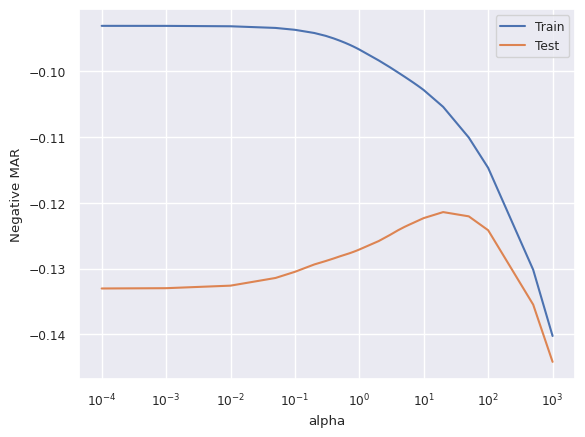

In [ ]:
cv_results= pd.DataFrame(model_cv.cv_results_)

## Plotting R2 score vs alpha values
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'], label='Train')
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'], label='Test')
plt.xlabel('alpha')
plt.ylabel('Negative MAR')
plt.xscale('log')
plt.legend()
plt.show()

In [ ]:
# Model fitting for double the optimal alpha
ridge2 = Ridge(alpha = 2*bestParam["alpha"])
ridge2.fit(X_train[rfeXcol], y_train)

# Prediction
y_pred_train = ridge2.predict(X_train[rfeXcol])
y_pred_test = ridge2.predict(X_test[rfeXcol])

# Model evaluation
metric22 = []
r2_train_lr = r2_score(y_train, y_pred_train)
metric22.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
metric22.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))[0]
metric22.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))[0]
metric22.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
metric22.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
metric22.append(mse_test_lr**0.5)

In [ ]:
betas = pd.DataFrame(index=rfeXcol)
betas.rows = rfeXcol

betas['Ridge'] = ridge.coef_.T
betas['Ridge (Double Alpha)'] = ridge2.coef_.T

pd.set_option('display.max_rows', None)
coefDf = betas[betas.Ridge!=0].sort_values(by="Ridge", key=abs, ascending=False)

pd.set_option('display.max_rows', None)

print("Number of features that are important based on Ridge:", coefDf.shape[0])
coefDf

Number of features that are important based on Ridge: 20


Ridge  Ridge (Double Alpha)
GrLivArea              0.198451              0.194791
OverallQual            0.168488              0.172767
Neighborhood_Crawfor   0.129721              0.096603
Age                   -0.128264             -0.125495
Neighborhood_NridgHt   0.115434              0.090576
Neighborhood_StoneBr   0.109729              0.071031
Exterior1st_BrkFace    0.102668              0.076941
SaleType_New           0.095411              0.077915
LotArea                0.093373              0.092295
Neighborhood_BrkSide   0.084277              0.059255
OverallCond            0.082827              0.081432
BsmtFinSF1             0.076184              0.075417
Foundation_PConc       0.075872              0.073788
Condition2_PosN       -0.074718             -0.039562
SaleCondition_Partial  0.074337              0.067374
Condition1_Norm        0.071763              0.067408
CentralAir_Y           0.068544              0.058347
SaleCondition_Normal   0.068221              0.052345
GarageCars             0.066608              0.069510
Condition2_Norm        0.058519              0.037211

## Ridge Most important features with their coefficient when double alpha is being used. **related to Q1**

In [ ]:
RidgeDub = betas[betas["Ridge (Double Alpha)"]!=0].sort_values(by="Ridge (Double Alpha)", key=abs, ascending=False)["Ridge (Double Alpha)"]

pd.set_option('display.max_rows', None)
print(RidgeDub.index[:10])
print("\nNumber of features:", RidgeDub.shape[0])
RidgeDub

Index(['GrLivArea', 'OverallQual', 'Age', 'Neighborhood_Crawfor', 'LotArea',
       'Neighborhood_NridgHt', 'OverallCond', 'SaleType_New',
       'Exterior1st_BrkFace', 'BsmtFinSF1'],
      dtype='object')

Number of features: 20


GrLivArea                0.194791
OverallQual              0.172767
Age                     -0.125495
Neighborhood_Crawfor     0.096603
LotArea                  0.092295
Neighborhood_NridgHt     0.090576
OverallCond              0.081432
SaleType_New             0.077915
Exterior1st_BrkFace      0.076941
BsmtFinSF1               0.075417
Foundation_PConc         0.073788
Neighborhood_StoneBr     0.071031
GarageCars               0.069510
Condition1_Norm          0.067408
SaleCondition_Partial    0.067374
Neighborhood_BrkSide     0.059255
CentralAir_Y             0.058347
SaleCondition_Normal     0.052345
Condition2_PosN         -0.039562
Condition2_Norm          0.037211
Name: Ridge (Double Alpha), dtype: float64

## LASSO Regression

Fitting 5 folds for each of 28 candidates, totalling 140 fits
Best Parameters {'alpha': 0.001}
Fitting 5 folds for each of 46 candidates, totalling 230 fits


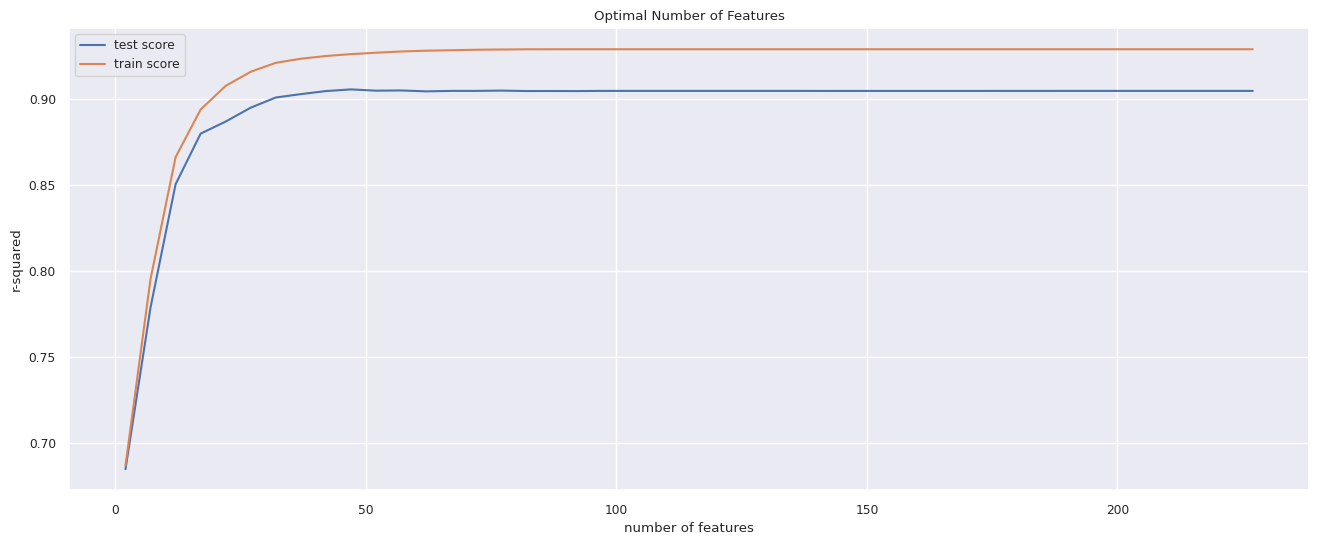

In [ ]:
# Instantiate
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso,
                        param_grid = params,
                        scoring= 'neg_mean_absolute_error',
                        cv = folds,
                        return_train_score=True,
                        verbose = 1)

model_cv.fit(X_train, y_train)

# Hyperparameter tunning
bestParam = model_cv.best_params_
print("Best Parameters", bestParam)

# Model fitting
lasso = Lasso(**bestParam)
lasso.fit(X_train, y_train)

# RFE feature selection
# 1- cross-validation
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)

# 2- range of hyperparameters to tune
hyper_params = [{'n_features_to_select': np.arange(2, len(xCols), 5)}]


# 3- grid search
rfe = RFE(lasso)
model_cv_rfe = GridSearchCV(estimator = rfe,
                        param_grid = hyper_params,
                        scoring= 'r2',
                        cv = folds,
                        verbose = 1,
                        return_train_score=True)

# fit the model
model_cv_rfe.fit(X_train, y_train)

cv_results = pd.DataFrame(model_cv_rfe.cv_results_)

# plotting cv results
plt.figure(figsize=(16,6))

plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_test_score"])
plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_train_score"])
plt.xlabel('number of features')
plt.ylabel('r-squared')
plt.title("Optimal Number of Features")
plt.legend(['test score', 'train score'], loc='upper left')


In [ ]:
# final model
n_features_optimal = 20

lasso = Lasso(**bestParam)
lasso.fit(X_train, y_train)

rfe = RFE(lasso, n_features_to_select=n_features_optimal)
rfe = rfe.fit(X_train, y_train)

pd.set_option('display.max_rows', None)
lassoRFEdf = pd.DataFrame(zip(X_train.columns,rfe.support_,rfe.ranking_), columns =['Feature', 'Support', 'Rank']).sort_values('Rank')
lassoRFEdf

Feature  Support  Rank
103             GarageCars     True     1
148                LotArea     True     1
93    Neighborhood_StoneBr     True     1
156           SaleType_New     True     1
75                     Age     True     1
162   SaleCondition_Normal     True     1
166            MSZoning_FV     True     1
126   Neighborhood_BrkSide     True     1
134            OverallCond     True     1
10             OverallQual     True     1
194       Foundation_PConc     True     1
117               1stFlrSF     True     1
42         Condition1_Norm     True     1
102   Neighborhood_NridgHt     True     1
201              GrLivArea     True     1
64    Neighborhood_Crawfor     True     1
111        Condition2_PosN     True     1
1      Exterior1st_BrkFace     True     1
28              BsmtFinSF1     True     1
39    Neighborhood_NoRidge     True     1
127      LotConfig_CulDSac    False     2
47             KitchenQual    False     3
6               Alley_Pave    False     4
110            MSZoning_RL    False     5
30                BsmtQual    False     6
74              Functional    False     7
139   Neighborhood_Somerst    False     8
45     Neighborhood_IDOTRR    False     9
125   Neighborhood_Edwards    False    10
57            BsmtFullBath    False    11
206    Exterior1st_Wd Sdng    False    12
27            KitchenAbvGr    False    13
215              HeatingQC    False    14
196           BsmtExposure    False    15
221             GarageArea    False    16
7               Fireplaces    False    17
104           CentralAir_Y    False    18
51               ExterQual    False    19
209       MSSubClass_1sNew    False    20
69              MoSold_May    False    21
131        LandContour_HLS    False    22
61             ScreenPorch    False    23
121   Neighborhood_ClearCr    False    24
50            TotRmsAbvGrd    False    25
143       MasVnrType_Stone    False    26
130    Exterior1st_MetalSd    False    27
210             Fence_GdWo    False    28
15             MoSold_July    False    29
187    Neighborhood_NWAmes    False    30
226             WoodDeckSF    False    31
78            BedroomAbvGr    False    32
142             MoSold_Oct    False    33
157            LotFrontage    False    34
100            TotalBsmtSF    False    35
101           GarageFinish    False    36
203   Neighborhood_Gilbert    False    37
92     Exterior1st_VinylSd    False    38
149               FullBath    False    39
114               HalfBath    False    40
227                 PoolQC    False    41
115        RoofStyle_Gable    False    42
207          EnclosedPorch    False    43
13                 MiscVal    False    44
204             PavedDrive    False    45
25                RemodAge    False    46
20                2ndFlrSF    False    47
124              ExterCond    False    48
73           LotConfig_FR2    False    49
23              MoSold_Jun    False    50
32         Condition2_Norm    False    51
218           BsmtFinType2    False    52
146             GarageQual    False    53
147       LotConfig_Inside    False    54
59             FireplaceQu    False    55
82             OpenPorchSF    False    56
151             MasVnrArea    False    57
77              BsmtFinSF2    False    58
35              MoSold_Nov    False    59
120              3SsnPorch    False    60
84            LowQualFinSF    False    61
141       MSSubClass_1sOld    False    62
5       GarageType_Basment    False    63
48      Exterior2nd_CBlock    False    64
8      Exterior1st_ImStucc    False    65
49              MoSold_Aug    False    66
223    Exterior2nd_BrkFace    False    67
225             MoSold_Feb    False    68
4         Electrical_SBrkr    False    69
3            RoofMatl_Roll    False    70
2               MoSold_Mar    False    71
140             MoSold_Dec    False    72
9             LotShape_Reg    False    73
24           LandSlope_Mod    False    74
53          RoofStyle_Shed    False    75
14             MSZoning_RM   

It seem the best number of features for LASSO RFE is 20. Then we select these columns and retrain ridge with them to see the perfoemance.

In [ ]:
rfeXcol = X_train.columns[rfe.support_]
rfeXcol

Index(['Exterior1st_BrkFace', 'OverallQual', 'BsmtFinSF1',
       'Neighborhood_NoRidge', 'Condition1_Norm', 'Neighborhood_Crawfor',
       'Age', 'Neighborhood_StoneBr', 'Neighborhood_NridgHt', 'GarageCars',
       'Condition2_PosN', '1stFlrSF', 'Neighborhood_BrkSide', 'OverallCond',
       'LotArea', 'SaleType_New', 'SaleCondition_Normal', 'MSZoning_FV',
       'Foundation_PConc', 'GrLivArea'],
      dtype='object')

In [ ]:
# Model fitting
lasso = Lasso(**bestParam)
lasso.fit(X_train[rfeXcol], y_train)

# Prediction
y_pred_train = lasso.predict(X_train[rfeXcol])
y_pred_test = lasso.predict(X_test[rfeXcol])

# Model evaluation
metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train.values - y_pred_train))
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test.values - y_pred_test))
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train.values, y_pred_train)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test.values, y_pred_test)
metric3.append(mse_test_lr**0.5)

Visualizing the effect of alpha on Ridge model performance

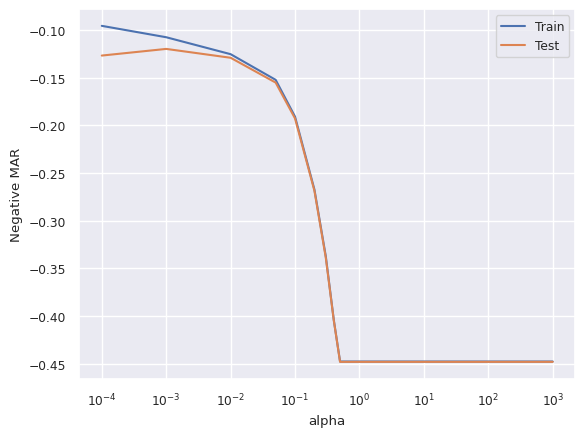

In [ ]:
cv_results= pd.DataFrame(model_cv.cv_results_)

## Plotting R2 score vs alpha values
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'], label='Train')
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'], label='Test')
plt.xlabel('alpha')
plt.ylabel('Negative MAR')
plt.xscale('log')
plt.legend()
plt.show()

In [ ]:
# Model fitting for double the optimal alpa
lasso2 = Lasso(alpha = 2*bestParam["alpha"])
lasso2.fit(X_train[rfeXcol], y_train)

# Prediction
y_pred_train = lasso2.predict(X_train[rfeXcol])
y_pred_test = lasso2.predict(X_test[rfeXcol])

# Model evaluation
metric32 = []
r2_train_lr = r2_score(y_train, y_pred_train)
metric32.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
metric32.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train.values - y_pred_train))
metric32.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test.values - y_pred_test))
metric32.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train.values, y_pred_train)
metric32.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test.values, y_pred_test)
metric32.append(mse_test_lr**0.5)

Based on MSE and R2 of test set LASSO model seem to perform better.

## Coefficients Comparison

In [ ]:
display(Javascript('''google.colab.output.setIframeHeight(0, true, {maxHeight: 500000})'''))

betas = pd.DataFrame(index=rfeXcol)
betas.rows = rfeXcol

betas['Lasso'] = lasso.coef_
betas['Lasso (Double Alpha)'] = lasso2.coef_

pd.set_option('display.max_rows', None)
betas[betas.Lasso!=0].sort_values(by="Lasso", key=abs, ascending=False)

<IPython.core.display.Javascript object>

Lasso  Lasso (Double Alpha)
Condition2_PosN      -0.334200             -0.000000
GrLivArea             0.185733              0.185676
SaleType_New          0.176718              0.143998
Neighborhood_Crawfor  0.174925              0.139440
Neighborhood_StoneBr  0.166545              0.085817
OverallQual           0.157478              0.164996
Age                  -0.136636             -0.134559
Neighborhood_NridgHt  0.133904              0.094207
Exterior1st_BrkFace   0.101082              0.069267
Neighborhood_BrkSide  0.094916              0.062614
OverallCond           0.091204              0.089479
LotArea               0.084029              0.080639
SaleCondition_Normal  0.083778              0.064049
Foundation_PConc      0.076850              0.077070
BsmtFinSF1            0.070645              0.069637
MSZoning_FV           0.067813              0.031951
Condition1_Norm       0.066853              0.068175
Neighborhood_NoRidge  0.061685              0.009570
GarageCars            0.057243              0.058866
1stFlrSF              0.050116              0.050260

In [ ]:
print("Number of features that are important based on LASSO:", betas[betas.Lasso!=0].shape[0])

Number of features that are important based on LASSO: 20


In [ ]:
print("Number of features that are important based on LASSO:", betas[betas["Lasso (Double Alpha)"]!=0].shape[0])

Number of features that are important based on LASSO: 19


In [ ]:
lasso_coefDf = betas[betas.Lasso!=0].sort_values(by="Lasso", key=abs, ascending=False).iloc[:5,]
lasso_coefDf

Lasso  Lasso (Double Alpha)
Condition2_PosN      -0.334200             -0.000000
GrLivArea             0.185733              0.185676
SaleType_New          0.176718              0.143998
Neighborhood_Crawfor  0.174925              0.139440
Neighborhood_StoneBr  0.166545              0.085817

## LASSO Most important features with their coefficient when double alpha is being used. **related to Q1**

In [ ]:
lassoDub = betas[betas["Lasso (Double Alpha)"]!=0].sort_values(by="Lasso (Double Alpha)", key=abs, ascending=False)["Lasso (Double Alpha)"]

print(lassoDub.index[:10])
print("\nNumber of features:", lassoDub.shape[0])
lassoDub


Index(['GrLivArea', 'OverallQual', 'SaleType_New', 'Neighborhood_Crawfor',
       'Age', 'Neighborhood_NridgHt', 'OverallCond', 'Neighborhood_StoneBr',
       'LotArea', 'Foundation_PConc'],
      dtype='object')

Number of features: 19


GrLivArea               0.185676
OverallQual             0.164996
SaleType_New            0.143998
Neighborhood_Crawfor    0.139440
Age                    -0.134559
Neighborhood_NridgHt    0.094207
OverallCond             0.089479
Neighborhood_StoneBr    0.085817
LotArea                 0.080639
Foundation_PConc        0.077070
BsmtFinSF1              0.069637
Exterior1st_BrkFace     0.069267
Condition1_Norm         0.068175
SaleCondition_Normal    0.064049
Neighborhood_BrkSide    0.062614
GarageCars              0.058866
1stFlrSF                0.050260
MSZoning_FV             0.031951
Neighborhood_NoRidge    0.009570
Name: Lasso (Double Alpha), dtype: float64

## **Model Comparison**

## Evaluation Comparison

In [ ]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'],
        'Linear Regression': metric}

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(metric2, name = 'Ridge Regression')
rg2_metric = pd.Series(metric22, name = 'Ridge Regression (Double Alpha)')

ls_metric = pd.Series(metric3, name = 'Lasso Regression')
ls2_metric = pd.Series(metric32, name = 'Lasso Regression (Double Alpha)')

final_metric = pd.concat([lr_metric, rg_metric, rg2_metric, ls_metric, ls2_metric], axis = 1)

final_metric

Metric  Linear Regression  Ridge Regression  \
0  R2 Score (Train)       9.380456e-01          0.895571   
1   R2 Score (Test)      -1.144726e+22          0.864620   
2       RSS (Train)       2.352208e+01         39.648201   
3        RSS (Test)       1.056553e+24         12.495225   
4       MSE (Train)       1.424611e-01          0.184957   
5        MSE (Test)       6.035964e+10          0.207574   

   Ridge Regression (Double Alpha)  Lasso Regression  \
0                         0.892368          0.902790   
1                         0.863770          0.866754   
2                        40.864201     830928.574017   
3                        12.573719      52668.332646   
4                         0.187772          0.178449   
5                         0.208225          0.205931   

   Lasso Regression (Double Alpha)  
0                         0.896902  
1                         0.865972  
2                    825674.694741  
3                     52330.991842  
4                         0.183774  
5                         0.206535

## Remove 5 most important features in LASSO and find new 5 most important features

Fitting 5 folds for each of 28 candidates, totalling 140 fits
Best Parameters {'alpha': 0.001}
Fitting 5 folds for each of 46 candidates, totalling 230 fits


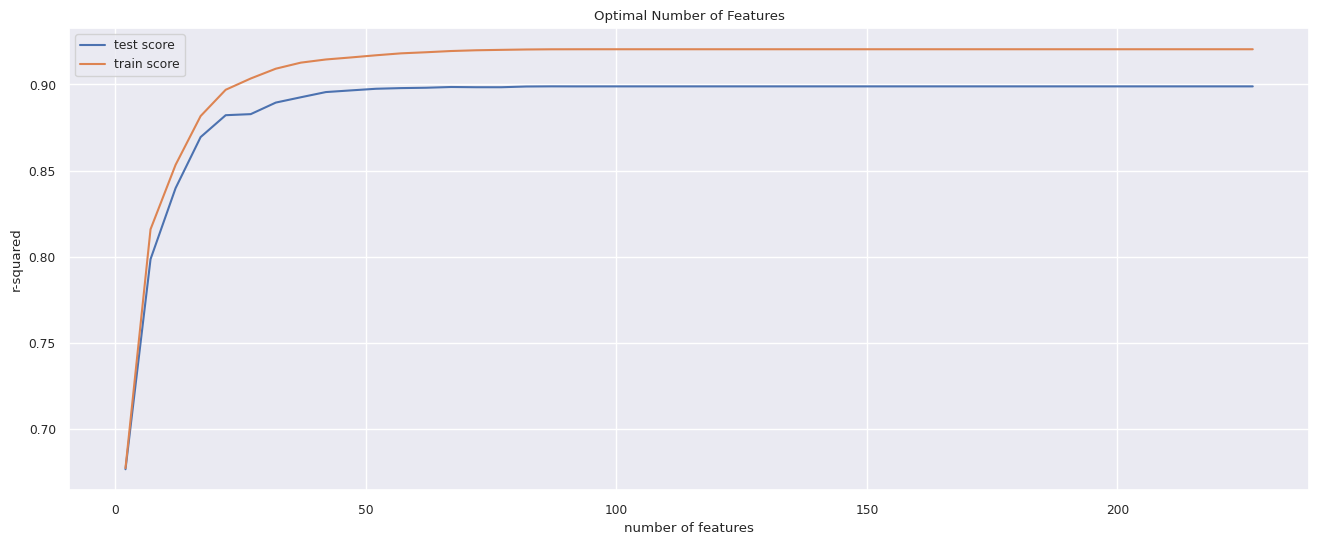

In [ ]:
newXcols = list(set(x_cols)-set(lasso_coefDf.index))

X_train = df_train[newXcols]
y_train = df_train[yCol]

X_test = df_test[newXcols]
y_test = df_test[yCol]

# Instantiate
lasso3 = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso3,
                        param_grid = params,
                        scoring= 'neg_mean_absolute_error',
                        cv = folds,
                        return_train_score=True,
                        verbose = 1)

model_cv.fit(X_train, y_train)

# Hyperparameter tunning
bestParam = model_cv.best_params_
print("Best Parameters", bestParam)

# Model fitting
lasso3 = Lasso(**bestParam)
lasso3.fit(X_train, y_train)

# RFE feature selection
# 1- cross-validation
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)

# 2- range of hyperparameters to tune
hyper_params = [{'n_features_to_select': np.arange(2, len(xCols), 5)}]


# 3- grid search
rfe = RFE(lasso3)
model_cv_rfe = GridSearchCV(estimator = rfe,
                        param_grid = hyper_params,
                        scoring= 'r2',
                        cv = folds,
                        verbose = 1,
                        return_train_score=True)

# fit the model
model_cv_rfe.fit(X_train, y_train)

cv_results = pd.DataFrame(model_cv_rfe.cv_results_)
# plotting cv results
plt.figure(figsize=(16,6))

plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_test_score"])
plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_train_score"])
plt.xlabel('number of features')
plt.ylabel('r-squared')
plt.title("Optimal Number of Features")
plt.legend(['test score', 'train score'], loc='upper left')


In [ ]:
# final model
n_features_optimal = 20

lasso3 = Lasso(**bestParam)
lasso.fit(X_train, y_train)

rfe = RFE(lasso, n_features_to_select=n_features_optimal)
rfe = rfe.fit(X_train, y_train)

lassoRFEdf = pd.DataFrame(zip(X_train.columns,rfe.support_,rfe.ranking_), columns =['Feature', 'Support', 'Rank']).sort_values('Rank')
lassoRFEdf

Feature  Support  Rank
36        MSSubClass_2sOld     True     1
99    Neighborhood_NridgHt     True     1
101           CentralAir_Y     True     1
113               1stFlrSF     True     1
121   Neighborhood_Edwards     True     1
122   Neighborhood_BrkSide     True     1
41         Condition1_Norm     True     1
127        LandContour_HLS     True     1
130            OverallCond     True     1
135   Neighborhood_Somerst     True     1
32         Condition2_Norm     True     1
28              BsmtFinSF1     True     1
145                LotArea     True     1
158   SaleCondition_Normal     True     1
20                2ndFlrSF     True     1
163  SaleCondition_Partial     True     1
73                     Age     True     1
190       Foundation_PConc     True     1
10             OverallQual     True     1
1      Exterior1st_BrkFace     True     1
107            MSZoning_RL    False     2
162            MSZoning_FV    False     3
100             GarageCars    False     4
123      LotConfig_CulDSac    False     5
46             KitchenQual    False     6
137       MSSubClass_1sOld    False     7
30                BsmtQual    False     8
72              Functional    False     9
6               Alley_Pave    False    10
56            BsmtFullBath    False    11
8               Fireplaces    False    12
50               ExterQual    False    13
201    Exterior1st_Wd Sdng    False    14
29    Neighborhood_OldTown    False    15
44     Neighborhood_IDOTRR    False    16
210              HeatingQC    False    17
49            TotRmsAbvGrd    False    18
27            KitchenAbvGr    False    19
216             GarageArea    False    20
126    Exterior1st_MetalSd    False    21
63             SaleType_WD    False    22
138             MoSold_Oct    False    23
192           BsmtExposure    False    24
82      Neighborhood_NAmes    False    25
139       MasVnrType_Stone    False    26
183    Neighborhood_NWAmes    False    27
110               HalfBath    False    28
146               FullBath    False    29
38    Neighborhood_NoRidge    False    30
60             ScreenPorch    False    31
17             MoSold_July    False    32
25                RemodAge    False    33
98            GarageFinish    False    34
105       MSSubClass_2sNew    False    35
111        RoofStyle_Gable    False    36
97             TotalBsmtSF    False    37
76            BedroomAbvGr    False    38
58             FireplaceQu    False    39
202          EnclosedPorch    False    40
199             PavedDrive    False    41
83            LowQualFinSF    False    42
180   Neighborhood_Mitchel    False    43
81             OpenPorchSF    False    44
198   Neighborhood_Gilbert    False    45
153            LotFrontage    False    46
205             Fence_GdWo    False    47
221             WoodDeckSF    False    48
204       MSSubClass_1sNew    False    49
90     Exterior1st_VinylSd    False    50
116              3SsnPorch    False    51
15                 MiscVal    False    52
120              ExterCond    False    53
71           LotConfig_FR2    False    54
143       LotConfig_Inside    False    55
222                 PoolQC    False    56
93    Neighborhood_SawyerW    False    57
67              MoSold_May    False    58
142             GarageQual    False    59
23              MoSold_Jun    False    60
148             MasVnrArea    False    61
213           BsmtFinType2    False    62
24           LandSlope_Mod    False    63
207      GarageType_Detchd    False    64
5       GarageType_Basment    False    65
74               BsmtUnfSF    False    66
125        BldgType_2fmCon    False    67
12       HouseStyle_1.5Unf    False    68
9             LotShape_Reg    False    69
7      Exterior1st_ImStucc    False    70
197        BldgType_TwnhsE    False    71
4         Electrical_SBrkr    False    72
3            RoofMatl_Roll    False    73
129           Heating_OthW    False    74
2               MoSold_Mar    False    75
55     Neighborhood_Sawyer   

In [ ]:
rfeXcol = X_train.columns[rfe.support_]
rfeXcol

Index(['Exterior1st_BrkFace', 'OverallQual', '2ndFlrSF', 'BsmtFinSF1',
       'Condition2_Norm', 'MSSubClass_2sOld', 'Condition1_Norm', 'Age',
       'Neighborhood_NridgHt', 'CentralAir_Y', '1stFlrSF',
       'Neighborhood_Edwards', 'Neighborhood_BrkSide', 'LandContour_HLS',
       'OverallCond', 'Neighborhood_Somerst', 'LotArea',
       'SaleCondition_Normal', 'SaleCondition_Partial', 'Foundation_PConc'],
      dtype='object')

In [ ]:
# Model fitting for double the optimal alpa
lasso3 = Lasso(alpha = bestParam["alpha"])
lasso3.fit(X_train[rfeXcol], y_train)

# Prediction
y_pred_train = lasso3.predict(X_train[rfeXcol])
y_pred_test = lasso3.predict(X_test[rfeXcol])

# Model evaluation
metric33 = []
r2_train_lr = r2_score(y_train, y_pred_train)
metric33.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
metric33.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train.values - y_pred_train))
metric33.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test.values - y_pred_test))
metric33.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train.values, y_pred_train)
metric33.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test.values, y_pred_test)
metric33.append(mse_test_lr**0.5)

In [ ]:
display(Javascript('''google.colab.output.setIframeHeight(0, true, {maxHeight: 500000})'''))

betas = pd.DataFrame(index=rfeXcol)
betas.rows = rfeXcol

betas['Lasso'] = lasso3.coef_

pd.set_option('display.max_rows', None)
newCoefDf = betas[betas.Lasso!=0].sort_values(by="Lasso", key=abs, ascending=False)

print(newCoefDf.index[:5])
print("\nNumber of features:", newCoefDf.shape[0])
newCoefDf

<IPython.core.display.Javascript object>

Index(['1stFlrSF', 'OverallQual', 'SaleCondition_Partial', '2ndFlrSF',
       'Neighborhood_NridgHt'],
      dtype='object')

Number of features: 20


Lasso
1stFlrSF               0.202248
OverallQual            0.178956
SaleCondition_Partial  0.167954
2ndFlrSF               0.163989
Neighborhood_NridgHt   0.136696
Age                   -0.134969
Exterior1st_BrkFace    0.103773
Foundation_PConc       0.090607
SaleCondition_Normal   0.089882
Neighborhood_Somerst   0.087306
LotArea                0.083452
OverallCond            0.081340
Condition1_Norm        0.077278
MSSubClass_2sOld       0.075775
CentralAir_Y           0.073471
Condition2_Norm        0.072173
LandContour_HLS        0.072144
Neighborhood_BrkSide   0.070646
Neighborhood_Edwards  -0.067898
BsmtFinSF1             0.066885

In [ ]:
print("Number of features that are important based on LASSO:", betas[betas.Lasso!=0].shape[0])

Number of features that are important based on LASSO: 20


In [ ]:
lasso_coefDf = betas[betas.Lasso!=0].sort_values(by="Lasso", key=abs, ascending=False).iloc[:5,]
lasso_coefDf

Lasso
1stFlrSF               0.202248
OverallQual            0.178956
SaleCondition_Partial  0.167954
2ndFlrSF               0.163989
Neighborhood_NridgHt   0.136696